           id DISTRICT  SUB_DISTRI  COUNT_REQ  floors  UP_DMG  WALL_DMG  \
0   137963924     สาทร  ทุ่งวัดดอน         13    28.0       2         4   
1   176332744  ปทุมวัน     ลุมพินี          1    33.0       0         0   
2  1310886070  คลองเตย     คลองเตย          1     4.0       0         0   
3   377292915  ยานนาวา   ช่องนนทรี          8     NaN       1         1   
4   333233945  บางพลัด   บางยี่ขัน          3     NaN       0         0   

   FLOOR_DMG  PILLAR_DMG  STRUCTURE_  ... WaterConte LiquidLimi Plasticity  \
0          1           3           1  ...      60-80      60-80      30-50   
1          0           0           0  ...      60-80      60-80      30-50   
2          0           0           1  ...      60-80      60-80      30-50   
3          0           0           0  ...      60-80      60-80      30-50   
4          0           0           1  ...      60-80      60-80      30-50   

  Total_Unit Score_Rang Zoning total_dmg_        total_dm_1 total_dm_2  \
0  1.5

<Axes: >

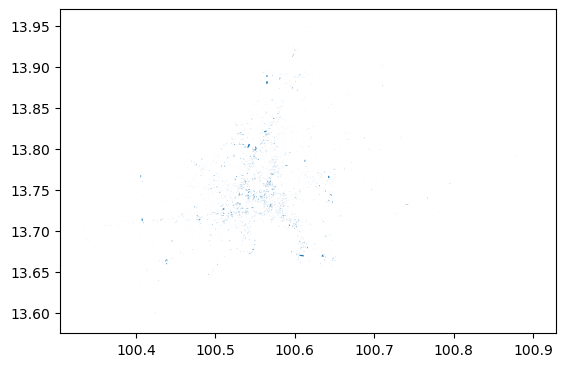

In [21]:
import geopandas as gpd

# ระบุพาธไฟล์ Shapefile
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped_joined_GEOM_ONLY.shp"

# อ่านไฟล์
gdf = gpd.read_file(shp_path)

# แสดงข้อมูลเบื้องต้น
print(gdf.head())          # ดู 5 แถวแรก
print(gdf.info())          # ดูข้อมูลคอลัมน์และประเภทข้อมูล
print(gdf.crs)             # ดูระบบพิกัด (CRS)

# ถ้าต้องการแสดงแผนที่อย่างง่าย
gdf.plot()


In [445]:
import pandas as pd

# === กำหนดพาธไฟล์ ===
file_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped(1).xlsx"

# === อ่านไฟล์ Excel ===
df = pd.read_excel(file_path)




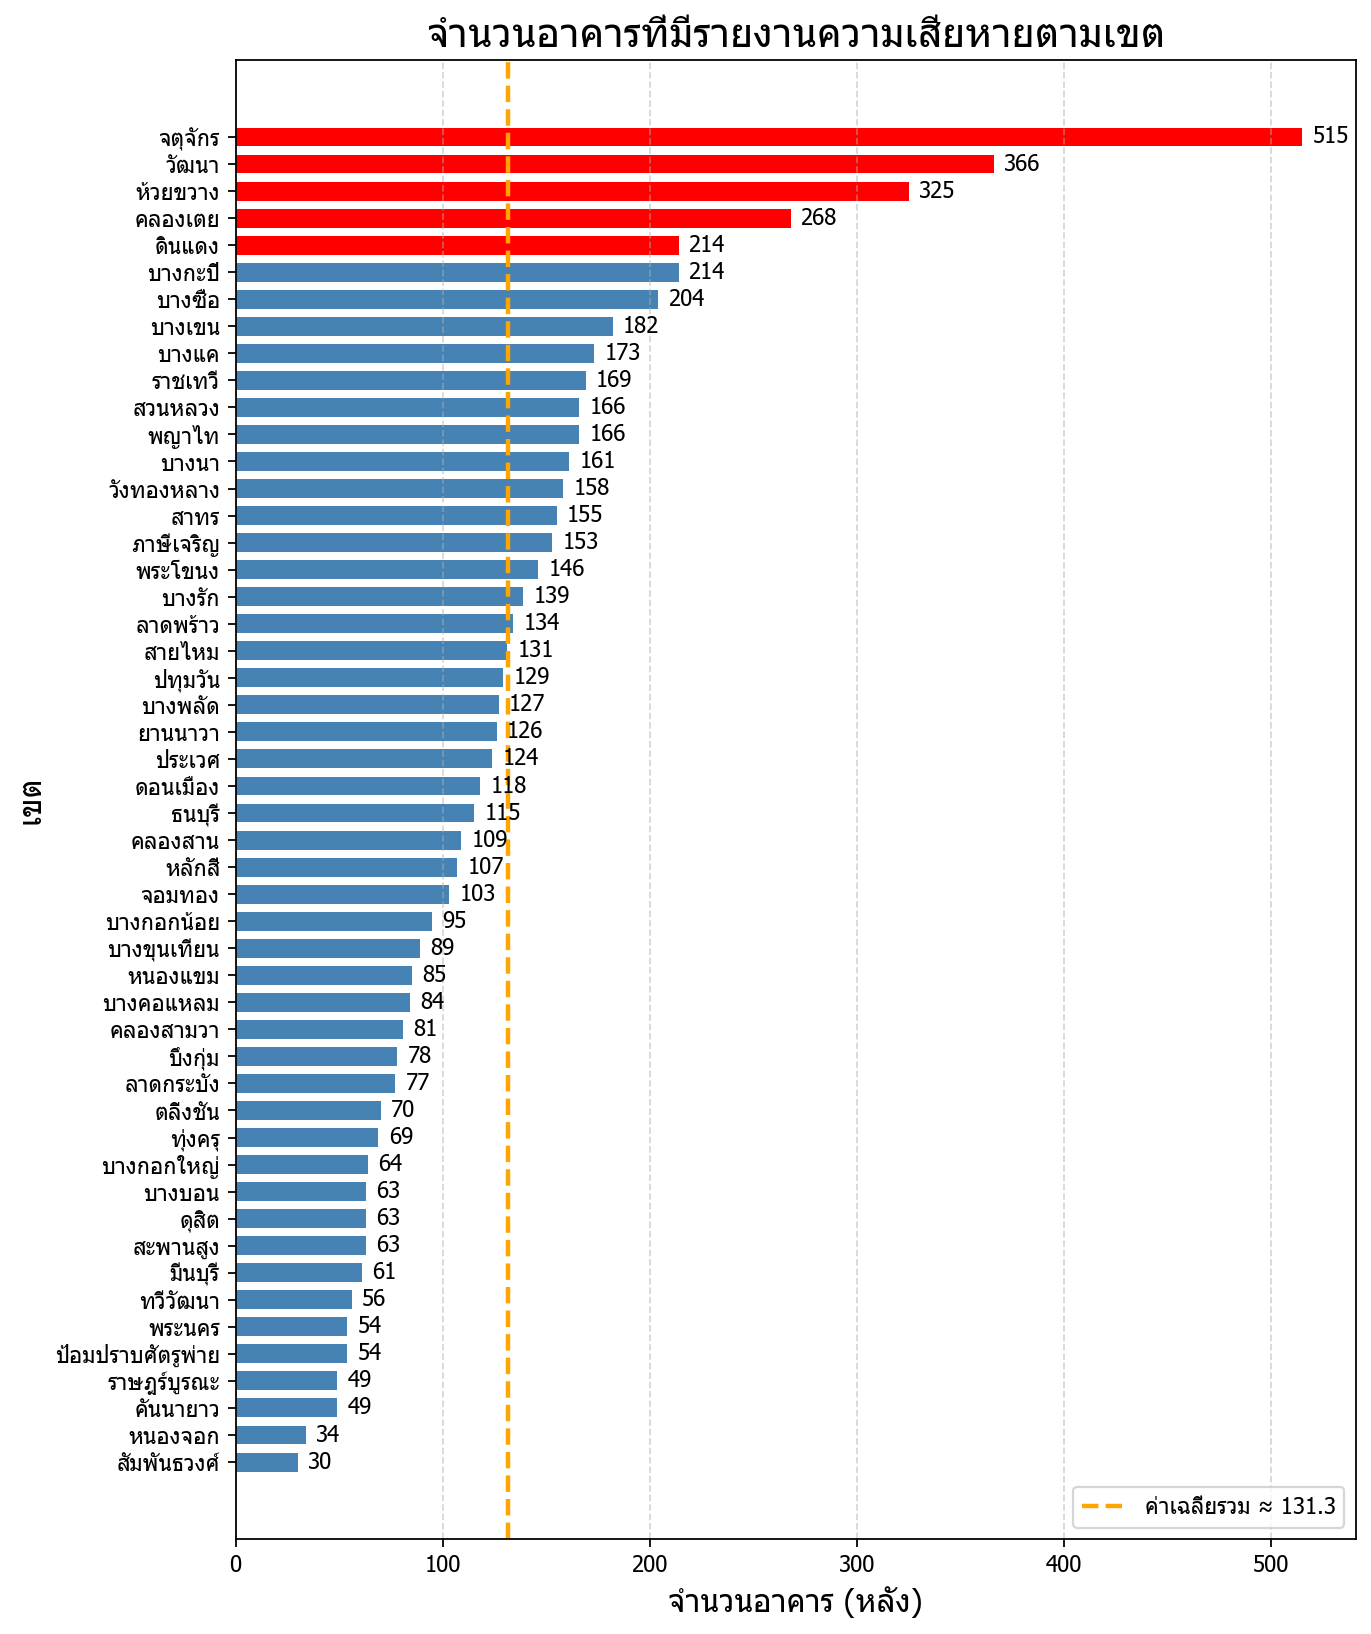

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ตั้งค่าฟอนต์ให้รองรับภาษาไทย
rcParams['font.family'] = 'Tahoma'  # หรือ 'Noto Sans Thai' ถ้าใช้ Colab

# นับจำนวนอาคาร เรียงจากน้อยไปมาก
count_by_district = df['DISTRICT'].value_counts().sort_values(ascending=True)

# หา Top 5
top5 = count_by_district.sort_values(ascending=False).head(5).index

# คำนวณค่าเฉลี่ยรวม
avg_value = count_by_district.mean()

# วาดกราฟ
fig, ax = plt.subplots(figsize=(10, 12))

# กำหนดสี Top 5 = แดง, ที่เหลือ = ฟ้า
colors = ['red' if district in top5 else 'steelblue' for district in count_by_district.index]

bars = ax.barh(count_by_district.index, count_by_district.values, height=0.7, color=colors)

# เส้นค่าเฉลี่ย (แนวตั้ง)
ax.axvline(avg_value, color='orange', linestyle='--', linewidth=2, label=f"ค่าเฉลี่ยรวม ≈ {avg_value:.1f}")

# ตั้งชื่อและแกน
ax.set_title("จำนวนอาคารที่มีรายงานความเสียหายตามเขต", fontsize=18)
ax.set_xlabel("จำนวนอาคาร (หลัง)", fontsize=14)
ax.set_ylabel("เขต", fontsize=14)

plt.subplots_adjust(left=0.25, right=0.95)
ax.xaxis.grid(True, linestyle="--", alpha=0.5)

# เพิ่มตัวเลขที่ปลายแท่ง
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5,
            bar.get_y() + bar.get_height()/2,
            f"{int(width)}",
            va='center', ha='left', fontsize=10)

# เพิ่ม legend
ax.legend(loc="lower right")
plt.savefig("total_dmg_class_summary1.jpg", format='jpg', dpi=900, bbox_inches='tight')
plt.show()


In [449]:
import geopandas as gpd

# === Path ===
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# === อ่านไฟล์ Shapefile ===
gdf = gpd.read_file(shp_path, encoding="utf-8")

# === แสดงคอลัมน์ทั้งหมด ===
print("คอลัมน์ทั้งหมดในไฟล์:")
for col in gdf.columns:
    print("-", col)

# === ตัวอย่างดูข้อมูล 5 แถวแรก ===
print("\nตัวอย่างข้อมูล:")
print(gdf.head())


คอลัมน์ทั้งหมดในไฟล์:
- OBJECTID
- AREA_CAL
- AREA_BMA
- PERIMETER
- ADMIN_ID
- SUBDISTRIC
- SUBDISTR_1
- DISTRICT_I
- DISTRICT_N
- CHANGWAT_I
- CHANGWAT_N
- Shape_Leng
- Shape_Area
- geometry

ตัวอย่างข้อมูล:
   OBJECTID  AREA_CAL  AREA_BMA  PERIMETER  ADMIN_ID SUBDISTRIC  SUBDISTR_1  \
0         1     15.80     16.46  21,537.21         2     100608     หัวหมาก   
1         2     11.78     12.06  18,260.52         3     100601    คลองจั่น   
2         3     15.83     14.67  17,831.19         2     104003      บางไผ่   
3         4     18.05     18.41  19,142.47         2     100502  อนุสาวรีย์   
4         5     22.75     23.72  24,066.16         3     100508     ท่าแร้ง   

  DISTRICT_I DISTRICT_N CHANGWAT_I   CHANGWAT_N  Shape_Leng    Shape_Area  \
0       1006    บางกะปิ         10  กรุงเทพมหาน   21,534.20 15,799,312.99   
1       1006    บางกะปิ         10  กรุงเทพมหาน   18,389.64 11,776,535.85   
2       1040      บางแค         10  กรุงเทพมหาน   17,823.01 15,830,475.39   
3      

In [11]:
import pandas as pd

# ===== นับจำนวนอาคารต่อเขต =====
count_by_district = (
    df.groupby("DISTRICT")  # จัดกลุ่มตามเขต
      .size()               # นับจำนวน record
      .reset_index(name="building_count")  # เปลี่ยนเป็น DataFrame พร้อมคอลัมน์ชื่อ
      .sort_values("building_count", ascending=False)  # เรียงจากมาก -> น้อย
)

print(count_by_district)


             DISTRICT  building_count
4             จตุจักร             515
40              วัฒนา             366
49           ห้วยขวาง             325
2             คลองเตย             268
7              ดินแดง             214
15            บางกะปิ             214
18            บางซื่อ             204
23             บางเขน             182
24              บางแค             173
35            ราชเทวี             169
29              พญาไท             166
41            สวนหลวง             166
19              บางนา             161
39         วังทองหลาง             158
44               สาทร             155
32          ภาษีเจริญ             153
31            พระโขนง             146
22             บางรัก             139
38           ลาดพร้าว             134
45             สายไหม             131
26            ปทุมวัน             129
21            บางพลัด             127
34            ยานนาวา             126
27             ประเวศ             124
6            ดอนเมือง             118
12          

บันทึกกราฟเรียบร้อย: C:\Users\piriy\Desktop\building_count_by_district.jpg


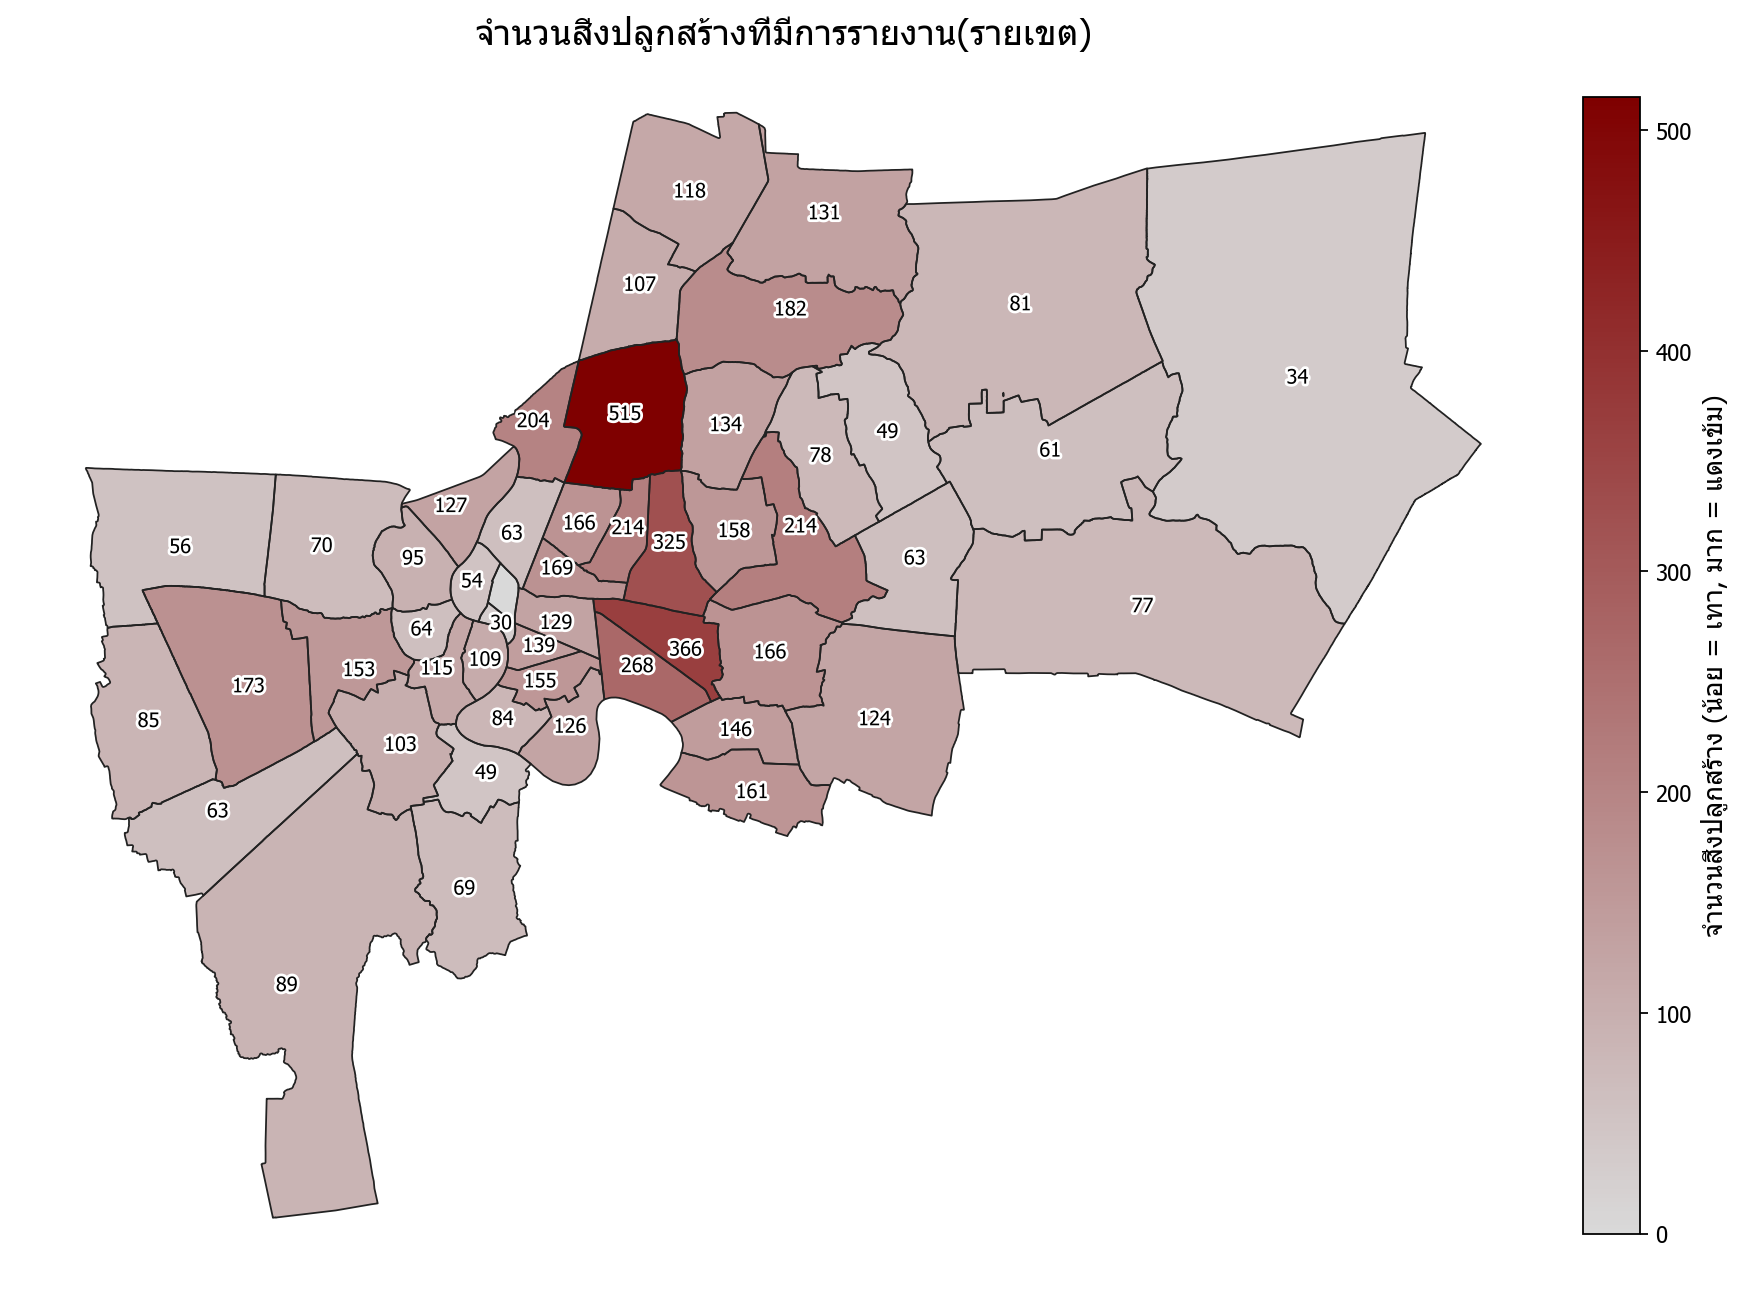

In [207]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
from shapely.geometry import Polygon, MultiPolygon, LineString

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== 1) จำนวนอาคารต่อเขต =====
count_by_district = (
    df.assign(DISTRICT=df["DISTRICT"].astype(str).str.strip())
      .groupby("DISTRICT").size()
      .reset_index(name="building_count")
)
normname = lambda s: s.astype(str).str.replace(r"^\s*เขต", "", regex=True).str.strip()
count_by_district["DISTRICT"] = normname(count_by_district["DISTRICT"])

# ===== 2) อ่าน + dissolve =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = normname(gdf["DISTRICT_N"])

gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")

# ปิดช่องแคบ
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M)

# ลบรู
def remove_all_holes(geom):
    if isinstance(geom, MultiPolygon):
        return MultiPolygon([Polygon(p.exterior) for p in geom.geoms])
    elif isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    return geom
dist["geometry"] = dist.geometry.apply(remove_all_holes)

# เก็บชิ้นใหญ่สุด
def keep_largest_part(geom):
    if isinstance(geom, MultiPolygon):
        parts = sorted(list(geom.geoms), key=lambda p: p.area, reverse=True)
        return Polygon(parts[0].exterior) if parts else None
    elif isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(keep_largest_part)

# กลับ WGS84
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge =====
gmap = dist_wgs.merge(count_by_district, left_on="DISTRICT_N", right_on="DISTRICT", how="left")
gmap["building_count"] = gmap["building_count"].fillna(0)

# ===== 4) เส้นขอบ =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls)
        line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot =====
vmin, vmax = gmap["building_count"].min(), gmap["building_count"].max()
cmap = mcolors.LinearSegmentedColormap.from_list("gray_red", ["#d9d9d9", "#7f0000"])
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="building_count", cmap=cmap, linewidth=0, edgecolor="none", legend=False, ax=ax)
boundaries.plot(ax=ax, color="#222222", linewidth=0.8)

# ===== ใส่ตัวเลข เฉพาะค่าที่ > 0 =====
gmap["label_point"] = gmap.representative_point()
for _, r in gmap.iterrows():
    if r["building_count"] > 0:  # ✅ ข้ามเขตที่ค่า 0
        ax.text(
            r["label_point"].x, r["label_point"].y,
            f'{int(r["building_count"]):,}',
            fontsize=9, ha="center", va="center", color="black",
            path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]
        )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("จำนวนสิ่งปลูกสร้าง (น้อย = เทา, มาก = แดงเข้ม)", fontsize=12)

ax.set_title("จำนวนสิ่งปลูกสร้างที่มีการรายงาน(รายเขต)", fontsize=16)
ax.set_axis_off()
plt.tight_layout()

# ===== Export เป็น JPG =====
output_path = r"C:\Users\piriy\Desktop\building_count_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"บันทึกกราฟเรียบร้อย: {output_path}")
plt.show()


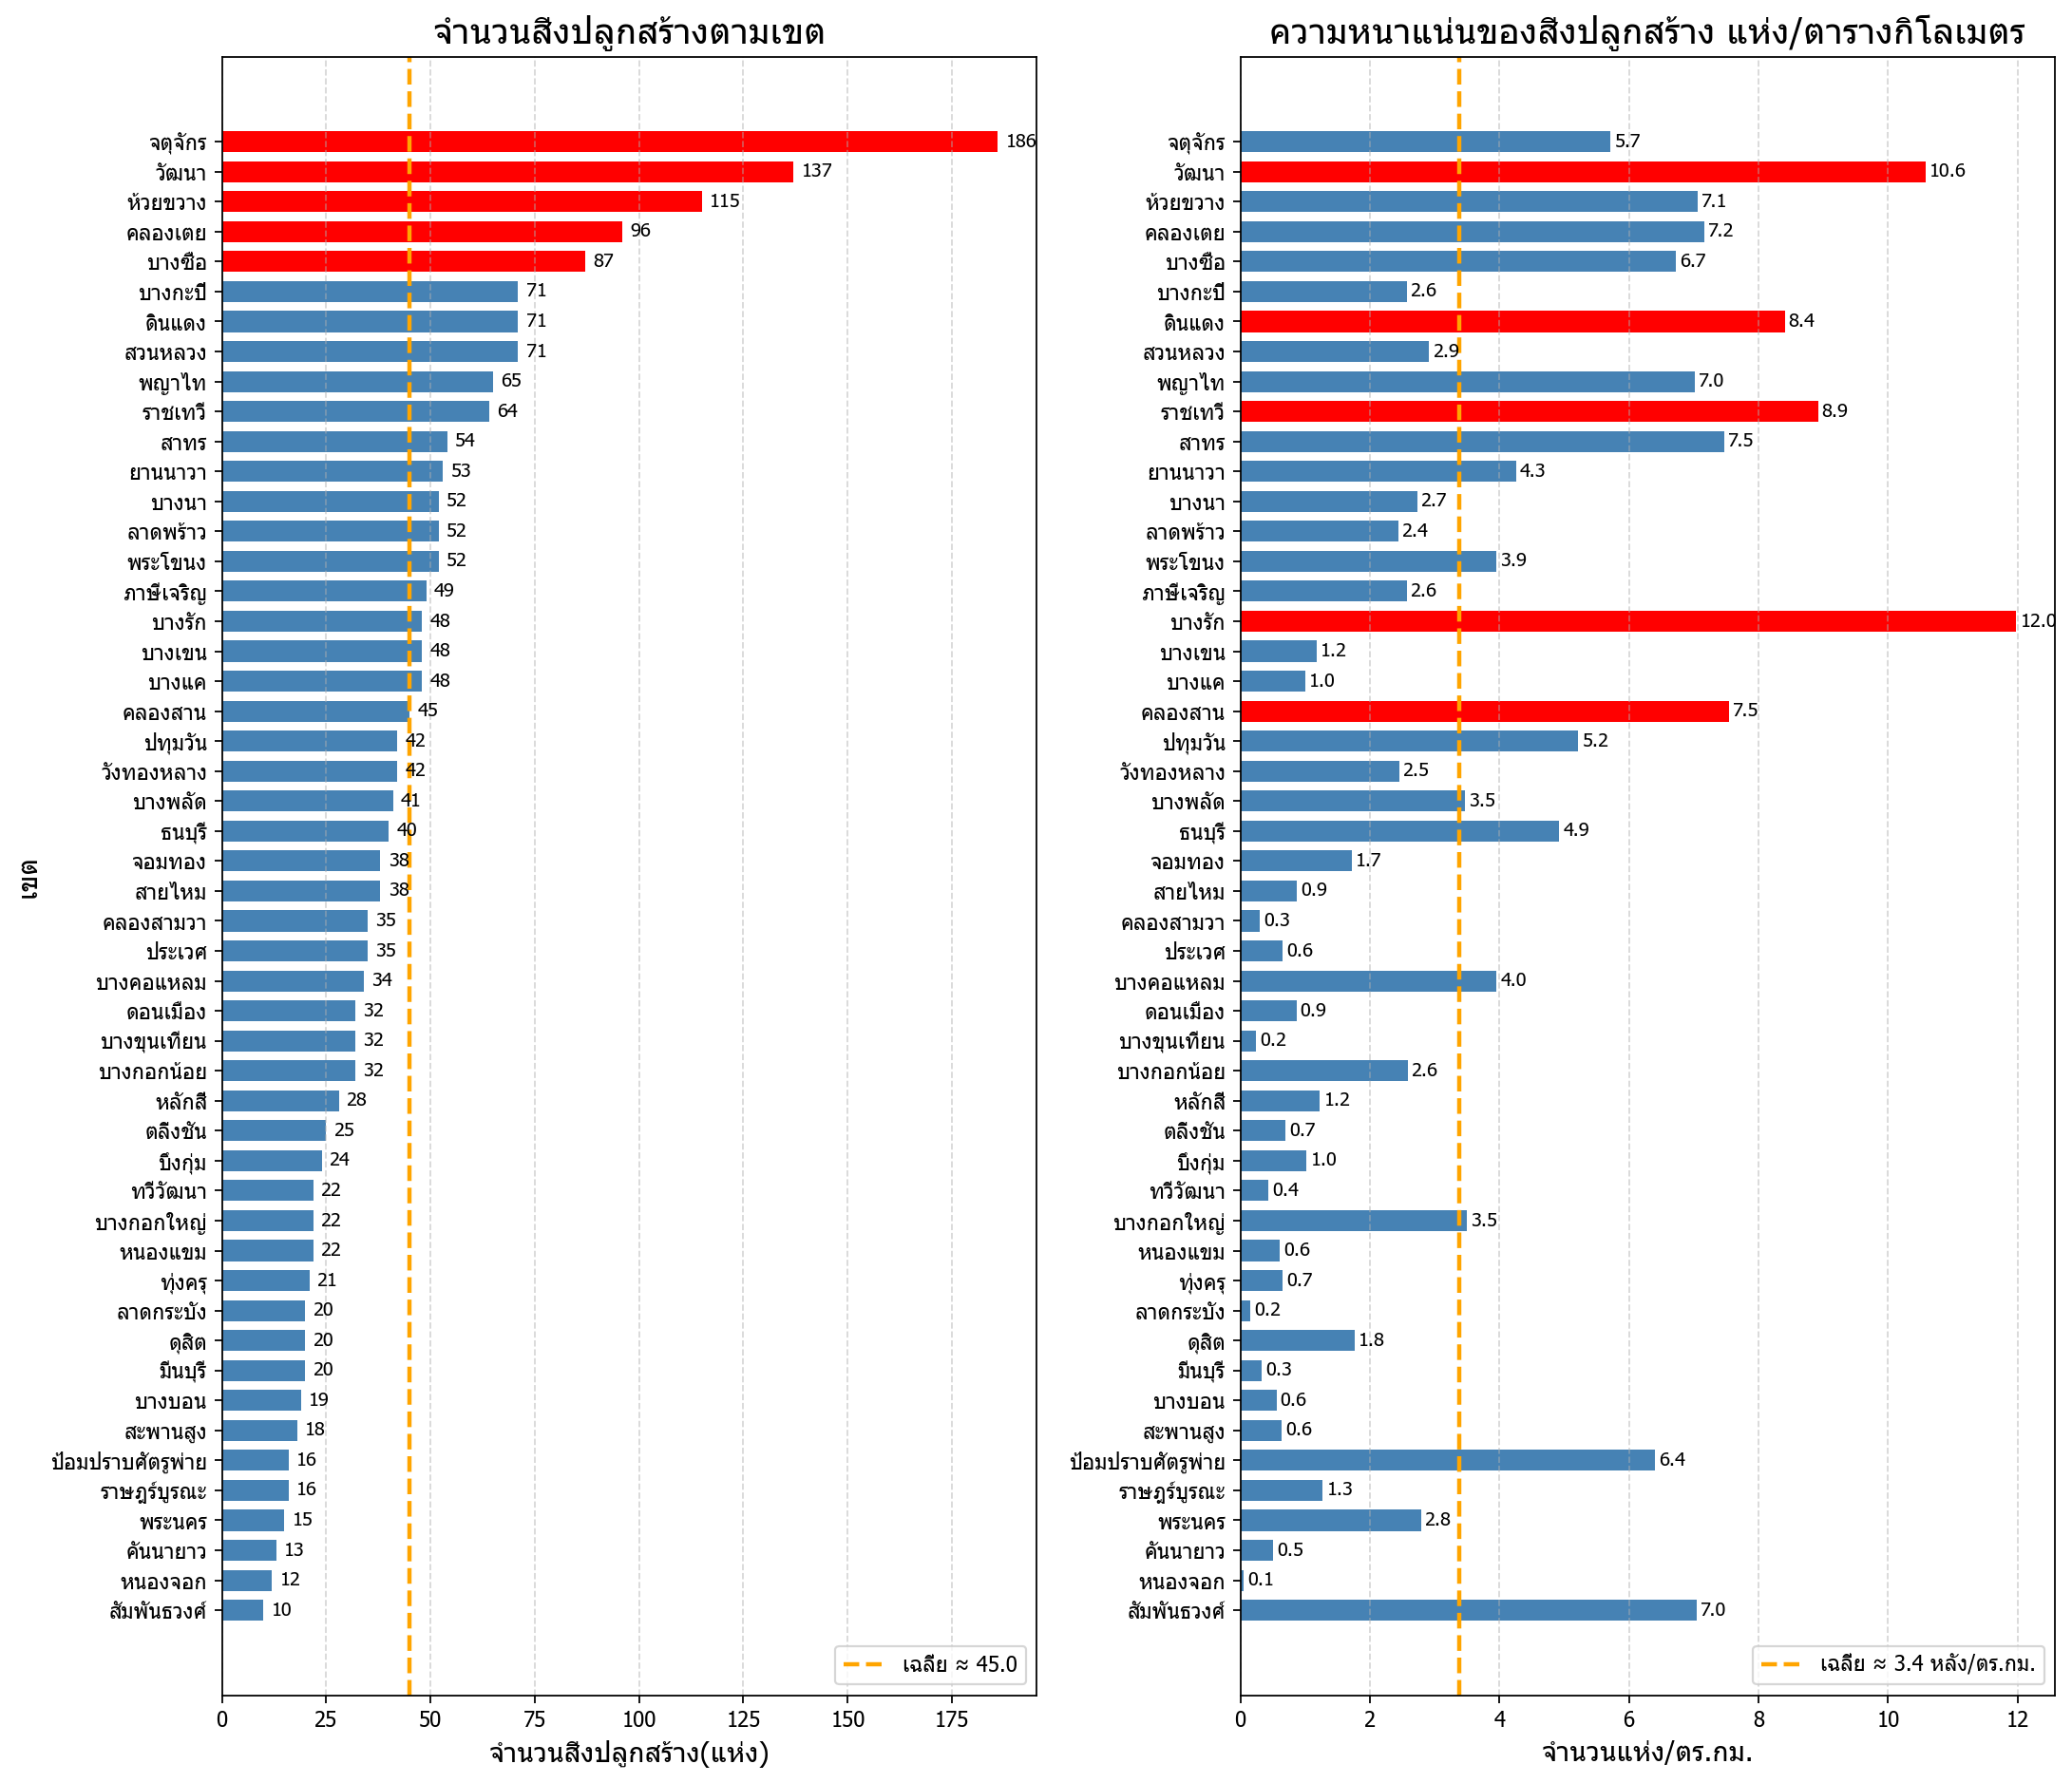

In [453]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ===== 0) ฟอนต์ไทย =====
# ใส่ลิสต์ fallback: ใช้อันที่มีในเครื่องได้เลย
rcParams['font.family'] = ['Tahoma']

# ===== 1) ฟิลเตอร์เฉพาะ total_dmg_class_id = 1,2,3,4,5 =====
df_filtered = df[df['total_dmg_class_id'].isin([1, 2, 3, 4, 5])]

# ===== 2) นับจำนวนอาคารต่อเขต =====
count_by_district = df_filtered['DISTRICT'].value_counts()


# ===== 2) สร้างตารางพื้นที่ (ตารางเมตร) จากข้อมูลที่ให้มา =====
area_m2_data = {
    "คลองเตย": 13395850.11, "คลองสาน": 5967813.347, "คลองสามวา": 115002594.5, "คันนายาว": 25514583.4,
    "จตุจักร": 32543975.49, "จอมทอง": 22147127.08, "ดอนเมือง": 36956389.63, "ดินแดง": 8447460.177,
    "ดุสิต": 11344212.37, "ตลิ่งชัน": 35631286.19, "ทวีวัฒนา": 50110520.26, "ทุ่งครุ": 32208149.33,
    "ธนบุรี": 8129089.741, "บางเขน": 40791981.63, "บางแค": 47848535.39, "บางกอกใหญ่": 6289603.771,
    "บางกอกน้อย": 12347899.42, "บางกะปิ": 27575782.83, "บางขุนเทียน": 129682959.6, "บางคอแหลม": 8597190.281,
    "บางซื่อ": 12926994.85, "บางนา": 19031254.87, "บางบอน": 34125349.08, "บางพลัด": 11818996.08,
    "บางรัก": 4006288.919, "บึงกุ่ม": 23400020.21, "ปทุมวัน": 8046091.198, "ประเวศ": 53886702.71,
    "ป้อมปราบศัตรูพ่าย": 2497818.097, "พญาไท": 9256707.26, "พระโขนง": 13175609.28, "พระนคร": 5377063.356,
    "ภาษีเจริญ": 19038997.8, "มีนบุรี": 59962935.87, "ยานนาวา": 12458840.3, "ราชเทวี": 7176491.482,
    "ราษฎร์บูรณะ": 12583940.67, "ลาดกระบัง": 128358416.9, "ลาดพร้าว": 21337338.18, "วังทองหลาง": 17079674.32,
    "วัฒนา": 12951358.45, "สวนหลวง": 24354050.34, "สะพานสูง": 27979997.24, "สัมพันธวงศ์": 1420221.346,
    "สาทร": 7225261.693, "สายไหม": 43476984.87, "หนองแขม": 36416084.28, "หนองจอก": 238394891.4,
    "หลักสี่": 22761904.77, "ห้วยขวาง": 16282278.4,
}
area_m2 = pd.Series(area_m2_data, name="area_m2")

# ===== 3) ทำให้สองกราฟเทียบกันได้จริง: ใช้เฉพาะ 'common districts'
common_idx = count_by_district.index.intersection(area_m2.index)

# ข้อมูลที่ใช้วาดกราฟ (จำกัดเฉพาะ common)
count_common = count_by_district.loc[common_idx]
area_common_km2 = area_m2.loc[common_idx] / 1_000_000  # แปลงตร.ม. -> ตร.กม.
density_per_km2 = count_common / area_common_km2

# ===== 4) เลือกลำดับการเรียง (count หรือ density)
ORDER_BY = "count"      # เปลี่ยนเป็น "density" ได้
if ORDER_BY == "count":
    y_index = count_common.sort_values(ascending=True).index
else:
    y_index = density_per_km2.sort_values(ascending=True).index

count_plot = count_common.loc[y_index]
density_plot = density_per_km2.loc[y_index]

# ===== 5) คำนวณค่าเฉลี่ย + หา Top 5 ของแต่ละกราฟ
avg_count   = count_plot.mean()
avg_density = density_plot.mean()

top5_count_idx  = count_plot.sort_values(ascending=False).head(5).index
top5_dense_idx  = density_plot.sort_values(ascending=False).head(5).index

colors_count = ["red" if d in top5_count_idx else "steelblue" for d in y_index]
colors_dense = ["red" if d in top5_dense_idx else "steelblue" for d in y_index]

# ===== 6) วาด 'สองกราฟเคียงข้าง' ในรูปเดียว (sharey=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 14), sharey=True)

# --- ซ้าย: จำนวนอาคาร ---
bars1 = ax1.barh(y_index, count_plot.values, height=0.7, color=colors_count)
ax1.axvline(avg_count, color='orange', linestyle='--', linewidth=2, label=f"เฉลี่ย ≈ {avg_count:.1f}")
ax1.set_title("จำนวนสิ่งปลูกสร้างตามเขต", fontsize=17)
ax1.set_xlabel("จำนวนสิ่งปลูกสร้าง(แห่ง)", fontsize=13)
ax1.set_ylabel("เขต", fontsize=13)
ax1.xaxis.grid(True, linestyle="--", alpha=0.5)

for bar in bars1:
    w = bar.get_width()
    ax1.text(w + (count_plot.max()*0.01), bar.get_y()+bar.get_height()/2, f"{int(w)}",
             va='center', ha='left', fontsize=9)

ax1.legend(loc="lower right")

# --- ขวา: ความหนาแน่น (อาคาร/ตร.กม.) ---
bars2 = ax2.barh(y_index, density_plot.values, height=0.7, color=colors_dense)

# ✅ ให้แกน y ของกราฟขวาแสดงชื่อเขตเพียงครั้งเดียว (ฝั่งซ้าย)
ax2.tick_params(axis="y", which="both", labelleft=True, labelright=False)

# วาดเส้นค่าเฉลี่ย + legend
ax2.axvline(avg_density, color='orange', linestyle='--', linewidth=2,
            label=f"เฉลี่ย ≈ {avg_density:.1f} หลัง/ตร.กม.")
ax2.legend(loc="lower right")

ax2.set_title("ความหนาแน่นของสิ่งปลูกสร้าง แห่ง/ตารางกิโลเมตร", fontsize=17)
ax2.set_xlabel("จำนวนแห่ง/ตร.กม.", fontsize=13)
ax2.xaxis.grid(True, linestyle="--", alpha=0.5)




# เพิ่มทั้งค่า density + ชื่อเขต ที่ปลายแท่ง
for bar, district in zip(bars2, y_index):
    w = bar.get_width()
    ax2.text(
        w + (density_plot.max() * 0.005),  # offset นิดหน่อย
        bar.get_y() + bar.get_height()/2,
        f"{w:,.1f}",       # แสดงทั้งค่า + ชื่อเขต
        va='center', ha='left', fontsize=9
    )



plt.savefig(r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\total_dmg_class_summary2.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.subplots_adjust(left=0.26, right=0.93, wspace=0.25)



บันทึกกราฟเรียบร้อย: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\building_count_and_density_side_by_side.jpg


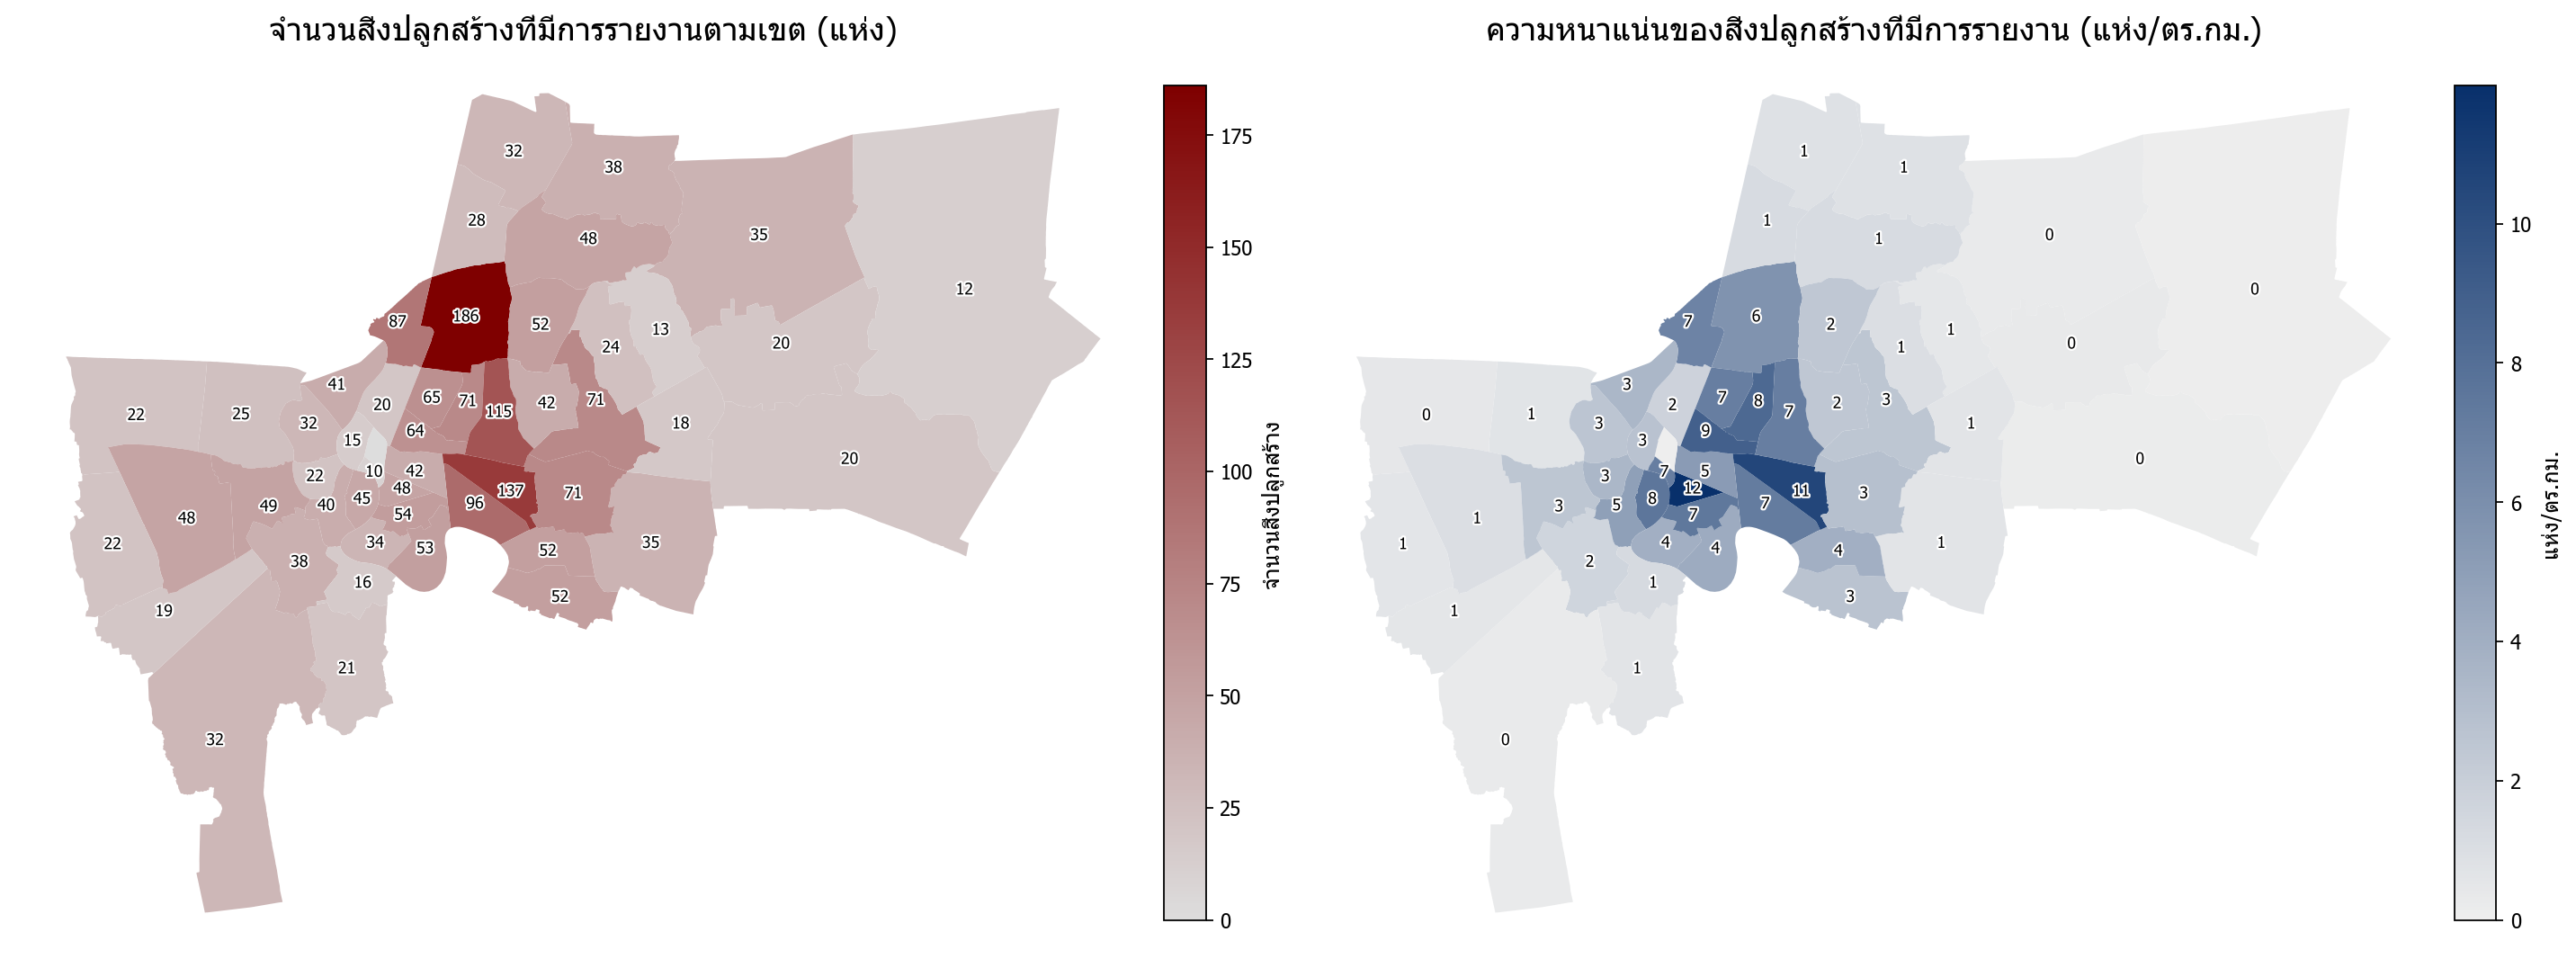

In [461]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
from matplotlib import rcParams
from shapely.geometry import Polygon, MultiPolygon

# =========[ ฟอนต์ไทย ]=========
rcParams['font.family'] = 'Tahoma'

# =========[ PATHS ]=========
excel_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped(1).xlsx"
shp_path   = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"
output_jpg = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\building_count_and_density_side_by_side.jpg"

# =========[ เตรียม df ถ้ายังไม่มี ]=========
if "df" not in globals():
    df = pd.read_excel(excel_path)

def normname(s: pd.Series) -> pd.Series:
    return s.astype(str).str.replace(r"^\s*เขต", "", regex=True).str.strip()

# =========[ 0) ฟิลเตอร์เฉพาะ total_dmg_class_id = 1..5 ]=========
if "total_dmg_class_id" in df.columns:
    df_filtered = df[df["total_dmg_class_id"].isin([1, 2, 3, 4, 5])].copy()
else:
    # ถ้าไม่มีคอลัมน์ ให้ใช้ df เดิม (กันโค้ดล้ม) และแจ้งเตือนใน console
    print("⚠️ ไม่พบคอลัมน์ 'total_dmg_class_id' ใน df → ใช้ข้อมูลทั้งหมดแทน")
    df_filtered = df.copy()

# =========[ 1) จำนวนอาคารต่อเขต (ใช้ df_filtered) ]=========
if "DISTRICT" not in df_filtered.columns:
    raise KeyError("ไม่พบคอลัมน์ DISTRICT ใน df / df_filtered")

count_by_district = (
    df_filtered.assign(DISTRICT=df_filtered["DISTRICT"].astype(str).str.strip())
               .groupby("DISTRICT")
               .size()
               .reset_index(name="building_count")
)
count_by_district["DISTRICT"] = normname(count_by_district["DISTRICT"])

# =========[ 2) อ่าน shapefile + dissolve ]=========
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)

name_col = "DISTRICT_N" if "DISTRICT_N" in gdf.columns else "DISTRICT"
gdf[name_col] = normname(gdf[name_col])

# ใช้ UTM Zone 47N เพื่อคำนวณพื้นที่/บัฟเฟอร์
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by=name_col)

# ปิดช่องแคบ + ลบรู + เก็บชิ้นใหญ่สุด
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M)

def remove_all_holes(geom):
    if isinstance(geom, MultiPolygon):
        return MultiPolygon([Polygon(p.exterior) for p in geom.geoms])
    elif isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    return geom

def keep_largest_part(geom):
    if isinstance(geom, MultiPolygon):
        parts = sorted(geom.geoms, key=lambda p: p.area, reverse=True)
        return Polygon(parts[0].exterior) if parts else None
    elif isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(remove_all_holes).apply(keep_largest_part)

# พื้นที่หน่วย ตร.กม.
dist["area_km2"] = dist.geometry.area / 1_000_000

# กลับ WGS84 เพื่อพล็อต/ใส่ label
dist_wgs = dist.to_crs(epsg=4326).reset_index().rename(columns={name_col: "DISTRICT_N"})

# =========[ 3) merge ตารางนับอาคารเข้ากับเขต ]=========
gmap = dist_wgs.merge(count_by_district, left_on="DISTRICT_N", right_on="DISTRICT", how="left")
gmap["building_count"] = gmap["building_count"].fillna(0).astype(int)

# ใช้ area_km2 ที่ติดมาจาก dist_wgs (คำนวณในระบบเมตรแล้ว) เพื่อหาความหนาแน่น
if "area_km2" not in gmap.columns:
    raise KeyError("ไม่พบคอลัมน์ area_km2 หลัง merge (ตรวจขั้นตอน dissolve/คำนวณพื้นที่)")
gmap["density"] = gmap["building_count"] / gmap["area_km2"]  # แห่ง/ตร.กม.

# =========[ 4) colormap ]=========
cmap_count = mcolors.LinearSegmentedColormap.from_list("gray_red", ["#dddddd", "#7f0000"])
cmap_dens  = mcolors.LinearSegmentedColormap.from_list("gray_blue", ["#eeeeee", "#08306b"])

norm_count = mcolors.Normalize(vmin=gmap["building_count"].min(), vmax=gmap["building_count"].max())
norm_dens  = mcolors.Normalize(vmin=gmap["density"].min(), vmax=gmap["density"].max())

# =========[ 5) plot side-by-side ]=========
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 9))

# ซ้าย: จำนวนอาคาร (เฉพาะเคสเสียหายระดับ 1–5)
gmap.plot(column="building_count", cmap=cmap_count, linewidth=0, edgecolor="none", ax=ax1)
ax1.set_title("จำนวนสิ่งปลูกสร้างที่มีการรายงานตามเขต (แห่ง)", fontsize=16)
ax1.set_axis_off()

# ขวา: ความหนาแน่น (แห่ง/ตร.กม.)
gmap.plot(column="density", cmap=cmap_dens, linewidth=0, edgecolor="none", ax=ax2)
ax2.set_title("ความหนาแน่นของสิ่งปลูกสร้างที่มีการรายงาน (แห่ง/ตร.กม.)", fontsize=16)
ax2.set_axis_off()

# ใส่ label เฉพาะค่าที่ > 0
gmap["label_point"] = gmap.representative_point()
for _, r in gmap.iterrows():
    if r["building_count"] > 0:
        ax1.text(r["label_point"].x, r["label_point"].y, f"{int(r['building_count']):,}",
                 fontsize=8, ha="center", va="center", color="black",
                 path_effects=[pe.withStroke(linewidth=2, foreground="white")])
        ax2.text(r["label_point"].x, r["label_point"].y, f"{r['density']:.0f}",
                 fontsize=8, ha="center", va="center", color="black",
                 path_effects=[pe.withStroke(linewidth=2, foreground="white")])

# Colorbar
sm1 = plt.cm.ScalarMappable(cmap=cmap_count, norm=norm_count); sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1, fraction=0.035, pad=0.01)
cbar1.set_label("จำนวนสิ่งปลูกสร้าง", fontsize=11)

sm2 = plt.cm.ScalarMappable(cmap=cmap_dens, norm=norm_dens); sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, fraction=0.035, pad=0.01)
cbar2.set_label("แห่ง/ตร.กม.", fontsize=11)

plt.tight_layout()
plt.savefig(output_jpg, dpi=600, bbox_inches="tight")
print(f"บันทึกกราฟเรียบร้อย: {output_jpg}")
plt.show()


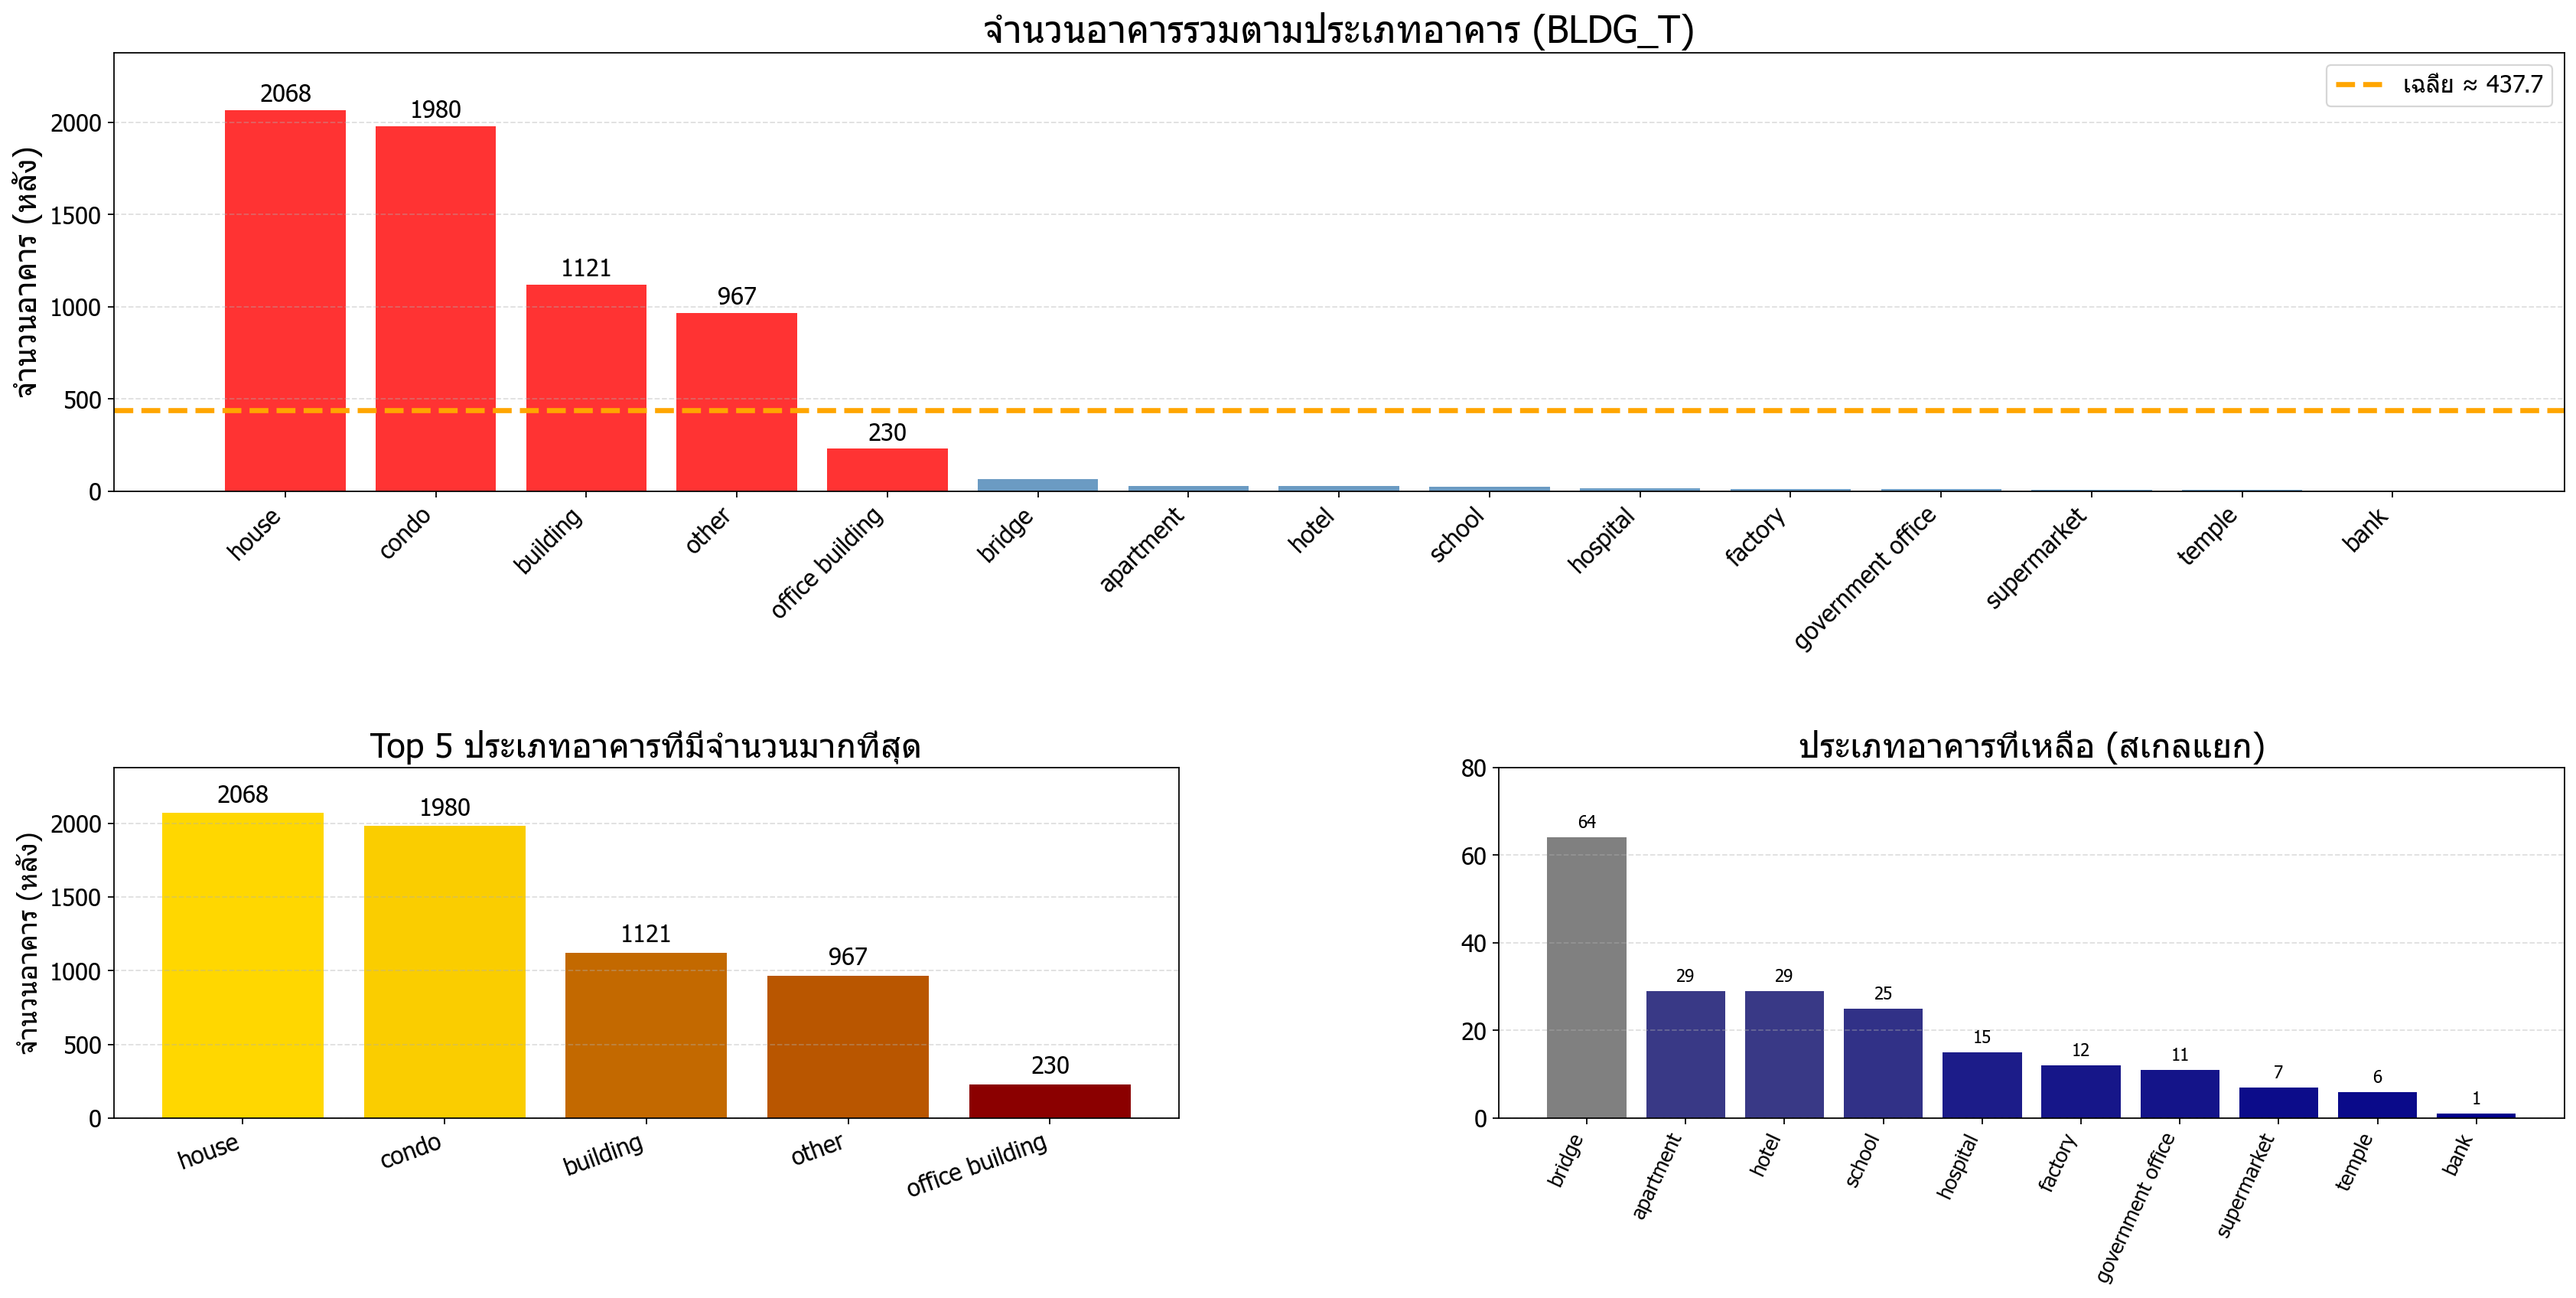

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูล =====
count_by_bldg = df['BLDG_T'].value_counts()
top5_bldg = count_by_bldg.head(5)
others_bldg = count_by_bldg.tail(len(count_by_bldg)-5).sort_values(ascending=False)

colors_top = ['red' if b in top5_bldg.index else 'steelblue' for b in count_by_bldg.index]

avg_value = count_by_bldg.mean()

# ===== 2) กำหนด colormap กำหนดเอง =====
# Top 5: ไล่สีแดงเข้ม -> เหลืองเข้ม
cmap_top5 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top5 = mcolors.Normalize(vmin=top5_bldg.min(), vmax=top5_bldg.max())
colors_top5 = [cmap_top5(norm_top5(v)) for v in top5_bldg.values]

# Others: ไล่สีน้ำเงินเข้ม -> เทา
cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others_bldg.min(), vmax=others_bldg.max())
colors_others = [cmap_others(norm_others(v)) for v in others_bldg.values]

# ===== 3) Layout =====
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(count_by_bldg.index, count_by_bldg.values, color=colors_top, alpha=0.8)

ax_top.set_ylim(0, count_by_bldg.max() * 1.15)
ax_top.axhline(avg_value, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_value:.1f}")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("จำนวนอาคารรวมตามประเภทอาคาร (BLDG_T)", fontsize=22)
ax_top.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=18)
ax_top.set_xticks(range(len(count_by_bldg.index)))
ax_top.set_xticklabels(count_by_bldg.index, rotation=45, ha='right', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars_top:
    h = bar.get_height()
    if h > count_by_bldg.max() * 0.05:
        ax_top.text(bar.get_x() + bar.get_width()/2,
                    h + count_by_bldg.max()*0.01,
                    f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างซ้าย: Top 5 (แดงเข้ม -> เหลืองเข้ม) =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top5_bldg.index, top5_bldg.values, color=colors_top5)

ax1.set_ylim(0, top5_bldg.max() * 1.15)
ax1.set_title("Top 5 ประเภทอาคารที่มีจำนวนมากที่สุด", fontsize=20)
ax1.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=16)
ax1.set_xticks(range(len(top5_bldg.index)))
ax1.set_xticklabels(top5_bldg.index, rotation=20, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
             h + top5_bldg.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างขวา: Others (น้ำเงินเข้ม -> เทา) =====
ax2 = fig.add_subplot(gs[1, 1])
bars2 = ax2.bar(others_bldg.index, others_bldg.values, color=colors_others)

ax2.set_ylim(0, others_bldg.max() * 1.25)
ax2.set_title("ประเภทอาคารที่เหลือ (สเกลแยก)", fontsize=20)
ax2.set_xticks(range(len(others_bldg.index)))
ax2.set_xticklabels(others_bldg.index, rotation=65, ha='right', fontsize=12)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
             h + others_bldg.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(left=0.07, right=0.98, top=0.93, hspace=0.7, wspace=0.3, bottom=0.35)
plt.savefig("total_dmg_class_summary3.jpg", format='jpg', dpi=900, bbox_inches='tight')
plt.show()


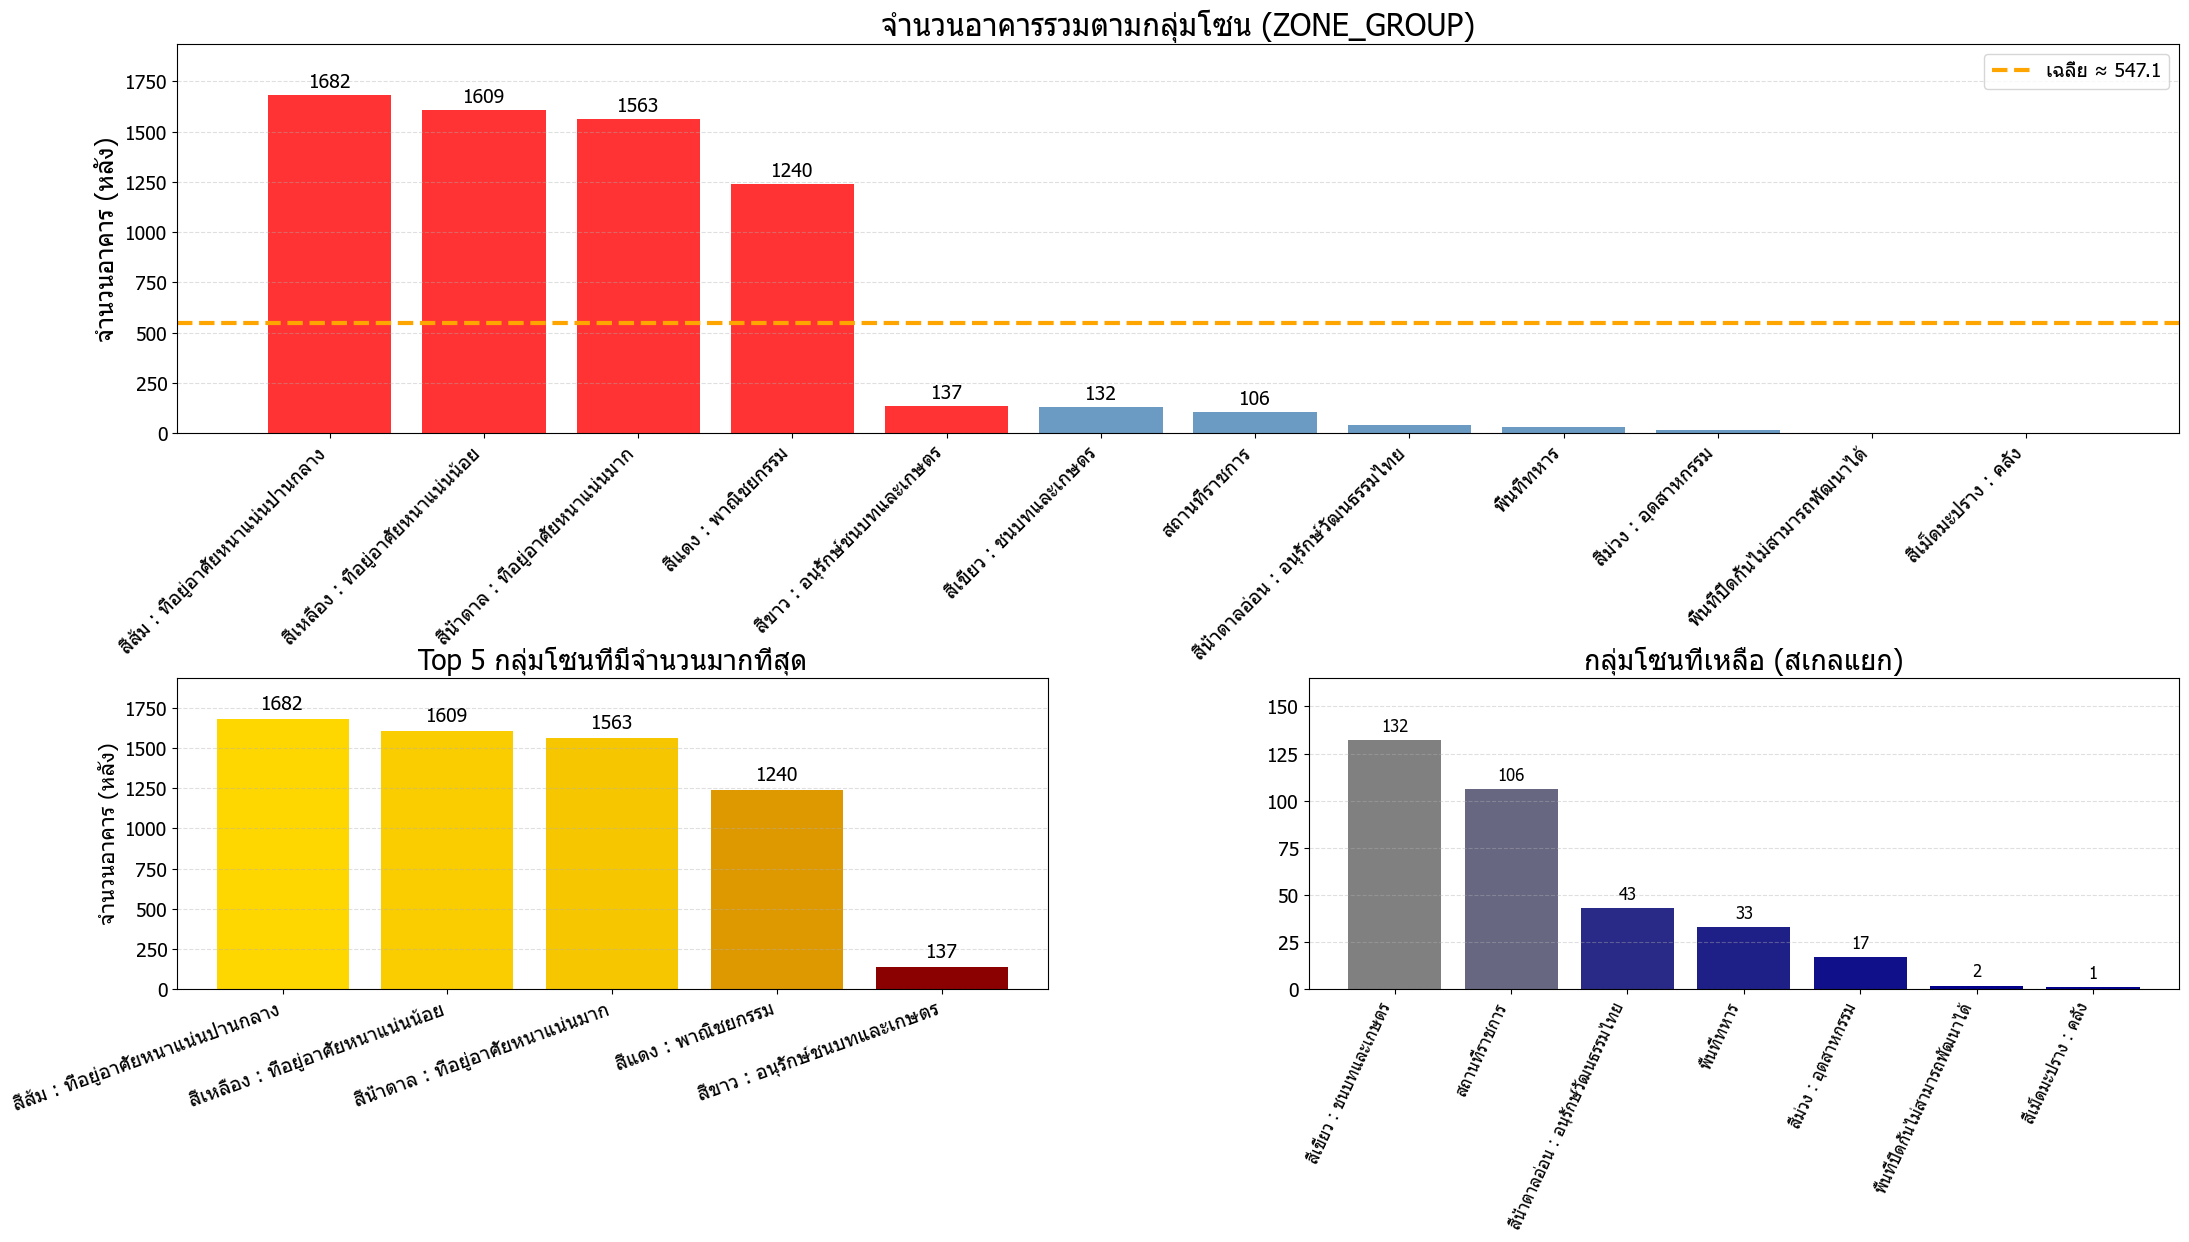

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูล =====
count_by_zone = df['ZONE_GROUP'].value_counts()
top5_zone = count_by_zone.head(5)
others_zone = count_by_zone.tail(len(count_by_zone)-5).sort_values(ascending=False)

colors_top = ['red' if z in top5_zone.index else 'steelblue' for z in count_by_zone.index]

avg_value = count_by_zone.mean()

# ===== 2) กำหนด colormap กำหนดเอง =====
# Top 5: ไล่สีแดงเข้ม -> เหลืองเข้ม
cmap_top5 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top5 = mcolors.Normalize(vmin=top5_zone.min(), vmax=top5_zone.max())
colors_top5 = [cmap_top5(norm_top5(v)) for v in top5_zone.values]

# Others: ไล่สีน้ำเงินเข้ม -> เทา
cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others_zone.min(), vmax=others_zone.max())
colors_others = [cmap_others(norm_others(v)) for v in others_zone.values]

# ===== 3) Layout =====
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(count_by_zone.index, count_by_zone.values, color=colors_top, alpha=0.8)

ax_top.set_ylim(0, count_by_zone.max() * 1.15)
ax_top.axhline(avg_value, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_value:.1f}")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("จำนวนอาคารรวมตามกลุ่มโซน (ZONE_GROUP)", fontsize=22)
ax_top.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=18)
ax_top.set_xticks(range(len(count_by_zone.index)))
ax_top.set_xticklabels(count_by_zone.index, rotation=45, ha='right', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars_top:
    h = bar.get_height()
    if h > count_by_zone.max() * 0.05:
        ax_top.text(bar.get_x() + bar.get_width()/2,
                    h + count_by_zone.max()*0.01,
                    f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างซ้าย: Top 5 (แดงเข้ม -> เหลืองเข้ม) =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top5_zone.index, top5_zone.values, color=colors_top5)

ax1.set_ylim(0, top5_zone.max() * 1.15)
ax1.set_title("Top 5 กลุ่มโซนที่มีจำนวนมากที่สุด", fontsize=20)
ax1.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=16)
ax1.set_xticks(range(len(top5_zone.index)))
ax1.set_xticklabels(top5_zone.index, rotation=20, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
             h + top5_zone.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างขวา: Others (น้ำเงินเข้ม -> เทา) =====
ax2 = fig.add_subplot(gs[1, 1])
bars2 = ax2.bar(others_zone.index, others_zone.values, color=colors_others)

ax2.set_ylim(0, others_zone.max() * 1.25)
ax2.set_title("กลุ่มโซนที่เหลือ (สเกลแยก)", fontsize=20)
ax2.set_xticks(range(len(others_zone.index)))
ax2.set_xticklabels(others_zone.index, rotation=65, ha='right', fontsize=12)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
             h + others_zone.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=12)

plt.subplots_adjust(left=0.07, right=0.98, top=0.98, hspace=0.7, wspace=0.3, bottom=0.35)
plt.savefig("total_dmg_class_summary4.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()


In [465]:
import pandas as pd

# ===== นับจำนวนอาคารต่อ ZONE_GROUP =====
count_by_zone_group = (
    df.groupby("ZONE_GROUP")          # จัดกลุ่มตาม ZONE_GROUP
      .size()                         # นับจำนวน record
      .reset_index(name="building_count")  # เปลี่ยนเป็น DataFrame พร้อมคอลัมน์ชื่อ
      .sort_values("building_count", ascending=False)  # เรียงจากมาก -> น้อย
)

print(count_by_zone_group)


                            ZONE_GROUP  building_count
7   สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง            1682
10  สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย            1609
4    สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก            1563
11                  สีแดง : พาณิชยกรรม            1240
3         สีขาว : อนุรักษ์ชนบทและเกษตร             137
8               สีเขียว : ชนบทและเกษตร             132
2                        สถานที่ราชการ             106
5   สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย              43
0                          พื้นที่ทหาร              33
6                  สีม่วง : อุตสาหกรรม              17
1      พื้นที่ปิดกั้นไม่สามารถพัฒนาได้               2
9                  สีเม็ดมะปราง : คลัง               1


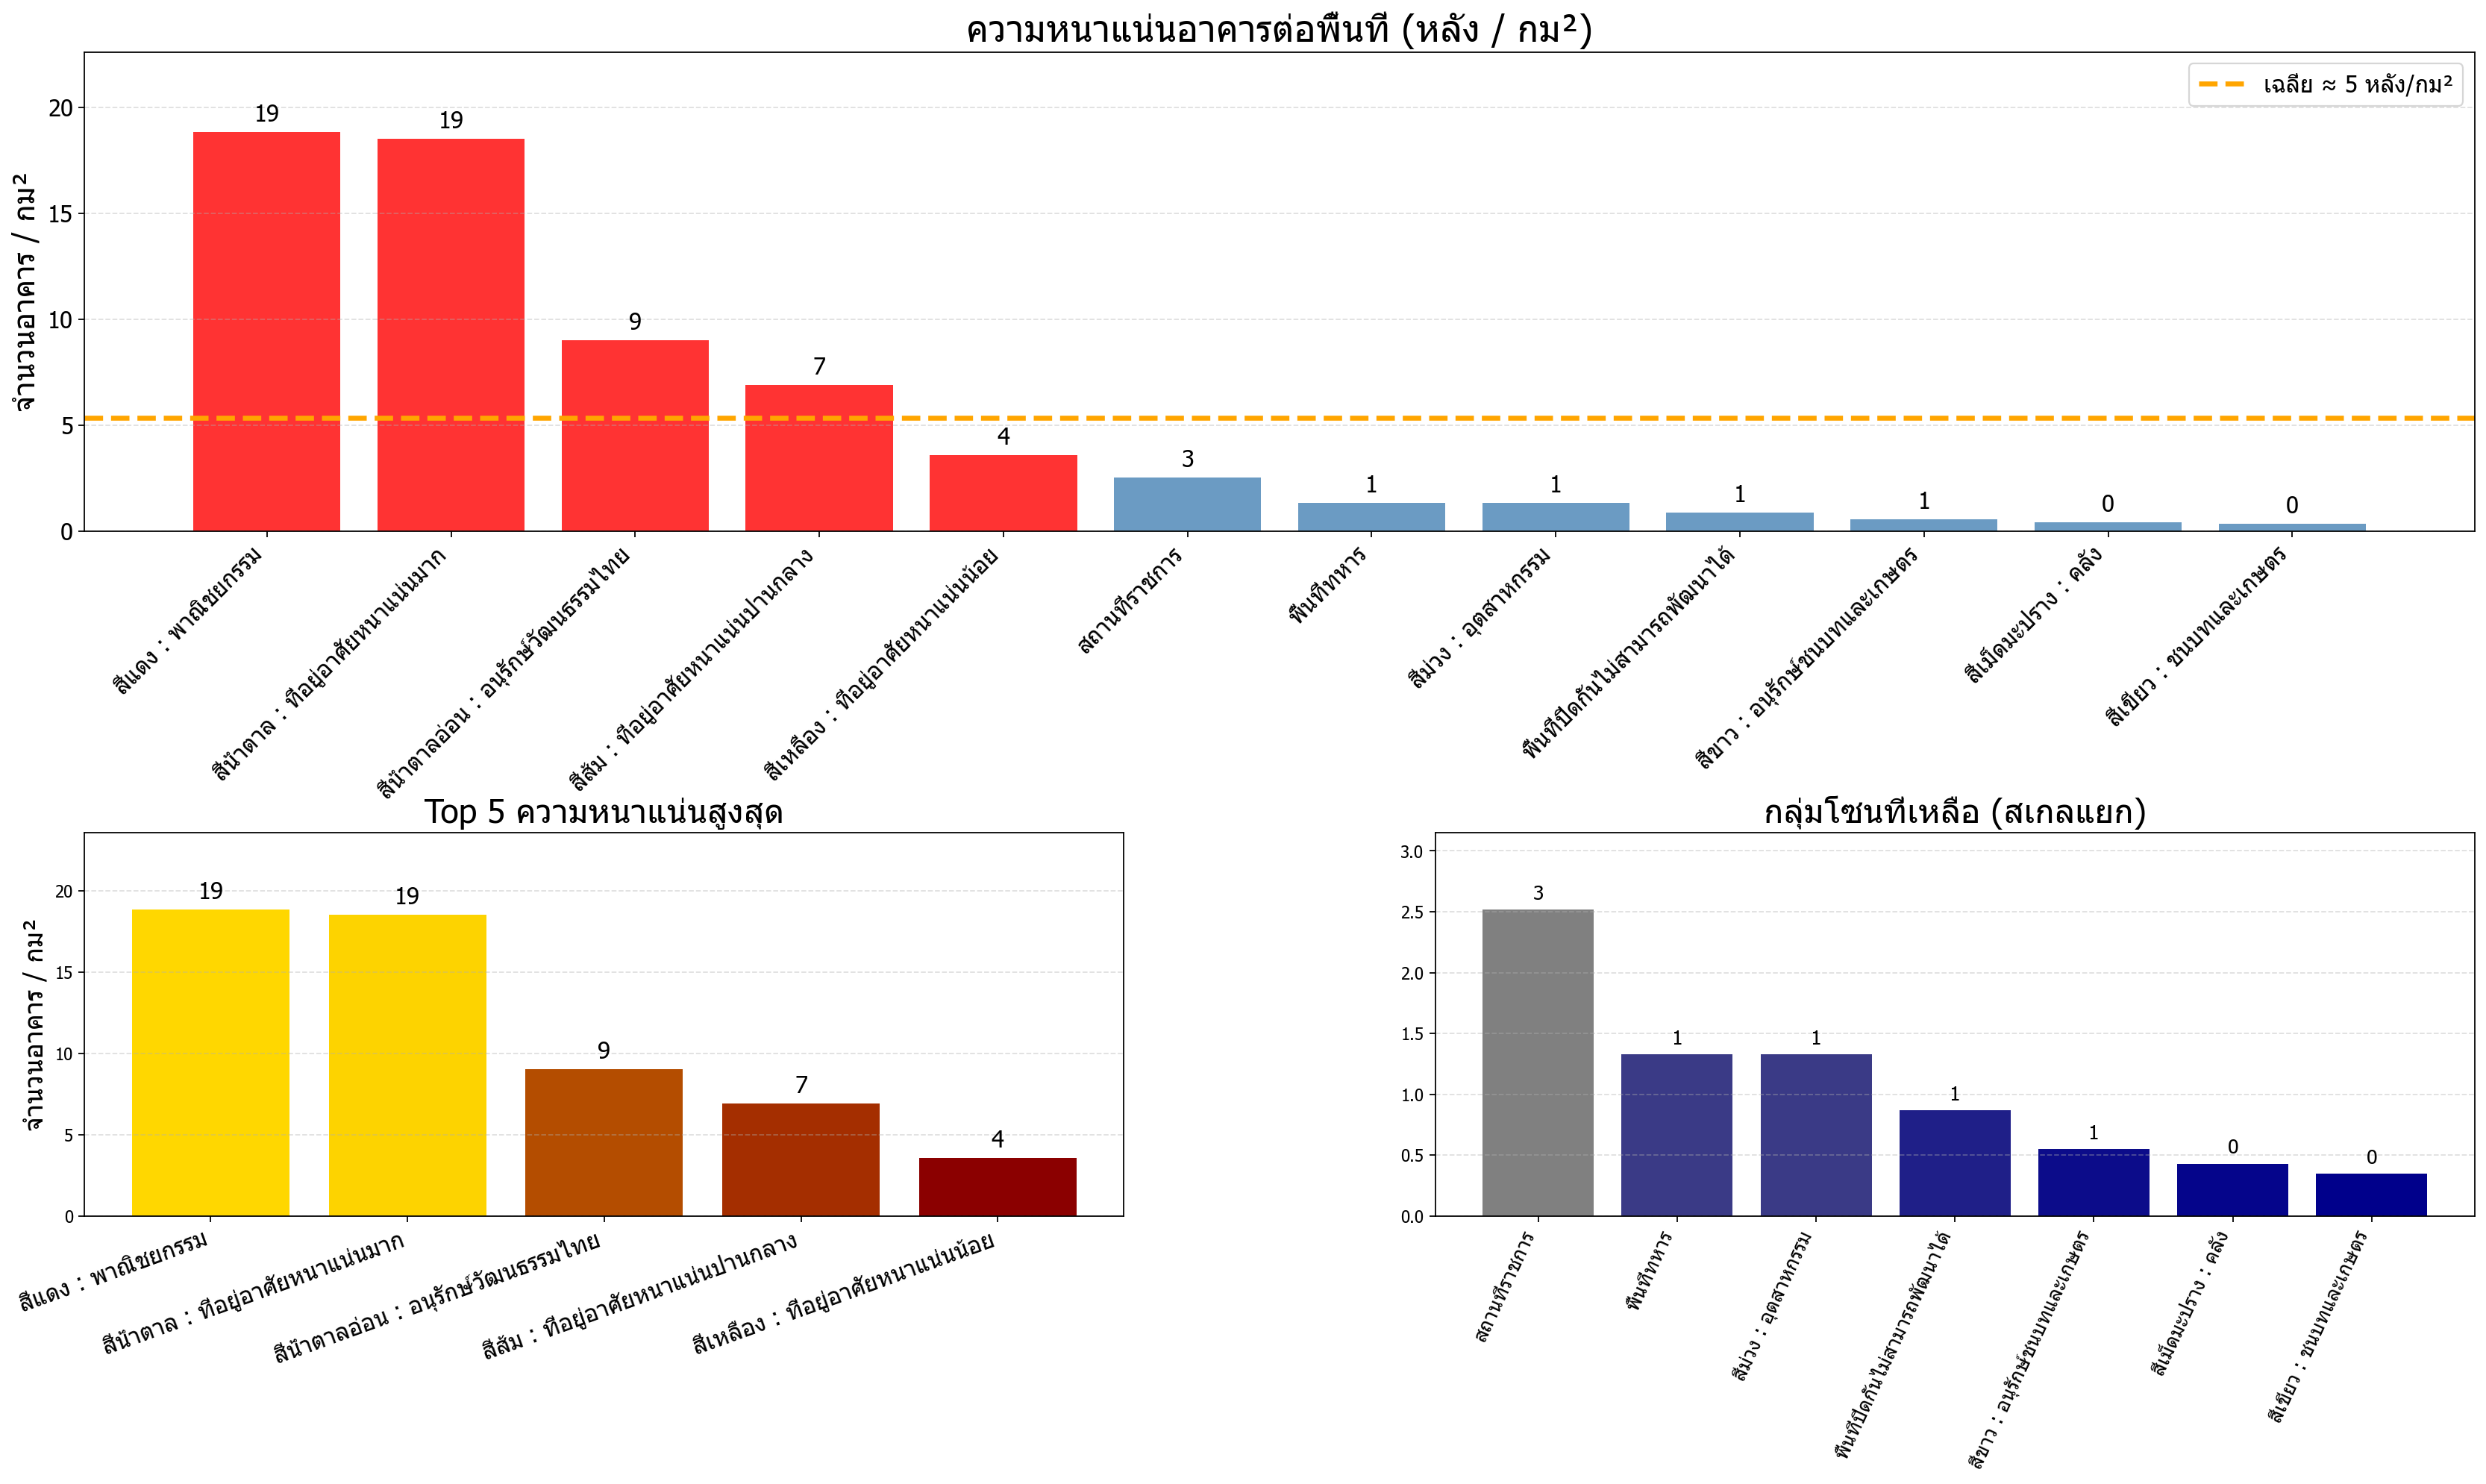

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูล =====
count_by_zone = df['ZONE_GROUP'].value_counts().rename_axis('ZONE').reset_index(name='building_count')

# ตารางพื้นที่
zone_area = pd.DataFrame({
    "ZONE": [
        "พื้นที่ทหาร", "พื้นที่ปิดกั้นไม่สามารถพัฒนาได้", "สถานที่ราชการ", "สีเขียว : ชนบทและเกษตร",
        "สีเม็ดมะปราง : คลัง", "สีเหลือง : ที่อยู่อาศัยหนาแน่นน้อย", "สีแดง : พาณิชยกรรม",
        "สีขาว : อนุรักษ์ชนบทและเกษตร", "สีน้ำตาล : ที่อยู่อาศัยหนาแน่นมาก", "สีน้ำตาลอ่อน : อนุรักษ์วัฒนธรรมไทย",
        "สีม่วง : อุตสาหกรรม", "สีส้ม : ที่อยู่อาศัยหนาแน่นปานกลาง"
    ],
    "area_m2": [
        24809782.19, 2305817.006, 42077415.96, 382099134.8, 2326010.843,
        450862777.1, 65787351.36, 250214912.7, 84393722.51, 4774021.62,
        12793537.69, 243479261
    ]
})

# คำนวณ area_km2 และ density (หลัง/กม²)
zone_area["area_km2"] = zone_area["area_m2"] / 1_000_000

merged = count_by_zone.merge(zone_area, on="ZONE", how="left")
merged["density"] = merged["building_count"] / merged["area_km2"]
merged = merged.sort_values("density", ascending=False)

top5_zone = merged.head(5)
others_zone = merged.tail(len(merged)-5)

# ===== 2) Colormap =====
cmap_top5 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top5 = mcolors.Normalize(vmin=top5_zone["density"].min(), vmax=top5_zone["density"].max())
colors_top5 = [cmap_top5(norm_top5(v)) for v in top5_zone["density"]]

cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others_zone["density"].min(), vmax=others_zone["density"].max())
colors_others = [cmap_others(norm_others(v)) for v in others_zone["density"]]

avg_density = merged["density"].mean()

# ===== 3) Layout =====
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(
    merged["ZONE"],
    merged["density"],
    color=["red" if z in top5_zone["ZONE"].values else "steelblue" for z in merged["ZONE"]],
    alpha=0.8
)

# ★ เพิ่ม headroom ให้กราฟ (ไม่ให้เลขชนขอบ)
ax_top.set_ylim(0, merged["density"].max() * 1.20)

ax_top.axhline(avg_density, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_density:,.0f} หลัง/กม²")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("ความหนาแน่นอาคารต่อพื้นที่ (หลัง / กม²)", fontsize=22)
ax_top.set_ylabel("จำนวนอาคาร / กม²", fontsize=18)
ax_top.set_xticks(range(len(merged)))
ax_top.set_xticklabels(merged["ZONE"], rotation=45, ha='right', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar, val in zip(bars_top, merged["density"]):
    ax_top.text(bar.get_x() + bar.get_width()/2,
                val + merged["density"].max()*0.015,  # ★ ลด offset นิดหน่อย
                f"{val:,.0f}", ha='center', va='bottom', fontsize=14)

# ===== ล่างซ้าย: Top 5 =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top5_zone["ZONE"], top5_zone["density"], color=colors_top5)
ax1.set_ylim(0, top5_zone["density"].max() * 1.25)  # ★ เพิ่ม headroom
ax1.set_title("Top 5 ความหนาแน่นสูงสุด", fontsize=20)
ax1.set_ylabel("จำนวนอาคาร / กม²", fontsize=16)
ax1.set_xticks(range(len(top5_zone)))
ax1.set_xticklabels(top5_zone["ZONE"], rotation=20, ha='right', fontsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar, val in zip(bars1, top5_zone["density"]):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        val + top5_zone["density"].max()*0.02,
        f"{val:,.0f}",
        ha='center', va='bottom', fontsize=14
    )

# ===== ล่างขวา: Others =====
ax2 = fig.add_subplot(gs[1, 1])
bars2 = ax2.bar(others_zone["ZONE"], others_zone["density"], color=colors_others)
ax2.set_ylim(0, others_zone["density"].max() * 1.25)  # ★ เพิ่ม headroom
ax2.set_title("กลุ่มโซนที่เหลือ (สเกลแยก)", fontsize=20)
ax2.set_xticks(range(len(others_zone)))
ax2.set_xticklabels(others_zone["ZONE"], rotation=65, ha='right', fontsize=12)
ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar, val in zip(bars2, others_zone["density"]):
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        val + others_zone["density"].max()*0.02,
        f"{val:,.0f}",
        ha='center', va='bottom', fontsize=12
    )

plt.subplots_adjust(left=0.07, right=0.98, top=1, hspace=0.7, wspace=0.3, bottom=0.35)
plt.savefig("total_dmg_class_summary5.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()


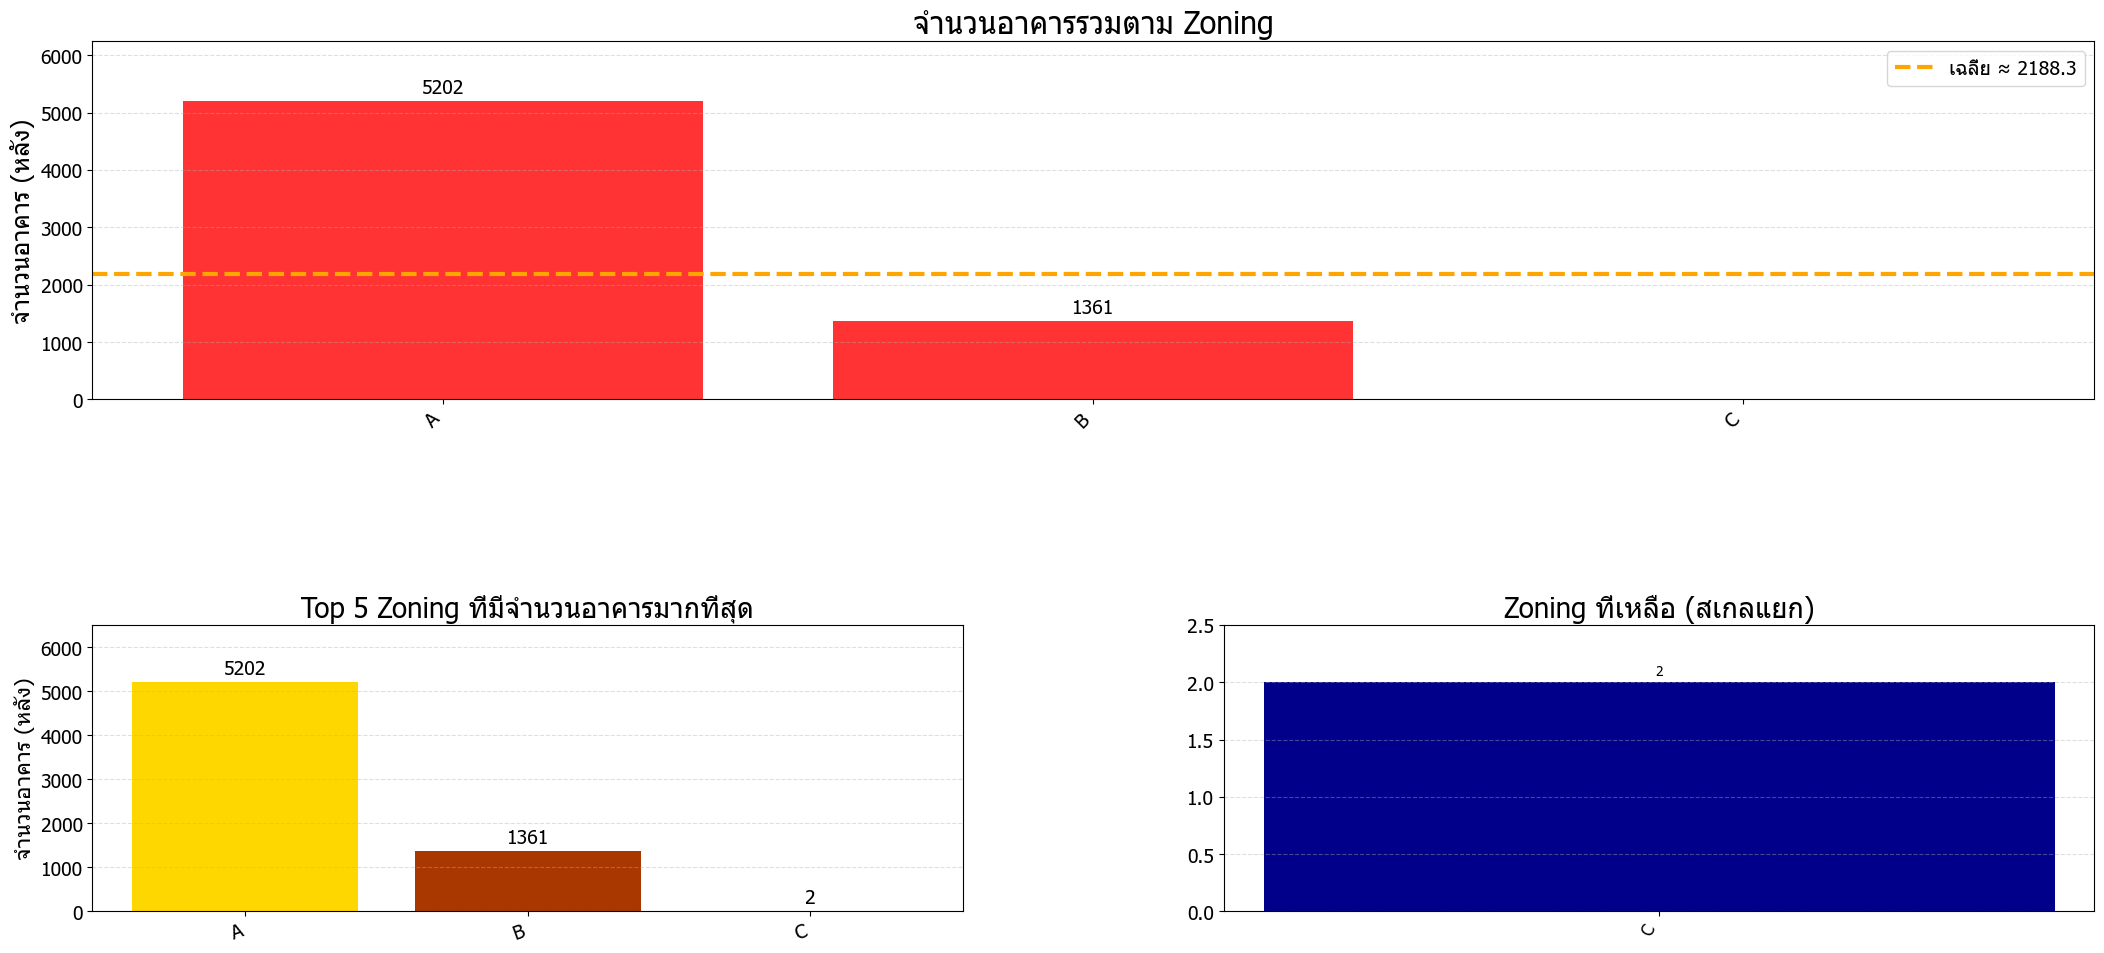

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูล =====
count_by_zone = df['Zoning'].value_counts()
top5_zone = count_by_zone.head(5)
others_zone = count_by_zone.tail(len(count_by_zone)-5).sort_values(ascending=False)

colors_top = ['red' if z in top5_zone.index else 'steelblue' for z in count_by_zone.index]

avg_value = count_by_zone.mean()

# ===== 2) กำหนด colormap =====
# Top 5: ไล่สีแดงเข้ม -> เหลืองเข้ม
cmap_top5 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top5 = mcolors.Normalize(vmin=top5_zone.min(), vmax=top5_zone.max())
colors_top5 = [cmap_top5(norm_top5(v)) for v in top5_zone.values]

# Others: ไล่สีน้ำเงินเข้ม -> เทา
cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others_zone.min(), vmax=others_zone.max())
colors_others = [cmap_others(norm_others(v)) for v in others_zone.values]

# ===== 3) Layout =====
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(count_by_zone.index, count_by_zone.values, color=colors_top, alpha=0.8)

ax_top.set_ylim(0, count_by_zone.max() * 1.20)  # เพิ่ม headroom
ax_top.axhline(avg_value, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_value:.1f}")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("จำนวนอาคารรวมตาม Zoning", fontsize=22)
ax_top.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=18)
ax_top.set_xticks(range(len(count_by_zone.index)))
ax_top.set_xticklabels(count_by_zone.index, rotation=45, ha='right', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars_top:
    h = bar.get_height()
    if h > count_by_zone.max() * 0.05:
        ax_top.text(bar.get_x() + bar.get_width()/2,
                    h + count_by_zone.max()*0.015,
                    f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างซ้าย: Top 5 =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top5_zone.index, top5_zone.values, color=colors_top5)

ax1.set_ylim(0, top5_zone.max() * 1.25)
ax1.set_title("Top 5 Zoning ที่มีจำนวนอาคารมากที่สุด", fontsize=20)
ax1.set_ylabel("จำนวนอาคาร (หลัง)", fontsize=16)
ax1.set_xticks(range(len(top5_zone.index)))
ax1.set_xticklabels(top5_zone.index, rotation=20, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
             h + top5_zone.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างขวา: Others =====
ax2 = fig.add_subplot(gs[1, 1])
bars2 = ax2.bar(others_zone.index, others_zone.values, color=colors_others)

ax2.set_ylim(0, others_zone.max() * 1.25)
ax2.set_title("Zoning ที่เหลือ (สเกลแยก)", fontsize=20)
ax2.set_xticks(range(len(others_zone.index)))
ax2.set_xticklabels(others_zone.index, rotation=65, ha='right', fontsize=12)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
             h + others_zone.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(left=0.07, right=0.98, top=0.93, hspace=0.7, wspace=0.3, bottom=0.35)
plt.savefig("total_dmg_class_summary6.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()


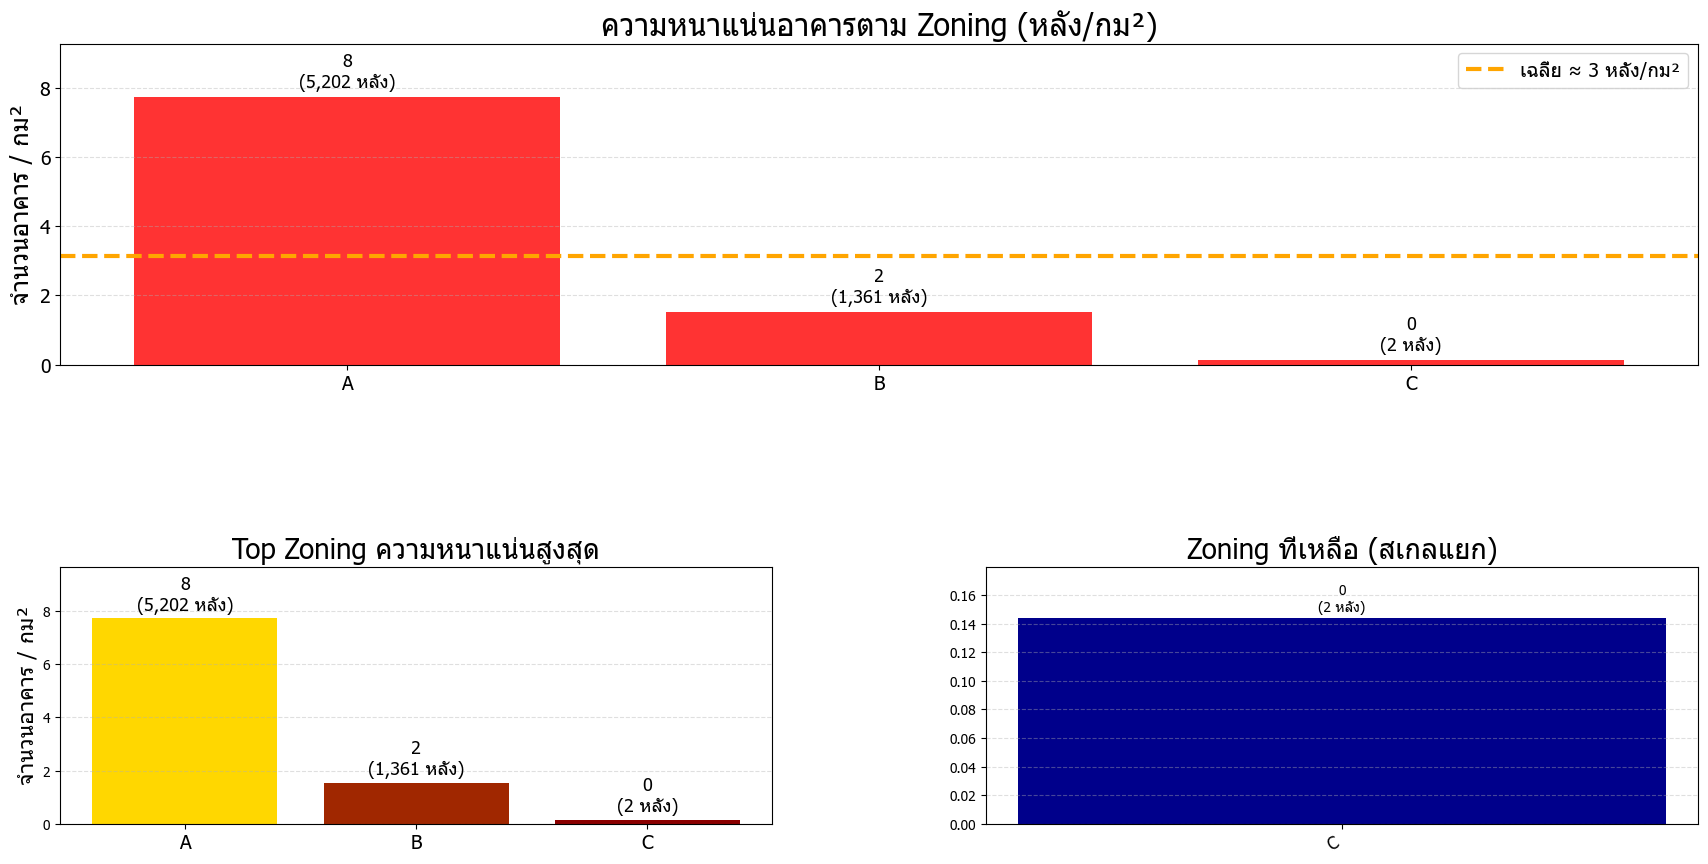

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูลจำนวนอาคาร =====
count_by_zone = df['Zoning'].value_counts().rename_axis('Zoning').reset_index(name='building_count')

# ===== 2) ตารางพื้นที่ (m² -> km²) =====
zone_area = pd.DataFrame({
    "Zoning": ["A", "B", "C"],
    "area_m2": [673_050_384.05, 889_672_540.86, 13_896_907.72]
})
zone_area["area_km2"] = zone_area["area_m2"] / 1_000_000

# ===== 3) รวมข้อมูลและคำนวณความหนาแน่น (หลัง/กม²) =====
merged = count_by_zone.merge(zone_area, on="Zoning", how="left")
merged["density"] = merged["building_count"] / merged["area_km2"]
merged = merged.sort_values("density", ascending=False)

top5 = merged.head(5)
others = merged.tail(len(merged)-5)

# ===== 4) Colormap =====
cmap_top5 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top5 = mcolors.Normalize(vmin=top5["density"].min(), vmax=top5["density"].max())
colors_top5 = [cmap_top5(norm_top5(v)) for v in top5["density"]]

cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others["density"].min(), vmax=others["density"].max()) if not others.empty else None
colors_others = [cmap_others(norm_others(v)) for v in others["density"]] if not others.empty else []

avg_density = merged["density"].mean()

# ===== 5) Layout =====
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(
    merged["Zoning"],
    merged["density"],
    color=["red" if z in top5["Zoning"].values else "steelblue" for z in merged["Zoning"]],
    alpha=0.8
)

ax_top.set_ylim(0, merged["density"].max() * 1.20)
ax_top.axhline(avg_density, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_density:,.0f} หลัง/กม²")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("ความหนาแน่นอาคารตาม Zoning (หลัง/กม²)", fontsize=22)
ax_top.set_ylabel("จำนวนอาคาร / กม²", fontsize=18)
ax_top.set_xticks(range(len(merged)))
ax_top.set_xticklabels(merged["Zoning"], rotation=0, ha='center', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar, val, count in zip(bars_top, merged["density"], merged["building_count"]):
    ax_top.text(bar.get_x() + bar.get_width()/2,
                val + merged["density"].max()*0.02,
                f"{val:,.0f}\n({count:,} หลัง)", ha='center', va='bottom', fontsize=13)

# ===== ล่างซ้าย: Top Zoning =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top5["Zoning"], top5["density"], color=colors_top5)
ax1.set_ylim(0, top5["density"].max() * 1.25)
ax1.set_title("Top Zoning ความหนาแน่นสูงสุด", fontsize=20)
ax1.set_ylabel("จำนวนอาคาร / กม²", fontsize=16)
ax1.set_xticks(range(len(top5)))
ax1.set_xticklabels(top5["Zoning"], rotation=0, ha='center', fontsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar, val, count in zip(bars1, top5["density"], top5["building_count"]):
    ax1.text(bar.get_x() + bar.get_width()/2,
             val + top5["density"].max()*0.02,
             f"{val:,.0f}\n({count:,} หลัง)",
             ha='center', va='bottom', fontsize=13)

# ===== ล่างขวา: Others (ถ้ามี) =====
if not others.empty:
    ax2 = fig.add_subplot(gs[1, 1])
    bars2 = ax2.bar(others["Zoning"], others["density"], color=colors_others)
    ax2.set_ylim(0, others["density"].max() * 1.25)
    ax2.set_title("Zoning ที่เหลือ (สเกลแยก)", fontsize=20)
    ax2.set_xticks(range(len(others)))
    ax2.set_xticklabels(others["Zoning"], rotation=30, ha='right', fontsize=12)
    ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

    for bar, val, count in zip(bars2, others["density"], others["building_count"]):
        ax2.text(bar.get_x() + bar.get_width()/2,
                 val + others["density"].max()*0.02,
                 f"{val:,.0f}\n({count:,} หลัง)",
                 ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(left=0.07, right=0.98, top=0.95, hspace=0.7, wspace=0.3, bottom=0.3)
plt.savefig("total_dmg_class_summary7.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()


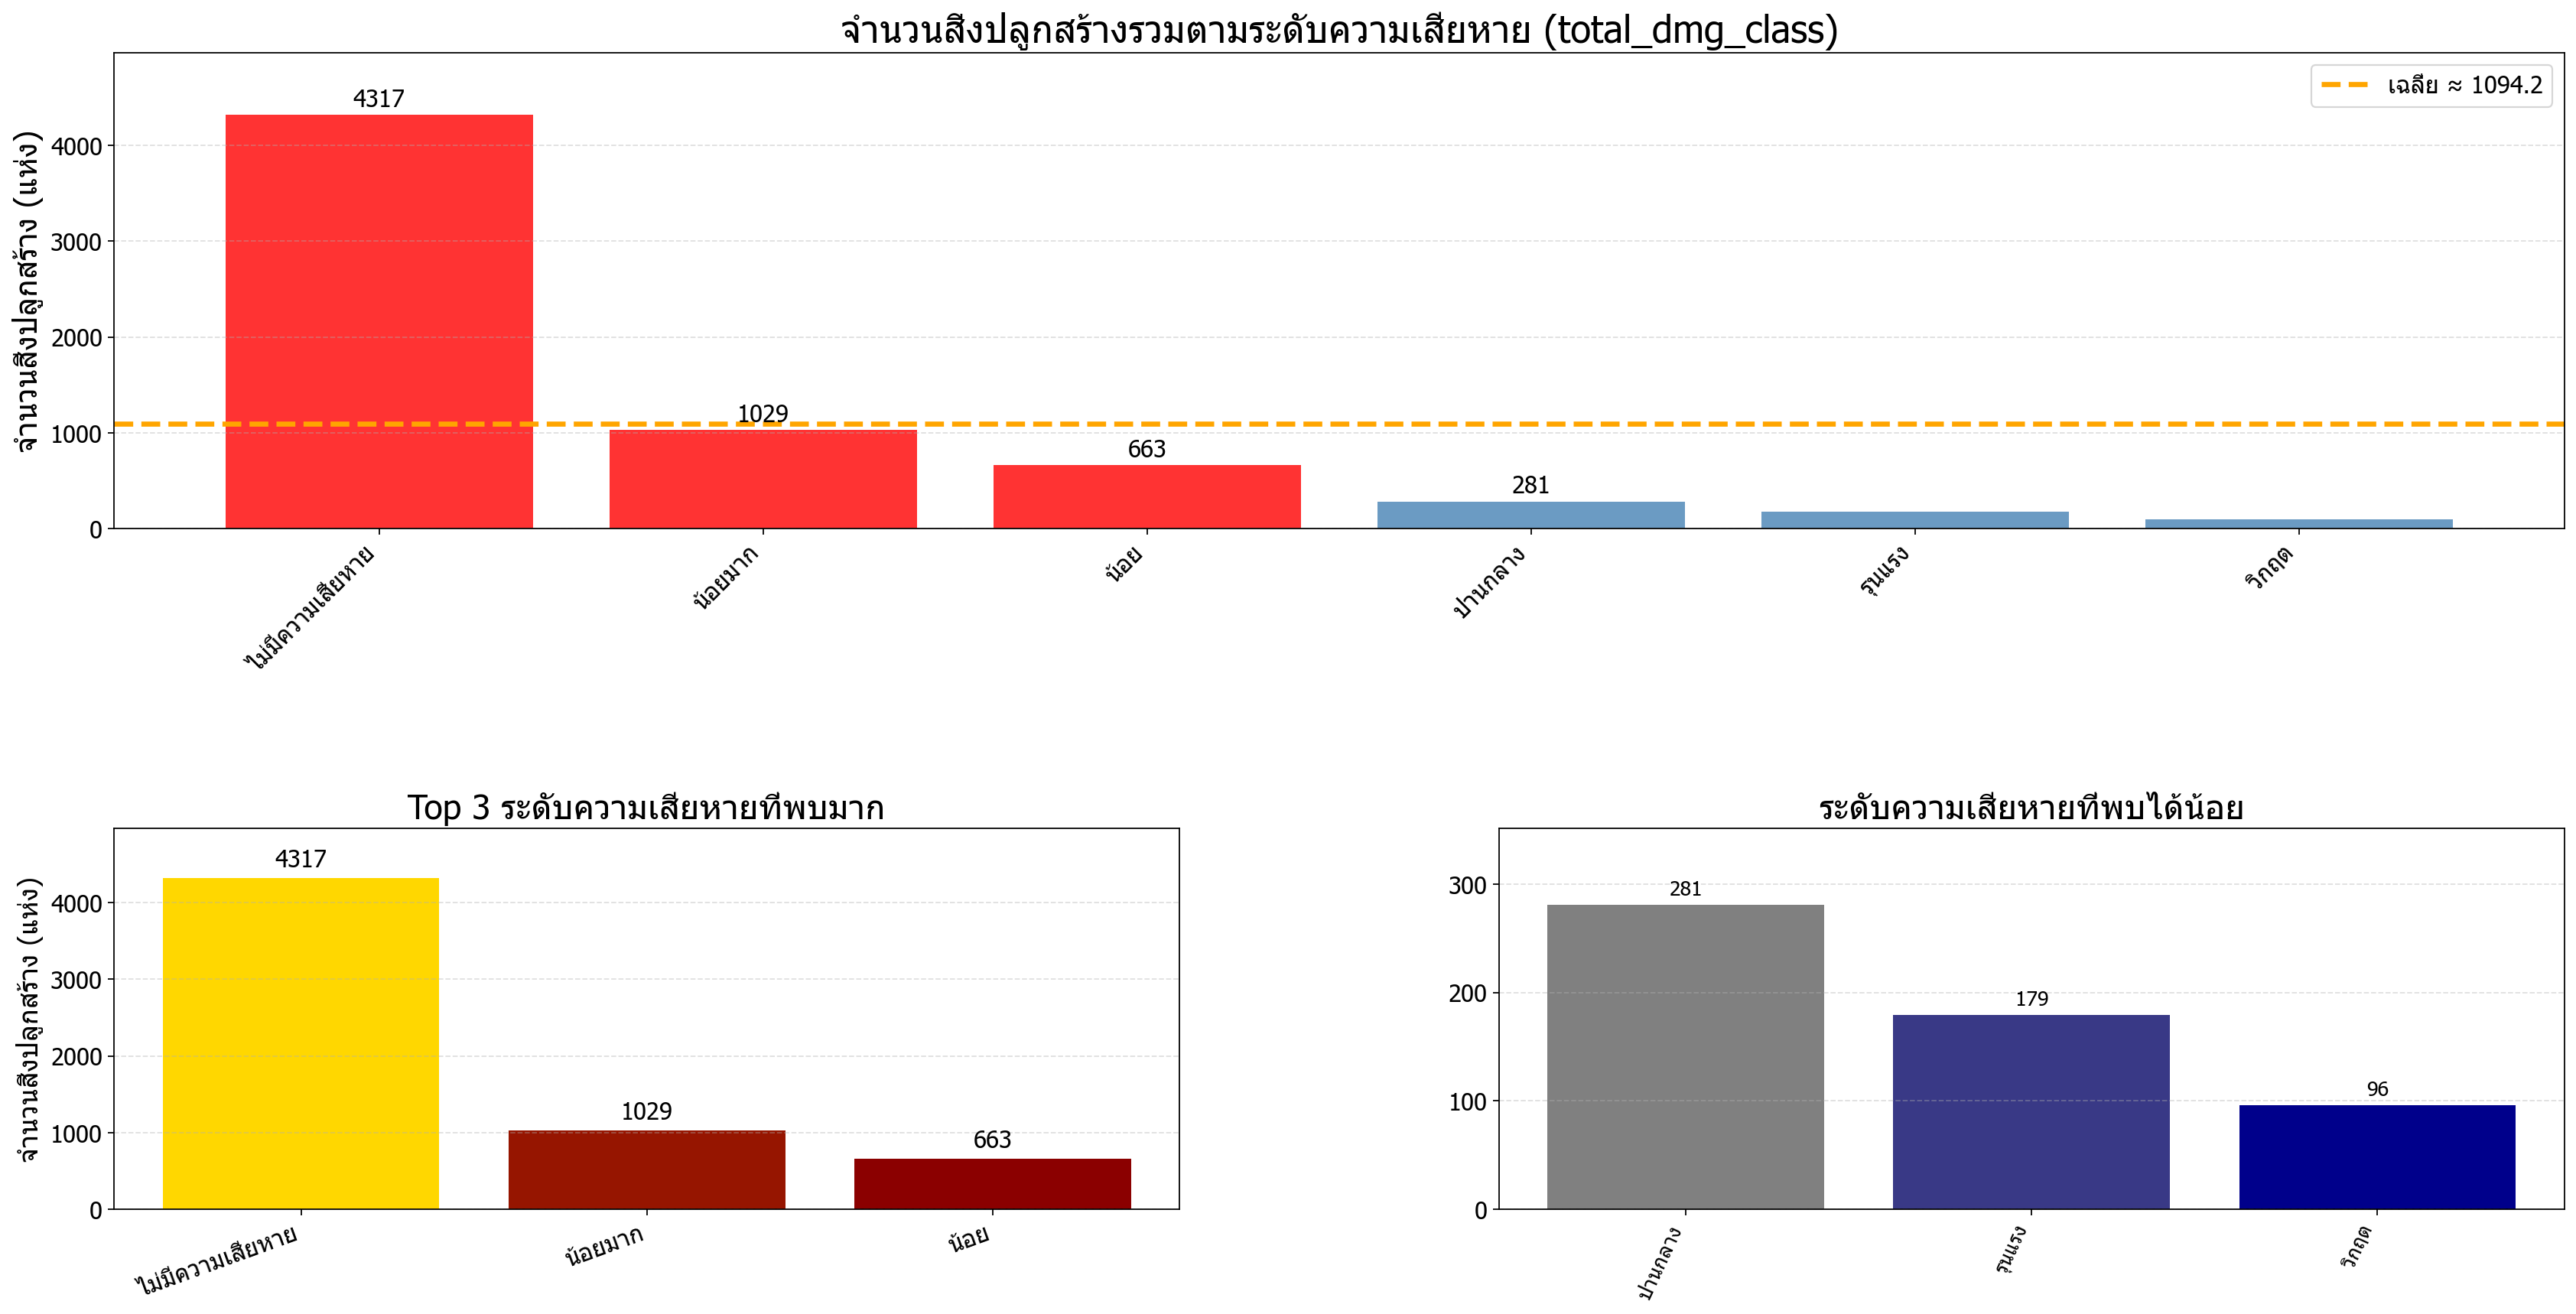

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib import rcParams

rcParams['font.family'] = 'Tahoma'

# ===== 1) เตรียมข้อมูล =====
count_by_cls = df['total_dmg_class'].value_counts()
top3_cls = count_by_cls.head(3)                     # ✅ เปลี่ยนเป็น top 3
others_cls = count_by_cls.tail(len(count_by_cls)-3).sort_values(ascending=False)

colors_top = ['red' if c in top3_cls.index else 'steelblue' for c in count_by_cls.index]

avg_value = count_by_cls.mean()

# ===== 2) กำหนด colormap =====
cmap_top3 = mcolors.LinearSegmentedColormap.from_list("RedYellow", ["darkred", "gold"])
norm_top3 = mcolors.Normalize(vmin=top3_cls.min(), vmax=top3_cls.max())
colors_top3 = [cmap_top3(norm_top3(v)) for v in top3_cls.values]

cmap_others = mcolors.LinearSegmentedColormap.from_list("BlueGray", ["darkblue", "gray"])
norm_others = mcolors.Normalize(vmin=others_cls.min(), vmax=others_cls.max()) if len(others_cls)>0 else None
colors_others = [cmap_others(norm_others(v)) for v in others_cls.values] if len(others_cls)>0 else []

# ===== 3) Layout =====
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1.2], figure=fig)

# ===== กราฟบน (รวม) =====
ax_top = fig.add_subplot(gs[0, :])
bars_top = ax_top.bar(count_by_cls.index, count_by_cls.values, color=colors_top, alpha=0.8)

ax_top.set_ylim(0, count_by_cls.max() * 1.15)
ax_top.axhline(avg_value, color='orange', linestyle='--', linewidth=3, label=f"เฉลี่ย ≈ {avg_value:.1f}")
ax_top.legend(loc='upper right', fontsize=14, frameon=True)

ax_top.set_title("จำนวนสิ่งปลูกสร้างรวมตามระดับความเสียหาย (total_dmg_class)", fontsize=22)
ax_top.set_ylabel("จำนวนสิ่งปลูกสร้าง (แห่ง)", fontsize=18)
ax_top.set_xticks(range(len(count_by_cls.index)))
ax_top.set_xticklabels(count_by_cls.index, rotation=45, ha='right', fontsize=14)
ax_top.tick_params(axis='y', labelsize=14)
ax_top.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars_top:
    h = bar.get_height()
    if h > count_by_cls.max() * 0.05:
        ax_top.text(bar.get_x() + bar.get_width()/2,
                    h + count_by_cls.max()*0.01,
                    f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างซ้าย: Top 3 =====
ax1 = fig.add_subplot(gs[1, 0])
bars1 = ax1.bar(top3_cls.index, top3_cls.values, color=colors_top3)

ax1.set_ylim(0, top3_cls.max() * 1.15)
ax1.set_title("Top 3 ระดับความเสียหายที่พบมาก", fontsize=20)
ax1.set_ylabel("จำนวนสิ่งปลูกสร้าง (แห่ง)", fontsize=16)
ax1.set_xticks(range(len(top3_cls.index)))
ax1.set_xticklabels(top3_cls.index, rotation=20, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2,
             h + top3_cls.max()*0.02,
             f"{int(h)}", ha='center', va='bottom', fontsize=14)

# ===== ล่างขวา: Others =====
ax2 = fig.add_subplot(gs[1, 1])
bars2 = ax2.bar(others_cls.index, others_cls.values, color=colors_others)

ax2.set_ylim(0, others_cls.max() * 1.25 if len(others_cls)>0 else 1)
ax2.set_title("ระดับความเสียหายที่พบได้น้อย", fontsize=20)
ax2.set_xticks(range(len(others_cls.index)))
ax2.set_xticklabels(others_cls.index, rotation=65, ha='right', fontsize=12)
ax2.tick_params(axis='y', labelsize=14)
ax2.yaxis.grid(True, linestyle="--", alpha=0.4)

for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2,
             h + (others_cls.max()*0.02 if len(others_cls)>0 else 0.05),
             f"{int(h)}", ha='center', va='bottom', fontsize=12)

plt.subplots_adjust(left=0.07, right=0.98, top=0.98, hspace=0.7, wspace=0.3, bottom=0.35)
plt.savefig(r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\total_dmg_class_summary8.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors as mcolors

# === cross-tab ===
table = pd.crosstab(df['BLDG_T'], df['total_dmg_class'])

# === จัดลำดับคอลัมน์ (6 ระดับความเสียหาย) ===
order = ["วิกฤต", "รุนแรง", "ปานกลาง", "น้อย", "น้อยมาก", "ไม่มีความเสียหาย"]
table = table.reindex(columns=order, fill_value=0)

# === เพิ่ม Total คอลัมน์/แถว ===
table["Total"] = table.sum(axis=1)
table.loc["Total"] = table.sum()

# === รีเซ็ต index ===
table = table.rename_axis(None, axis=0).rename_axis(None, axis=1).reset_index()

# ----------------------------
#   เตรียมสีไล่อันดับทั่วกริด
# ----------------------------
body_rows = table.index[table.iloc[:, 0] != "Total"]
body_cols = order

sub = table.loc[body_rows, body_cols].astype(float)

ranks = sub.stack()
ranks = (-ranks).rank(method="min").astype(int).unstack()

flat = ranks.values.ravel()
unique_ranks = np.unique(flat[~np.isnan(flat)].astype(int))
K = len(unique_ranks) if len(unique_ranks) > 0 else 1

rank_to_idx = {r: i for i, r in enumerate(unique_ranks)}
cmap = cm.get_cmap("YlOrRd", K)
palette = [mcolors.to_hex(cmap(i)) for i in range(K)]

# mapping สี
colors_map = {}
for r in body_rows:
    for c in body_cols:
        rank_value = int(ranks.loc[r, c])
        idx = rank_to_idx[rank_value]
        colors_map[(r, c)] = palette[K - 1 - idx]  # อันดับ 1 = เข้มสุด

# ----------------------------
#   วาดด้วย matplotlib
# ----------------------------
fig, ax = plt.subplots(figsize=(12, len(table) * 0.5))

ax.axis("off")
ax.axis("tight")

# เตรียมตารางตัวเลขเป็น string
cell_text = table.astype(str).values.tolist()

# กำหนดสีสำหรับแต่ละ cell
cell_colours = []
for ridx in range(len(table)):
    row_colors = []
    for cidx, colname in enumerate(table.columns):
        if (ridx in body_rows) and (colname in body_cols):
            row_colors.append(colors_map[(ridx, colname)])
        else:
            row_colors.append("white")  # cell อื่น ๆ
    cell_colours.append(row_colors)

# สร้างตาราง
tbl = ax.table(
    cellText=cell_text,
    colLabels=table.columns,
    cellColours=cell_colours,
    loc="center",
    cellLoc="center"
)

# ปรับสไตล์ cell
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)

for (r, c), cell in tbl.get_celld().items():
    cell.set_edgecolor("black")
    # ขยายให้เป็นจัตุรัส
    cell.set_height(0.05)
    cell.set_width(0.1)
    if r == 0:  # หัวคอลัมน์
        cell.set_text_props(weight="bold", color="white")
        cell.set_facecolor("black")
    if c == 0:  # คอลัมน์แรก (ชื่ออาคาร)
        cell.set_text_props(ha="left")

plt.tight_layout()
plt.savefig(r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\cross_tab.jpg", dpi=600, bbox_inches="tight", pad_inches=0)

plt.close()

print("✅ บันทึกตารางเป็น cross_tab.jpg เรียบร้อยแล้ว")


✅ บันทึกตารางเป็น cross_tab.jpg เรียบร้อยแล้ว


In [231]:
# -*- coding: utf-8 -*-
import warnings; warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, GeometryCollection

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped_joined_GEOM_ONLY.shp"
out_img  = r"C:\Users\piriy\Desktop\map_static.jpg"   # เปลี่ยนพาธได้

# ===== Helper: อ่าน shapefile ภาษาไทย =====
def read_thai_shp(path, encodings=("utf-8","utf-8-sig","tis-620","cp874")):
    last = None
    for enc in encodings:
        try:
            return gpd.read_file(path, encoding=enc)
        except Exception as e:
            last = e
    raise last

# อ่าน + ให้เป็น WGS84
gdf = read_thai_shp(shp_path)
gdf = gdf.to_crs(epsg=4326) if gdf.crs else gdf.set_crs(epsg=4326)

# ===== คอลัมน์ความเสียหาย =====
COL_DMG = "total_dm_2"
if COL_DMG not in gdf.columns:
    raise KeyError(f"ไม่พบคอลัมน์ '{COL_DMG}'")

# ===== โทนสีเดิม (priority=5 เข้มสุด → 1 อ่อนกว่า) =====
priority_colors = {5:"#8E0000", 4:"#E53935", 3:"#FF8F00", 2:"#FFCA28", 1:"#FFE082"}
priority_map_label = {"วิกฤต":5, "รุนแรง":4, "ปานกลาง":3, "น้อย":2, "น้อยมาก":1}

def to_priority(v):
    s = str(v).strip()
    if s in priority_map_label: return priority_map_label[s]
    try:
        iv = int(float(s))
        if 1 <= iv <= 5: return iv
    except:
        pass
    return np.nan

# ===== ค่าประมาณชั้น/ความสูง/บัฟเฟอร์ (ใช้ตรรกะเดียวกับเวอร์ชัน Folium) =====
DEFAULT_FLOORS = {
    "apartment":8,"bank":2,"bridge":1,"building":3,"condo":20,"factory":2,
    "government office":5,"hospital":8,"hotel":10,"house":2,"office building":12,
    "other":1,"school":3,"supermarket":1,"temple":3
}
FLOORS_FALLBACK = 3
METERS_PER_FLOOR = 3.2
BASE_MULTIPLIER = 2.0
TYPE_MULTIPLIER = {
    "condo":2.5,"apartment":2.3,"office building":2.3,"hospital":2.5,
    "school":2.3,"hotel":2.3,"temple":2.2,"government office":2.2
}

if "BLDG_T" not in gdf.columns:
    raise KeyError("ไม่พบคอลัมน์ 'BLDG_T'")

bldg_lower = gdf["BLDG_T"].astype(str).str.strip().str.lower()
floors_col = "floors" if "floors" in gdf.columns else None

def _coalesce_floors(row):
    bt = str(row["__bldg_lower__"])
    default_f = DEFAULT_FLOORS.get(bt, FLOORS_FALLBACK)
    if floors_col and pd.notna(row[floors_col]):
        try:
            v = float(row[floors_col])
            if v > 0: return int(round(v))
        except:
            pass
    return default_f

gdf = gdf.copy()
gdf["__bldg_lower__"] = bldg_lower
gdf["floors_used"] = gdf.apply(_coalesce_floors, axis=1).astype(int)
gdf["est_height_m"] = gdf["floors_used"] * METERS_PER_FLOOR
gdf["safety_k"] = gdf["__bldg_lower__"].map(TYPE_MULTIPLIER).fillna(BASE_MULTIPLIER)
gdf["buffer_m"] = gdf["est_height_m"] * gdf["safety_k"]

# ===== ทำ buffer ใน UTM (เมตร) แล้วกลับ WGS84 =====
gdf_utm = gdf.to_crs(epsg=32647)
gdf_utm["buffer_geom"] = gdf_utm.geometry.buffer(gdf_utm["buffer_m"])

buffers = (
    gdf_utm[["buffer_geom","BLDG_T","floors_used","est_height_m","safety_k","buffer_m",COL_DMG]]
      .set_geometry("buffer_geom")
      .to_crs(epsg=4326)
).rename(columns={"buffer_geom":"geometry"}).set_geometry("geometry")

# ใส่ priority (ไม่ตัดซ้อน)
bufp = buffers.copy()
bufp["priority"] = bufp[COL_DMG].apply(to_priority)
bufp = bufp.dropna(subset=["priority"]).copy()
bufp["priority"] = bufp["priority"].astype(int)

# ===== คอนฟิกคอนทัวร์เนียน (ปรับได้) =====
LEVELS = 16       # จำนวนชั้นยิ่งมากยิ่งเนียน
STEP_M  = 40      # ระยะหดเข้าแต่ละชั้น (เมตร)
OP_MIN  = 0.10    # ทึบชั้นนอกสุด
OP_MAX  = 0.60    # ทึบชั้นในสุด (กลาง)

# dissolve เป็นรูปทรงเดียวต่อ priority เพื่อได้วงแหวนลื่นสวย
diss = bufp.dissolve(by="priority", as_index=False, aggfunc="first")[["priority","geometry"]]

# ===== เตรียม Figure =====
fig, ax = plt.subplots(figsize=(9, 10), dpi=200)  # ปรับขนาด/ความละเอียดได้
ax.set_aspect('equal')
ax.set_axis_off()

# วาดจาก priority ต่ำ → สูง จะได้เห็นสีเข้มทับด้านบนเล็กน้อย (ดูมีมิติ)
for p in sorted(diss["priority"].unique()):
    geom = diss.loc[diss["priority"]==p, "geometry"].values[0]
    if geom is None or geom.is_empty:
        continue

    # ทำวงแหวนใน UTM แล้วกลับมา WGS84 เพื่อ plot
    geom_utm = gpd.GeoSeries([geom], crs="EPSG:4326").to_crs(epsg=32647)[0]
    base_color = priority_colors.get(int(p), "#999999")

    # ไล่จากนอก → ใน เพิ่ม alpha ทีละน้อยให้เนียน
    for i in range(LEVELS):
        dist = -i * STEP_M
        try:
            gi = geom_utm.buffer(dist)
        except Exception:
            continue
        if gi is None or gi.is_empty:
            break

        ring = gpd.GeoDataFrame([{"geometry": gi}], geometry="geometry", crs="EPSG:32647").to_crs(epsg=4326)
        alpha = OP_MIN + (OP_MAX - OP_MIN) * (i / max(1, LEVELS - 1))

        # ไม่มีเส้นขอบ (edgecolor="none") เพื่อลุคเนียน
        ring.plot(ax=ax, color=base_color, alpha=alpha, linewidth=0, edgecolor="none")

# ===== จัดมุมมอง + บันทึกไฟล์ =====
# ครอบ bounds ตามข้อมูล input
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.tight_layout(pad=0)
plt.savefig(out_img, dpi=600, bbox_inches="tight", pad_inches=0, facecolor="white")
plt.close(fig)

print(f"บันทึกแล้ว: {out_img}")


บันทึกแล้ว: C:\Users\piriy\Desktop\map_static.jpg


In [345]:
# -*- coding: utf-8 -*-
import warnings; warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import numpy as np
import re
from shapely.ops import unary_union

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped_joined_GEOM_ONLY.shp"
dist_shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: อ่าน shapefile ภาษาไทย =====
def read_thai_shp(path, encodings=("utf-8","utf-8-sig","tis-620","cp874")):
    last = None
    for enc in encodings:
        try:
            return gpd.read_file(path, encoding=enc)
        except Exception as e:
            last = e
    raise last

# ===== ฟังก์ชันล้าง/แก้ชื่อเขต =====
def clean_district_name(s: str) -> str:
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)  # ตัดคำว่า "เขต" นำหน้า
    # แก้เคสสะกดเพี้ยน/ถูกตัด
    fixes = {
        "ป้อมปราบศัต": "ป้อมปราบศัตรูพ่าย",
        "ป้อมปราบศัตรูพา": "ป้อมปราบศัตรูพ่าย",
        "ป้อมปราบศัตรูพา่ย": "ป้อมปราบศัตรูพ่าย",
    }
    return fixes.get(s, s)

# ===== Load data =====
gdf = read_thai_shp(shp_path)
gdf = gdf.to_crs(epsg=4326) if gdf.crs else gdf.set_crs(epsg=4326)

# ===== Damage column =====
COL_DMG = "total_dm_2"
if COL_DMG not in gdf.columns:
    raise KeyError(f"ไม่พบคอลัมน์ '{COL_DMG}'")

# ===== Default floors / multipliers =====
DEFAULT_FLOORS = {
    "apartment": 8, "bank": 2, "bridge": 1, "building": 3, "condo": 20,
    "factory": 2, "government office": 5, "hospital": 8, "hotel": 10,
    "house": 2, "office building": 12, "other": 1, "school": 3,
    "supermarket": 1, "temple": 3,
}
FLOORS_FALLBACK = 3
METERS_PER_FLOOR = 3.2

BASE_MULTIPLIER = 2.0
TYPE_MULTIPLIER = {
    "condo": 2.5, "apartment": 2.3, "office building": 2.3,
    "hospital": 2.5, "school": 2.3, "hotel": 2.3,
    "temple": 2.2, "government office": 2.2,
}

if "BLDG_T" not in gdf.columns:
    raise KeyError("ไม่พบคอลัมน์ 'BLDG_T'")

bldg_lower = gdf["BLDG_T"].astype(str).str.strip().str.lower()
floors_col = "floors" if "floors" in gdf.columns else None

def _coalesce_floors(row):
    bt = str(row["__bldg_lower__"])
    default_f = DEFAULT_FLOORS.get(bt, FLOORS_FALLBACK)
    if floors_col and pd.notna(row[floors_col]):
        try:
            v = float(row[floors_col])
            if v > 0: return int(round(v))
        except:
            pass
    return default_f

gdf = gdf.copy()
gdf["__bldg_lower__"] = bldg_lower
gdf["floors_used"] = gdf.apply(_coalesce_floors, axis=1).astype(int)
gdf["est_height_m"] = gdf["floors_used"] * METERS_PER_FLOOR
gdf["safety_k"] = gdf["__bldg_lower__"].map(TYPE_MULTIPLIER).fillna(BASE_MULTIPLIER)
gdf["buffer_m"] = gdf["est_height_m"] * gdf["safety_k"]

# ===== Buffer =====
gdf_utm = gdf.to_crs(epsg=32647)
gdf_utm["buffer_geom"] = gdf_utm.geometry.buffer(gdf_utm["buffer_m"])

buffers = (
    gdf_utm[["buffer_geom","BLDG_T","floors_used","est_height_m","safety_k","buffer_m",COL_DMG]]
      .set_geometry("buffer_geom")
      .to_crs(epsg=4326)
)
buffers = buffers.rename(columns={"buffer_geom": "geometry"}).set_geometry("geometry")

# ===== Priority dissolve =====
priority_map_label = {"วิกฤต":5, "รุนแรง":4, "ปานกลาง":3, "น้อย":2, "น้อยมาก":1}
def to_priority(v):
    s = str(v).strip()
    if s in priority_map_label:
        return priority_map_label[s]
    try:
        iv = int(float(s))
        if 1 <= iv <= 5: return iv
    except:
        pass
    return np.nan

buffers_pri = buffers.copy()
buffers_pri["priority"] = buffers_pri[COL_DMG].apply(to_priority)
buffers_pri = buffers_pri.dropna(subset=["priority"]).copy()
buffers_pri["priority"] = buffers_pri["priority"].astype(int)

dissolved = (
    buffers_pri
    .dissolve(by="priority", as_index=False, aggfunc="first")
    [["priority","geometry"]]
)
dissolved = dissolved.sort_values("priority", ascending=False).reset_index(drop=True)

taken = None
out_rows = []
for _, row in dissolved.iterrows():
    geom = row["geometry"]
    if geom is None or geom.is_empty: continue
    if taken is not None and not taken.is_empty:
        try:
            geom = geom.difference(taken)
        except Exception:
            pass
    if geom is None or geom.is_empty: continue
    out_rows.append({"priority": int(row["priority"]), "geometry": geom})
    taken = geom if taken is None else unary_union([taken, geom])

merged_gdf = gpd.GeoDataFrame(out_rows, geometry="geometry", crs="EPSG:4326")

# ===== District overlay =====
dist = read_thai_shp(dist_shp_path)
dist = dist.to_crs(epsg=4326) if dist.crs else dist.set_crs(epsg=4326)

# ทำความสะอาดชื่อเขตในชั้นเขต (กันไว้หากต้องใช้ภายหลัง)
if "DISTRICT_N" in dist.columns:
    dist["DISTRICT_N"] = dist["DISTRICT_N"].astype(str).map(clean_district_name)

dist_utm   = dist.to_crs(epsg=32647)[["DISTRICT_N","geometry"]].copy()
merged_utm = merged_gdf.to_crs(epsg=32647)[["priority","geometry"]].copy()

dist_utm["geometry"]   = dist_utm.buffer(0)
merged_utm["geometry"] = merged_utm.buffer(0)

try:
    inter = gpd.overlay(dist_utm, merged_utm, how="intersection", keep_geom_type=True)
except Exception:
    inter = gpd.overlay(dist_utm, merged_utm, how="intersection")

if inter.empty:
    area_pivot = pd.DataFrame(columns=["DISTRICT_N","p5_m2","p4_m2","p3_m2","p2_m2","p1_m2","total_m2"])
else:
    inter["area_m2"] = inter.geometry.area
    area_tbl = inter.groupby(["DISTRICT_N","priority"], as_index=False)["area_m2"].sum()
    pr_cols = [5,4,3,2,1]
    area_pivot = (
        area_tbl.pivot_table(index="DISTRICT_N", columns="priority", values="area_m2",
                             aggfunc="sum", fill_value=0)
                 .reindex(columns=pr_cols, fill_value=0)
                 .rename(columns={5:"p5_m2",4:"p4_m2",3:"p3_m2",2:"p2_m2",1:"p1_m2"})
                 .reset_index()
    )
    area_pivot["total_m2"] = area_pivot[["p5_m2","p4_m2","p3_m2","p2_m2","p1_m2"]].sum(axis=1)

# ===== Add Shape_Area and % =====
district_area_m2 = {
    "คลองสาน": 5967813.35,"ธนบุรี":8129089.74,"ห้วยขวาง":16282278.40,"บางซื่อ":12926994.85,
    "ยานนาวา":12458840.30,"ภาษีเจริญ":19038997.80,"ราชเทวี":7176491.48,"บางพลัด":11818996.08,
    "วัฒนา":12951358.45,"พญาไท":9256707.26,"คลองเตย":13395850.11,"ดินแดง":8447460.18,
    "ปทุมวัน":8046091.20,"บางรัก":4006288.92,"บางบอน":34125349.08,"จตุจักร":32543975.49,
    "สัมพันธวงศ์":1420221.35,"สวนหลวง":24354050.34,"บางแค":47848535.39,"สายไหม":43476984.87,
    "ดอนเมือง":36956389.63,"จอมทอง":22147127.08,"บางกะปิ":27575782.83,"พระโขนง":13175609.28,
    "ลาดกระบัง":128358416.93,"บางกอกใหญ่":6289603.77,"บางกอกน้อย":12347899.42,"สาทร":7225261.69,
    "บางคอแหลม":8597190.28,"บางนา":19031254.87,"หลักสี่":22761904.77,"วังทองหลาง":17079674.32,
    "พระนคร":5377063.36,"ตลิ่งชัน":35631286.19,"หนองจอก":238394891.39,"คลองสามวา":115002594.52,
    "ทวีวัฒนา":50110520.26,"ประเวศ":53886702.71,"ราษฎร์บูรณะ":12583940.67,"บางเขน":40791981.63,
    "ป้อมปราบศัตรูพ่าย":2497818.10,"ดุสิต":11344212.37,"บางขุนเทียน":129682959.56,"ลาดพร้าว":21337338.18,
    "บึงกุ่ม":23400020.21,"คันนายาว":25514583.40,"สะพานสูง":27979997.24,"ทุ่งครุ":32208149.33,
    "มีนบุรี":59962935.87,"หนองแขม":36416084.28,
}

area_full_df = pd.DataFrame(list(district_area_m2.items()), columns=["DISTRICT_N","district_area_m2"])

# ล้างชื่อเขตทั้งสองฝั่งให้ตรงกันก่อน merge
area_pivot["DISTRICT_N"] = area_pivot["DISTRICT_N"].astype(str).map(clean_district_name)
area_full_df["DISTRICT_N"] = area_full_df["DISTRICT_N"].astype(str).map(clean_district_name)

area_join = area_pivot.merge(area_full_df, on="DISTRICT_N", how="left")

for col in ["p5_m2","p4_m2","p3_m2","p2_m2","p1_m2","total_m2"]:
    pct_col = col.replace("_m2","_pct")
    area_join[pct_col] = (area_join[col] / area_join["district_area_m2"]) * 100

area_join["uncovered_m2"]  = (area_join["district_area_m2"] - area_join["total_m2"]).clip(lower=0)
area_join["uncovered_pct"] = (area_join["uncovered_m2"] / area_join["district_area_m2"]) * 100

# แจ้งเตือนเขตที่ยังจับคู่พื้นที่เต็มไม่ได้ (ถ้ามี)
missing = sorted(area_join.loc[area_join["district_area_m2"].isna(), "DISTRICT_N"].unique())
if missing:
    print("⚠️ เขตที่ยังไม่มีค่า Shape_Area (ตรวจสะกด/ชื่อ):", ", ".join(missing))

# ===== Show table =====
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("\n📊 ตารางพื้นที่รวมรายเขต + Shape_Area และสัดส่วน (%)")
display(area_join.head(50))

# ===== Export Excel (ถ้าต้องการให้เซฟไฟล์ ให้ uncomment 3 บรรทัดนี้) =====
# out_path = r"C:\Users\piriy\Desktop\district_priority_area_with_pct.xlsx"
# area_join.to_excel(out_path, index=False)
# print(f"✅ บันทึกไฟล์แล้ว: {out_path}")



📊 ตารางพื้นที่รวมรายเขต + Shape_Area และสัดส่วน (%)


DISTRICT_N        p5_m2        p4_m2        p3_m2        p2_m2  \
0             คลองสาน   615,244.99 1,447,648.13    34,022.25   222,561.93   
1           คลองสามวา     1,125.89     2,251.78     7,230.90   191,446.83   
2             คลองเตย   852,727.02 1,027,911.76   563,093.02   913,334.48   
3            คันนายาว         0.00         0.00   113,266.32   137,049.61   
4             จตุจักร 2,078,310.05   358,865.79   787,359.20 1,455,816.94   
5              จอมทอง    71,263.08   135,181.60   169,754.99   446,175.89   
6            ดอนเมือง         0.00   131,774.56     7,190.21    64,747.45   
7              ดินแดง   542,535.94   420,604.37   145,256.37   449,137.36   
8               ดุสิต         0.00         0.00   101,326.88   263,737.83   
9            ตลิ่งชัน         0.00     2,567.44     1,610.37   148,113.29   
10           ทวีวัฒนา     1,125.89     1,125.89     1,610.37   125,160.93   
11            ทุ่งครุ         0.00         0.00    12,509.97   194,993.49   
12             ธนบุรี 1,172,505.97   240,761.91    21,972.27   133,130.08   
13         บางกอกน้อย   101,458.45   129,141.71   188,785.19   339,387.36   
14         บางกอกใหญ่         0.00   120,172.20     3,344.64    13,206.02   
15            บางกะปิ     1,125.89   528,943.58   522,299.32   507,901.64   
16        บางขุนเทียน         0.00         0.00    52,639.95   228,979.27   
17          บางคอแหลม     2,870.57   389,864.54     2,172.83 1,174,049.00   
18            บางซื่อ   548,178.29   714,991.45   901,670.17   241,652.62   
19              บางนา         0.00   363,883.19   650,853.79   712,536.64   
20             บางบอน     2,024.26    87,921.53     1,125.89    37,815.21   
21            บางพลัด   272,719.86   394,687.77   449,342.68   186,603.35   
22             บางรัก   259,522.86   598,823.99   394,823.44   581,301.60   
23             บางเขน         0.00     1,125.89   338,390.29   254,216.92   
24              บางแค   123,646.84   138,459.30   248,323.99   194,770.83   
25            บึงกุ่ม         0.00         0.00     4,211.41   389,573.96   
26            ปทุมวัน   521,967.43   433,817.60    57,801.68   693,687.44   
27             ประเวศ         0.00     3,436.39   292,159.08   116,882.69   
28  ป้อมปราบศัตรูพ่าย         0.00         0.00       477.01    44,748.12   
29              พญาไท   168,478.15   999,432.38   213,369.46   783,837.00   
30             พระนคร         0.00     3,539.80   118,086.88    80,450.42   
31            พระโขนง   165,627.28   197,435.66   536,298.89   294,550.92   
32          ภาษีเจริญ   429,758.17   288,439.82   288,525.21    72,624.11   
33            มีนบุรี         0.00         0.00    90,453.66    22,819.28   
34            ยานนาวา 1,185,399.41   268,284.98   207,343.06   746,442.45   
35            ราชเทวี   717,529.62   592,370.54   736,607.61   443,414.60   
36        ราษฎร์บูรณะ         0.00     1,125.89     4,048.51   279,150.80   
37          ลาดกระบัง         0.00    86,795.64    62,047.28     7,474.79   
38           ลาดพร้าว         0.00         0.00   229,744.32   330,746.65   
39         วังทองหลาง       362.45    91,280.48   356,955.52   362,455.78   
40              วัฒนา 1,581,908.48 1,160,576.49 1,096,292.70 1,718,221.04   
41            สวนหลวง   235,302.63   776,442.96   431,964.18   539,133.29   
42           สะพานสูง         0.00         0.00    90,173.32     1,957.23   
43        สัมพันธวงศ์    51,698.69    68,898.21     2,131.63    39,851.85   
44               สาทร   131,790.60   328,207.39   141,899.21   746,303.09   
45             สายไหม    87,921.53     3,472.45     1,125.89   190,087.71   
46            หนองจอก         0.00     1,125.89     5,708.53    92,463.67   
47            หนองแขม         0.00         0.00     3,830.06   210,093.28   
48            หลักสี่         0.00    86,795.64   183,405.79   232,924.02   
49           ห้วยขวาง 1,238,469.77   979,360.89   688,871.81   245,308.52   

          p1_m2     total_m2  district_area_m2  p5_pct  p4_pct  p3_pct  \
0    456,

In [355]:
# ===== สร้างคอลัมน์ 'เขต' และคำนวณ 'พื้นที่ได้รับผลกระทบสูง (%)' =====
# - ใช้ DISTRICT_N ที่มีอยู่แล้วใน area_join
# - รวมเปอร์เซ็นต์ p5(วิกฤต) + p4(รุนแรง) เป็นคอลัมน์เดียว
# - ปัดทศนิยม 2 ตำแหน่ง

if "DISTRICT_N" not in area_join.columns:
    raise KeyError("ไม่พบคอลัมน์ DISTRICT_N ใน area_join")

# กันกรณีไม่มีคอลัมน์เปอร์เซ็นต์ (หากไม่ได้คำนวณก่อนหน้า)
for need_col in ["p5_pct", "p4_pct"]:
    if need_col not in area_join.columns:
        raise KeyError(f"ไม่พบคอลัมน์ '{need_col}' ใน area_join (ต้องมีจากขั้นตอนคำนวณ % ก่อนหน้า)")

final_df = pd.DataFrame({
    "เขต": area_join["DISTRICT_N"].astype(str),
    "พื้นที่ได้รับผลกระทบสูง (%)": (area_join["p5_pct"].fillna(0) + area_join["p4_pct"].fillna(0)).round(2)
})

# (ตัวเลือก) เรียงจากมาก -> น้อย เพื่อดูเขตที่ได้รับผลกระทบสูงก่อน
final_df = final_df.sort_values("พื้นที่ได้รับผลกระทบสูง (%)", ascending=False).reset_index(drop=True)

# ===== แสดงผล =====
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("\n📊 เขต และ พื้นที่ได้รับผลกระทบสูง (%)")
display(final_df.head(50))

# ===== Export Excel (เอา # ออกถ้าต้องการบันทึกไฟล์) =====
# out_path = r"C:\Users\piriy\Desktop\district_high_impact_only.xlsx"
# final_df.to_excel(out_path, index=False)
# print(f"✅ บันทึกไฟล์แล้ว: {out_path}")



📊 เขต และ พื้นที่ได้รับผลกระทบสูง (%)


เขต  พื้นที่ได้รับผลกระทบสูง (%)
0             คลองสาน                        34.57
1              บางรัก                        21.42
2               วัฒนา                        21.18
3             ราชเทวี                        18.25
4              ธนบุรี                        17.39
5             คลองเตย                        14.04
6            ห้วยขวาง                        13.62
7               พญาไท                        12.62
8             ปทุมวัน                        11.88
9             ยานนาวา                        11.67
10             ดินแดง                        11.40
11            บางซื่อ                         9.77
12        สัมพันธวงศ์                         8.49
13            จตุจักร                         7.49
14               สาทร                         6.37
15            บางพลัด                         5.65
16          บางคอแหลม                         4.57
17            สวนหลวง                         4.15
18          ภาษีเจริญ                         3.77
19            พระโขนง                         2.76
20            บางกะปิ                         1.92
21         บางกอกใหญ่                         1.91
22              บางนา                         1.91
23         บางกอกน้อย                         1.87
24             จอมทอง                         0.93
25              บางแค                         0.55
26         วังทองหลาง                         0.54
27            หลักสี่                         0.38
28           ดอนเมือง                         0.36
29             บางบอน                         0.26
30             สายไหม                         0.21
31          ลาดกระบัง                         0.07
32             พระนคร                         0.07
33           ตลิ่งชัน                         0.01
34             ประเวศ                         0.01
35        ราษฎร์บูรณะ                         0.01
36        บางขุนเทียน                         0.00
37           ทวีวัฒนา                         0.00
38           คันนายาว                         0.00
39          คลองสามวา                         0.00
40            ทุ่งครุ                         0.00
41              ดุสิต                         0.00
42            มีนบุรี                         0.00
43  ป้อมปราบศัตรูพ่าย                         0.00
44             บางเขน                         0.00
45            บึงกุ่ม                         0.00
46           ลาดพร้าว                         0.00
47           สะพานสูง                         0.00
48            หนองแขม                         0.00
49            หนองจอก                         0.00

✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\district_high_impact_dual.jpg


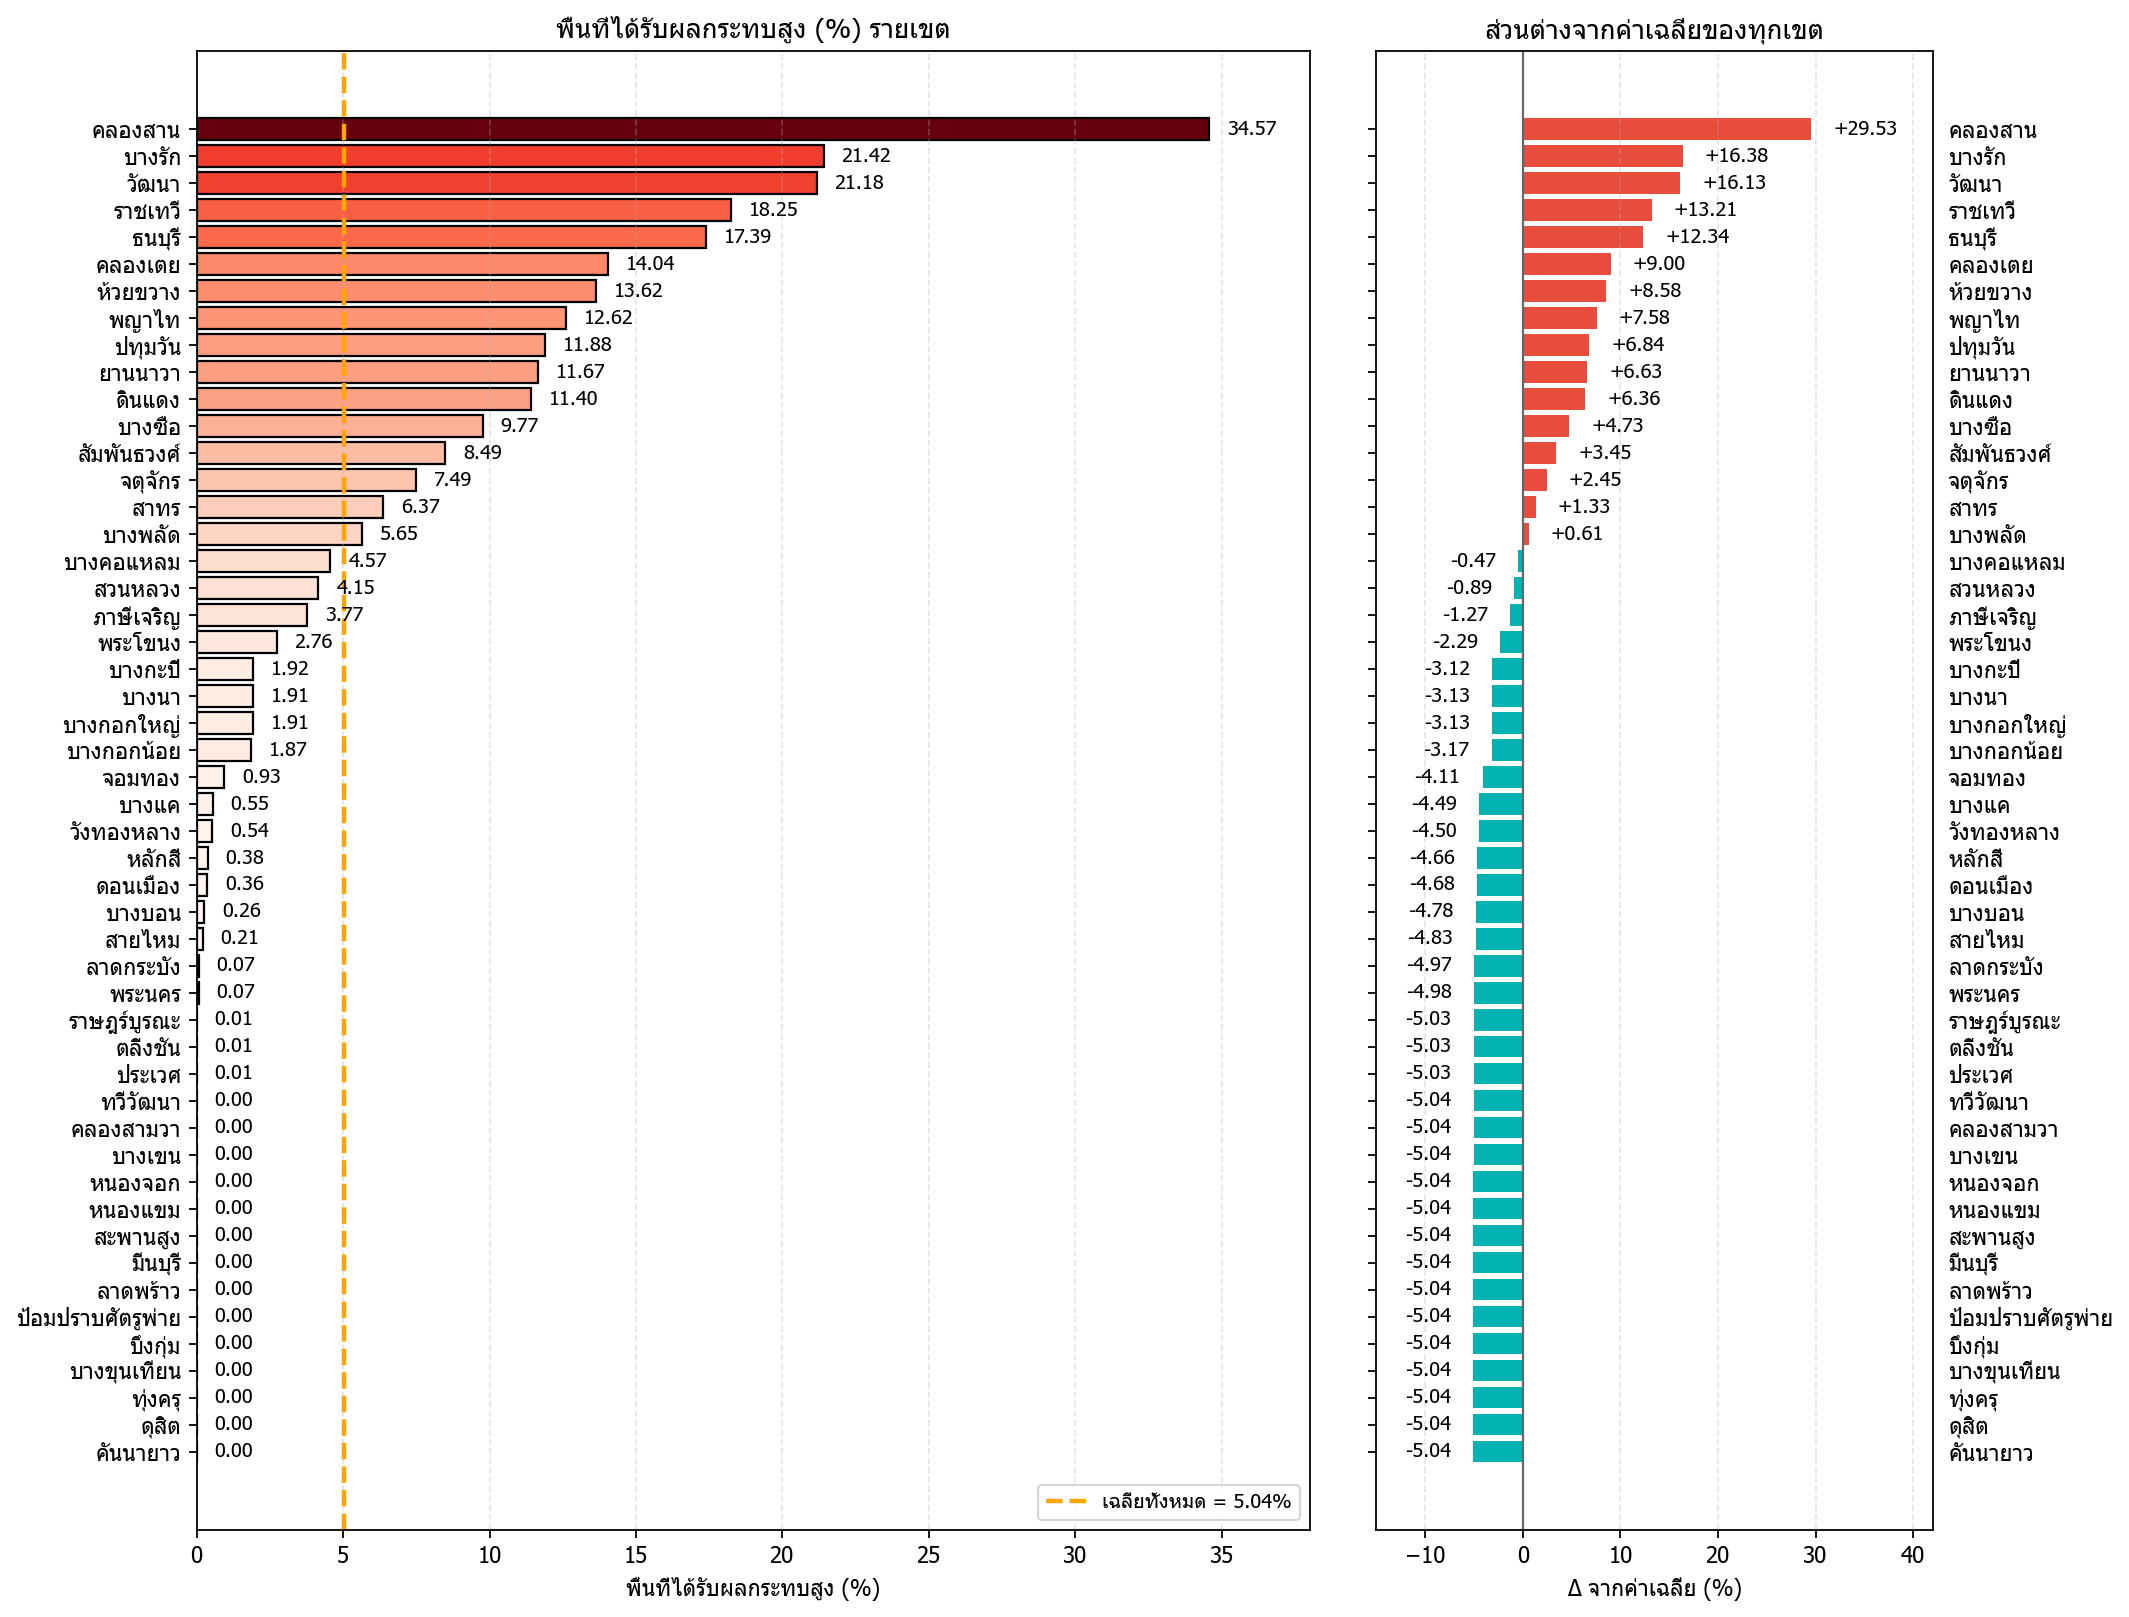

In [421]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ===== ฟอนต์และหน้ากระดาษ =====
rcParams['font.family'] = 'Tahoma'
rcParams['figure.dpi'] = 160

# ===== เตรียมข้อมูลจาก area_join =====
# พื้นที่ได้รับผลกระทบสูง (%) = p5_pct + p4_pct
if not {"DISTRICT_N", "p5_pct", "p4_pct"}.issubset(area_join.columns):
    raise KeyError("area_join ต้องมีคอลัมน์ DISTRICT_N, p5_pct, p4_pct")

df = pd.DataFrame({
    "เขต": area_join["DISTRICT_N"].astype(str),
    "high_impact_pct": (area_join["p5_pct"].fillna(0) + area_join["p4_pct"].fillna(0))
})

# ✅ เรียงจากน้อย → มาก (มากสุดอยู่บน)
df = df.sort_values("high_impact_pct", ascending=True).reset_index(drop=True)

# ค่าเฉลี่ย และ Δ
avg_val = df["high_impact_pct"].mean()
df["diff_from_avg"] = df["high_impact_pct"] - avg_val

# ===== วาดกราฟ =====
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[2, 1], wspace=0.08)

ax_left  = fig.add_subplot(gs[0, 0])
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_left)

ypos = np.arange(len(df))

# ---------- ซ้าย: พื้นที่ได้รับผลกระทบสูง (%) ----------
vals_left = df["high_impact_pct"].values

# ใช้ colormap Reds ไล่สีจากน้อย → มาก
norm = mcolors.Normalize(vmin=vals_left.min(), vmax=vals_left.max())
cmap = cm.get_cmap("Reds")

ax_left.barh(
    ypos, vals_left,
    color=cmap(norm(vals_left)),   # ✅ ไล่สีแดงตามค่า
    edgecolor="black", linewidth=1.0
)

ax_left.set_yticks(ypos, labels=df["เขต"])
ax_left.set_xlabel("พื้นที่ได้รับผลกระทบสูง (%)")
ax_left.set_title("พื้นที่ได้รับผลกระทบสูง (%) รายเขต", fontsize=12)
ax_left.grid(axis="x", linestyle="--", alpha=0.3)

# ✅ Fix scale 0–38
ax_left.set_xlim(0, 38)

# เส้นค่าเฉลี่ย (เส้นประสีส้ม)
ax_left.axvline(avg_val, color="orange", linestyle="--", linewidth=2,
                label=f"เฉลี่ยทั้งหมด = {avg_val:.2f}%")
ax_left.legend(loc="lower right", fontsize=9, frameon=True)

# ตัวเลขบนแท่ง
for i, v in enumerate(vals_left):
    if v > 37:
        ax_left.text(v - 0.6, i, f"{v:.2f}", va="center", ha="right", fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.75))
    else:
        ax_left.annotate(f"{v:.2f}", xy=(v, i), xytext=(8, 0),
                         textcoords="offset points", va="center", ha="left",
                         fontsize=9, clip_on=False)

# ---------- ขวา: Δ จากค่าเฉลี่ย ----------
diff = df["diff_from_avg"].values
colors = np.where(diff >= 0, "#e74c3c", "#03b3b3")  # บวก=แดง, ลบ=เขียว

ax_right.barh(ypos, diff, color=colors)
ax_right.axvline(0, color="#666", linewidth=1)

# ชื่อเขตด้านขวา
ax_right.set_yticks(ypos, labels=df["เขต"])
ax_right.tick_params(axis='y', which='both', labelleft=False, labelright=True)

ax_right.set_xlabel("Δ จากค่าเฉลี่ย (%)")
ax_right.set_title("ส่วนต่างจากค่าเฉลี่ยของทุกเขต", fontsize=12)
ax_right.grid(axis="x", linestyle="--", alpha=0.3)

# ✅ Fix scale -45 ถึง 45
ax_right.set_xlim(-15, 42)

# ตัวเลขฝั่งขวา
for i, v in enumerate(diff):
    txt = f"{v:+.2f}"
    dx = 10 if v >= 0 else -10
    ha = "left" if v >= 0 else "right"
    ax_right.annotate(txt, xy=(v, i), xytext=(dx, 0),
                      textcoords="offset points", ha=ha, va="center",
                      fontsize=9, clip_on=False)

plt.tight_layout()

# ===== Export =====
output_path = r"C:\Users\piriy\Desktop\district_high_impact_dual.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight", pad_inches=0.15)
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")

plt.show()


✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\5_4_pct_by_district.jpg


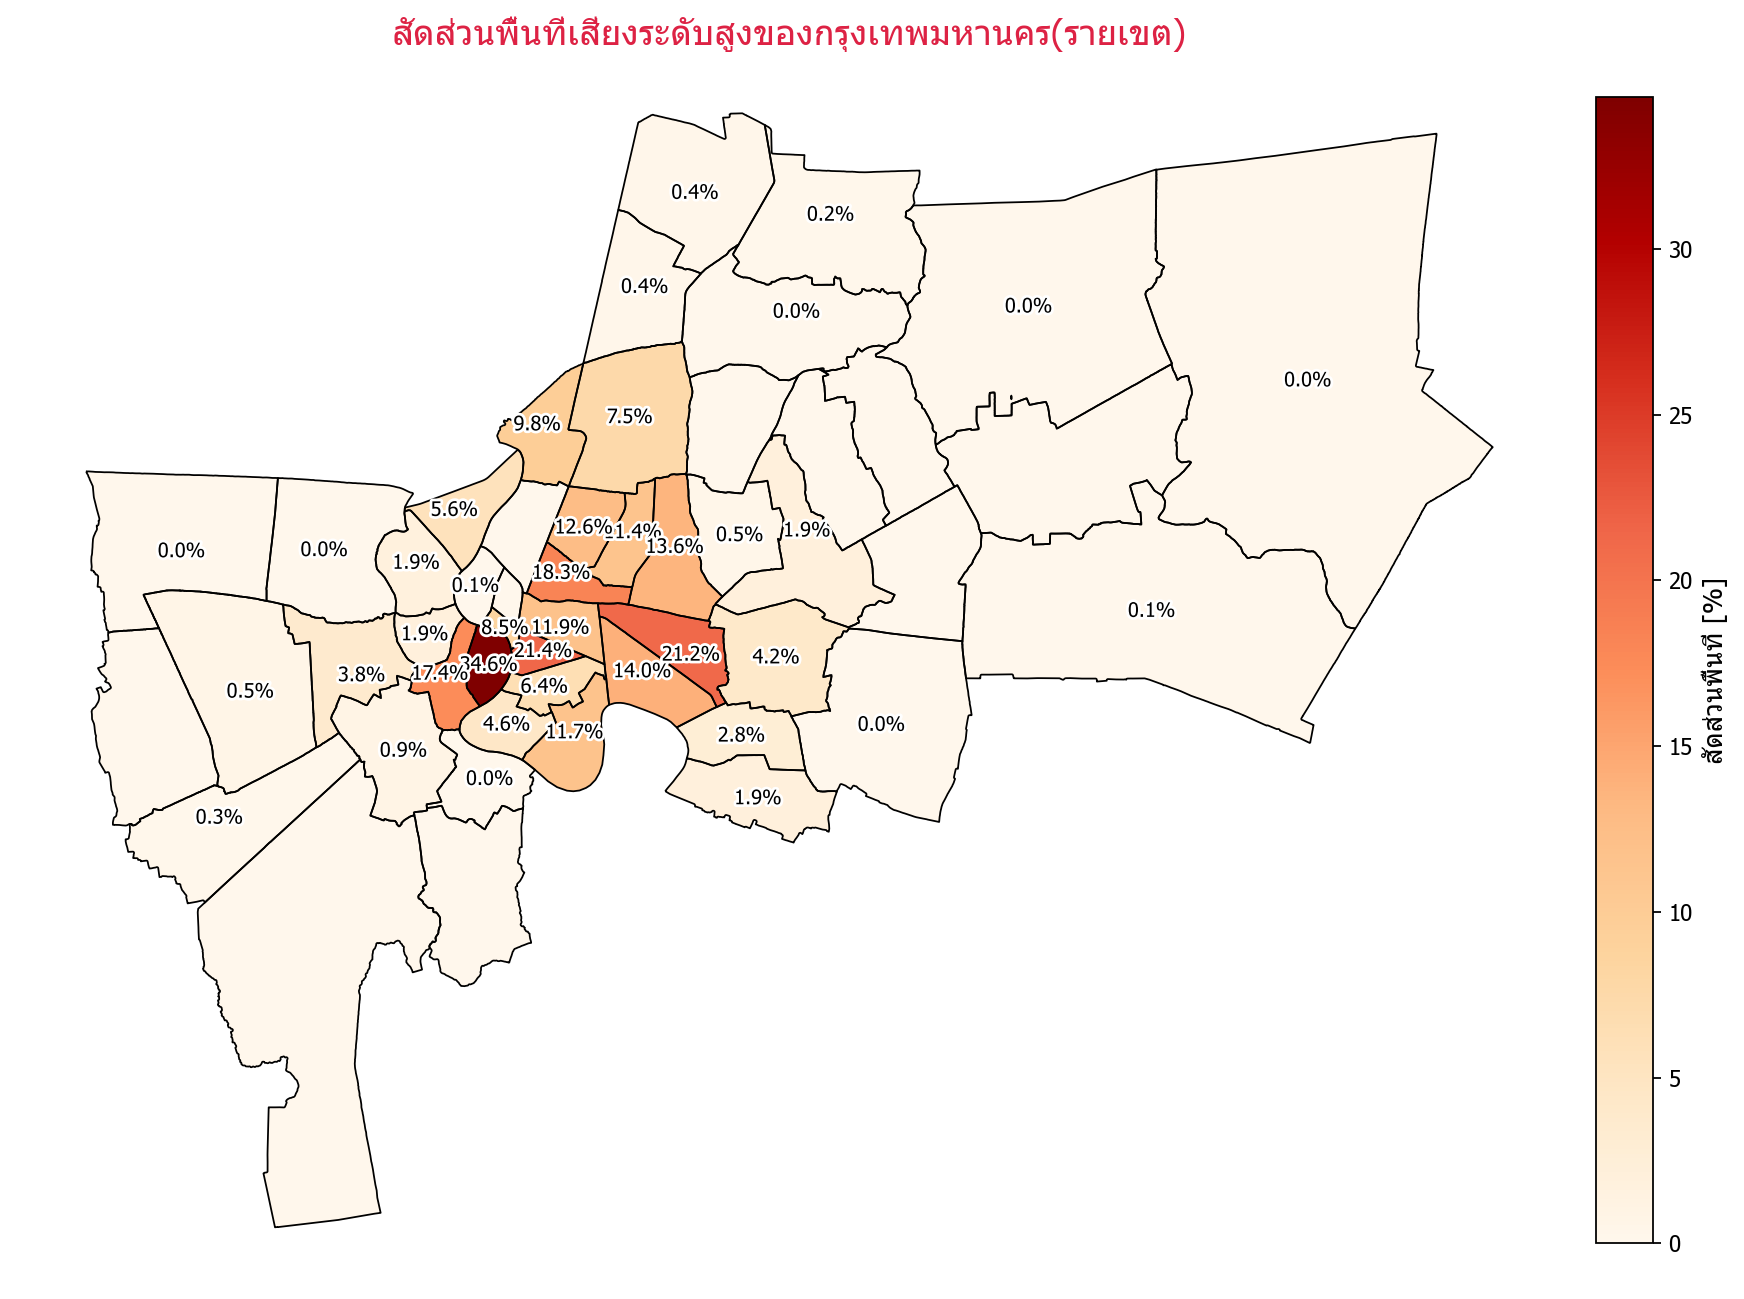

In [325]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import re
from shapely.geometry import Polygon, MultiPolygon, LineString

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: ล้างชื่อเขต =====
def normname(s):
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)  # ตัดคำว่า "เขต" นำหน้า
    return s

# ===== 1) อ่าน shapefile =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = gdf["DISTRICT_N"].map(normname)

# ===== 2) dissolve รวมแขวง → เขต =====
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")

# ปิดช่องแคบเล็ก ๆ
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M).buffer(0)

# ลบรูและเก็บชิ้นใหญ่สุด
def clean_polygon(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    elif isinstance(geom, MultiPolygon):
        polys = [Polygon(p.exterior) for p in geom.geoms if not p.is_empty]
        if not polys:
            return None
        largest = max(polys, key=lambda x: x.area)
        return Polygon(largest.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(clean_polygon)
dist = dist[dist.geometry.notna()].copy()

# กลับ WGS84
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge ค่าจาก area_join (ต้องมีตัวแปร area_join อยู่ก่อนแล้ว) =====
aj = area_join.copy()
aj["DISTRICT_N"] = aj["DISTRICT_N"].map(normname)
aj["p5p4_pct"] = aj[["p5_pct", "p4_pct"]].sum(axis=1)

gmap = dist_wgs.merge(aj[["DISTRICT_N","p5p4_pct"]], on="DISTRICT_N", how="left")
gmap["p5p4_pct"] = gmap["p5p4_pct"].fillna(0)

# ===== 4) สร้างเส้นขอบ (เฉพาะขอบนอก) =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls)
        line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot =====
vmin, vmax = gmap["p5p4_pct"].min(), gmap["p5p4_pct"].max()

# ✅ ใช้โทน OrRd (Orange–Red) คล้ายภาพตัวอย่าง
cmap = plt.cm.OrRd
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="p5p4_pct", cmap=cmap, linewidth=0, edgecolor="none", legend=False, ax=ax)
boundaries.plot(ax=ax, color="black", linewidth=0.8)


# ===== ใส่ label เฉพาะค่าที่ > 0 =====
gmap["label_point"] = gmap.representative_point()
for _, r in gmap.iterrows():
    if r["p5p4_pct"] > 0:
        ax.text(
            r["label_point"].x, r["label_point"].y,
            f'{r["p5p4_pct"]:.1f}%',   # แสดงเป็นเปอร์เซ็นต์ทศนิยม 1 ตำแหน่ง
            fontsize=9, ha="center", va="center", color="black",
            path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]
        )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("สัดส่วนพื้นที่ [%]", fontsize=12)

ax.set_title("สัดส่วนพื้นที่เสี่ยงระดับสูงของกรุงเทพมหานคร(รายเขต)", fontsize=16, color="#d24")
ax.set_axis_off()
plt.tight_layout()

output_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\5_4_pct_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")

plt.show()


✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\5_4_pct_by_district.jpg


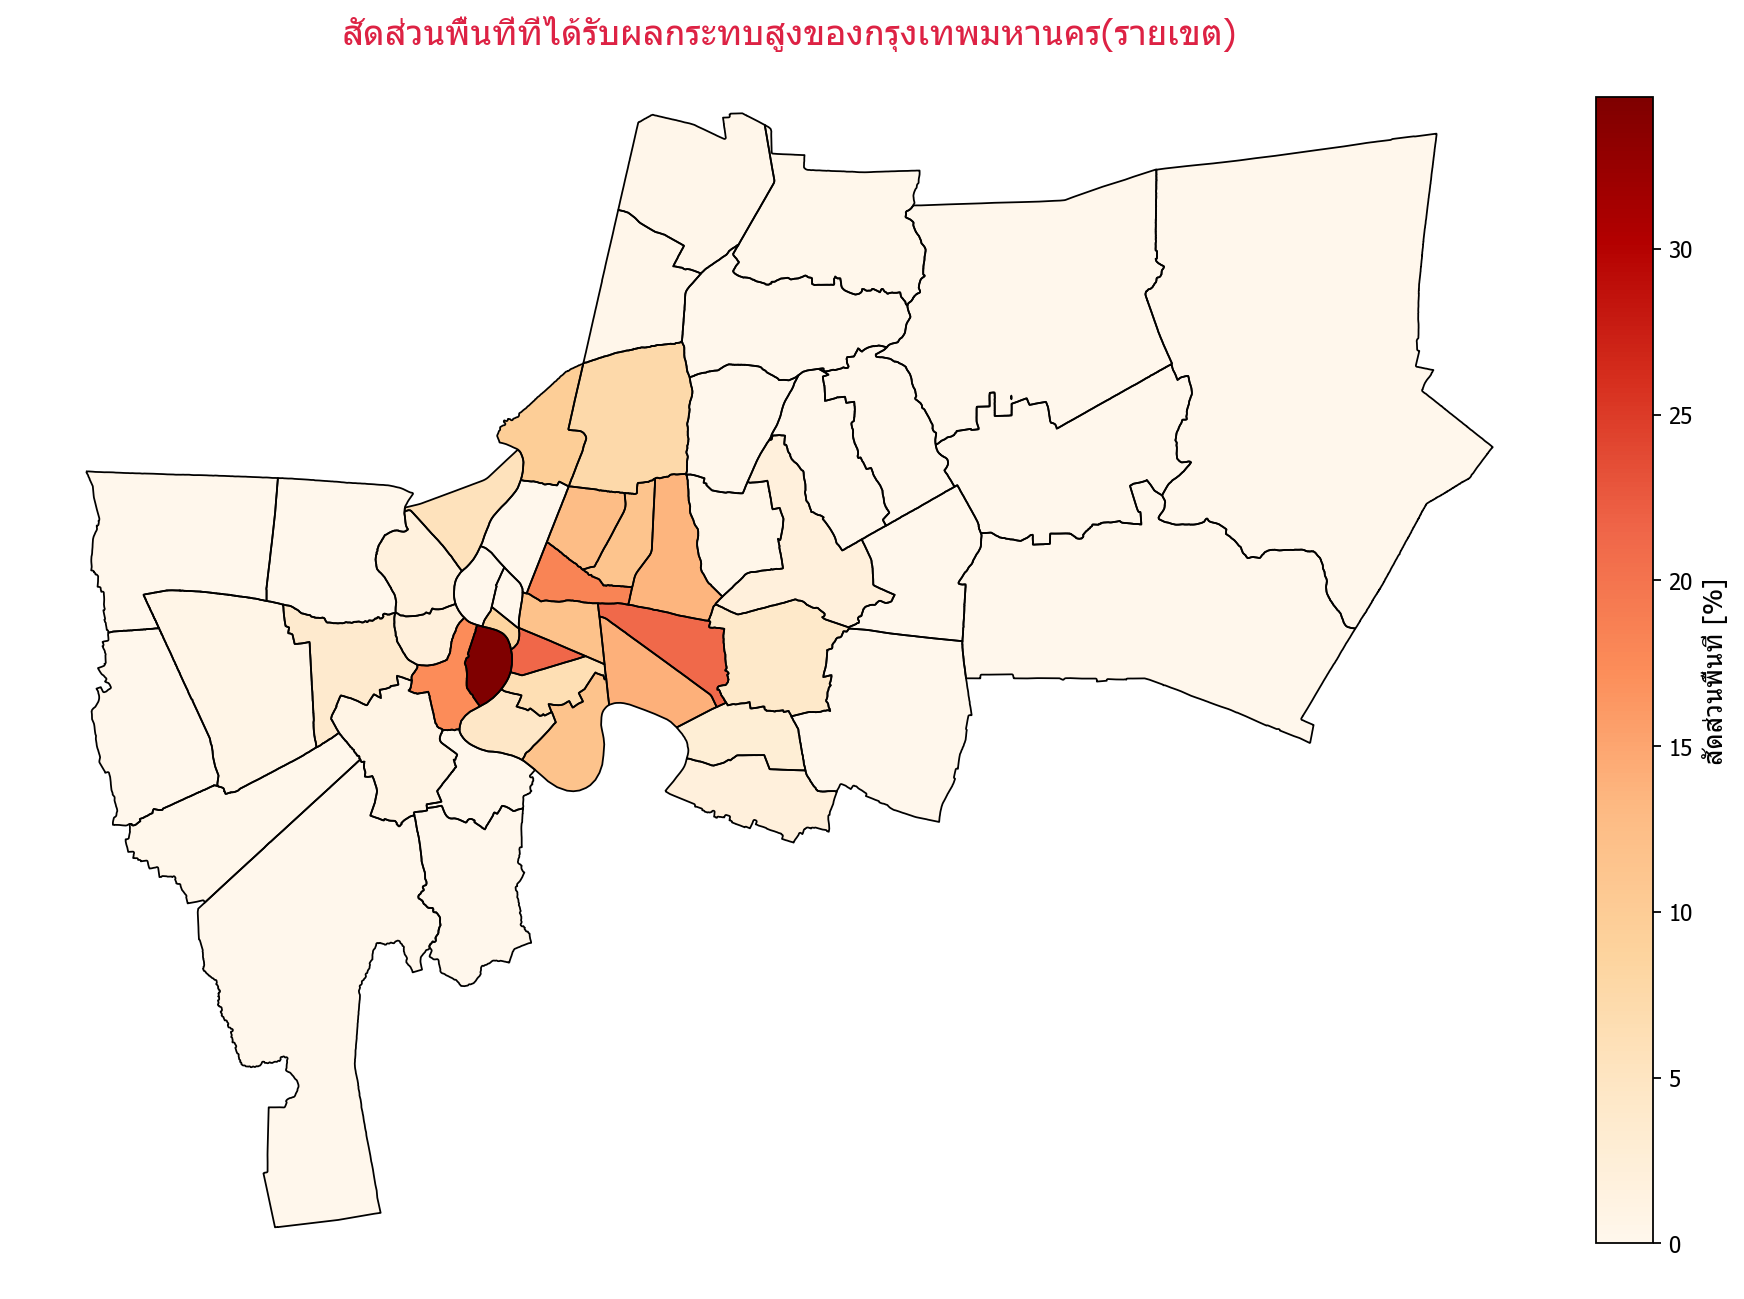

In [353]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import re
from shapely.geometry import Polygon, MultiPolygon, LineString

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: ล้างชื่อเขต =====
def normname(s):
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)  # ตัดคำว่า "เขต" นำหน้า
    return s

# ===== 1) อ่าน shapefile =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = gdf["DISTRICT_N"].map(normname)

# ===== 2) dissolve รวมแขวง → เขต =====
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")

# ปิดช่องแคบเล็ก ๆ
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M).buffer(0)

# ลบรูและเก็บชิ้นใหญ่สุด
def clean_polygon(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    elif isinstance(geom, MultiPolygon):
        polys = [Polygon(p.exterior) for p in geom.geoms if not p.is_empty]
        if not polys:
            return None
        largest = max(polys, key=lambda x: x.area)
        return Polygon(largest.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(clean_polygon)
dist = dist[dist.geometry.notna()].copy()

# กลับ WGS84
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge ค่าจาก area_join =====
aj = area_join.copy()
aj["DISTRICT_N"] = aj["DISTRICT_N"].map(normname)
aj["p5p4_pct"] = aj[["p5_pct", "p4_pct"]].sum(axis=1)

gmap = dist_wgs.merge(aj[["DISTRICT_N","p5p4_pct"]], on="DISTRICT_N", how="left")
gmap["p5p4_pct"] = gmap["p5p4_pct"].fillna(0)

# ===== 4) สร้างเส้นขอบ (เฉพาะขอบนอก) =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls)
        line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot =====
vmin, vmax = gmap["p5p4_pct"].min(), gmap["p5p4_pct"].max()

# ✅ ใช้โทน OrRd (Orange–Red)
cmap = plt.cm.OrRd
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="p5p4_pct", cmap=cmap, linewidth=0, edgecolor="none", legend=False, ax=ax)
boundaries.plot(ax=ax, color="black", linewidth=0.8)

# ==== (ลบ labels ออกจากแผนที่) ====
# ไม่คำนวณ label_point และไม่เรียก ax.text อีกต่อไป

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("สัดส่วนพื้นที่ [%]", fontsize=12)

ax.set_title("สัดส่วนพื้นที่ที่ได้รับผลกระทบสูงของกรุงเทพมหานคร(รายเขต)", fontsize=16, color="#d24")
ax.set_axis_off()
plt.tight_layout()

output_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\5_4_pct_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")

plt.show()


In [401]:
# ===== สร้างคอลัมน์ total_pct (% ครอบคลุมระดับ 1–5) =====
pct_cols = ["p5_pct","p4_pct","p3_pct","p2_pct","p1_pct"]
if set(pct_cols).issubset(area_join.columns):
    area_join["total_pct"] = area_join[pct_cols].sum(axis=1)
else:
    # fallback: คำนวณจากพื้นที่รวม/พื้นที่เขต
    area_join["total_pct"] = (area_join["total_m2"] / area_join["district_area_m2"]) * 100

# ===== ตัวแปรใหม่: เอาเฉพาะ DISTRICT_N, total_pct =====
total_pct_df = area_join.loc[:, ["DISTRICT_N", "total_pct"]].copy()

# (ทางเลือก) ปรับทศนิยม/เรียงลำดับ
total_pct_df["total_pct"] = total_pct_df["total_pct"].round(2)
# total_pct_df = total_pct_df.sort_values("total_pct", ascending=False)

print(total_pct_df)


           DISTRICT_N  total_pct
0             คลองสาน      46.52
1           คลองสามวา       0.27
2             คลองเตย      35.06
3            คันนายาว       1.91
4             จตุจักร      21.11
5              จอมทอง       4.71
6            ดอนเมือง       1.77
7              ดินแดง      29.93
8               ดุสิต       5.84
9            ตลิ่งชัน       0.57
10           ทวีวัฒนา       0.44
11            ทุ่งครุ       0.68
12             ธนบุรี      30.29
13         บางกอกน้อย      10.13
14         บางกอกใหญ่      10.15
15            บางกะปิ       9.72
16        บางขุนเทียน       0.45
17          บางคอแหลม      27.14
18            บางซื่อ      20.95
19              บางนา      14.57
20             บางบอน       0.74
21            บางพลัด      13.69
22             บางรัก      59.64
23             บางเขน       2.76
24              บางแค       2.06
25            บึงกุ่ม       2.50
26            ปทุมวัน      32.86
27             ประเวศ       1.79
28  ป้อมปราบศัตรูพ่าย       6.44
29        

✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\covered_pct_by_district.jpg


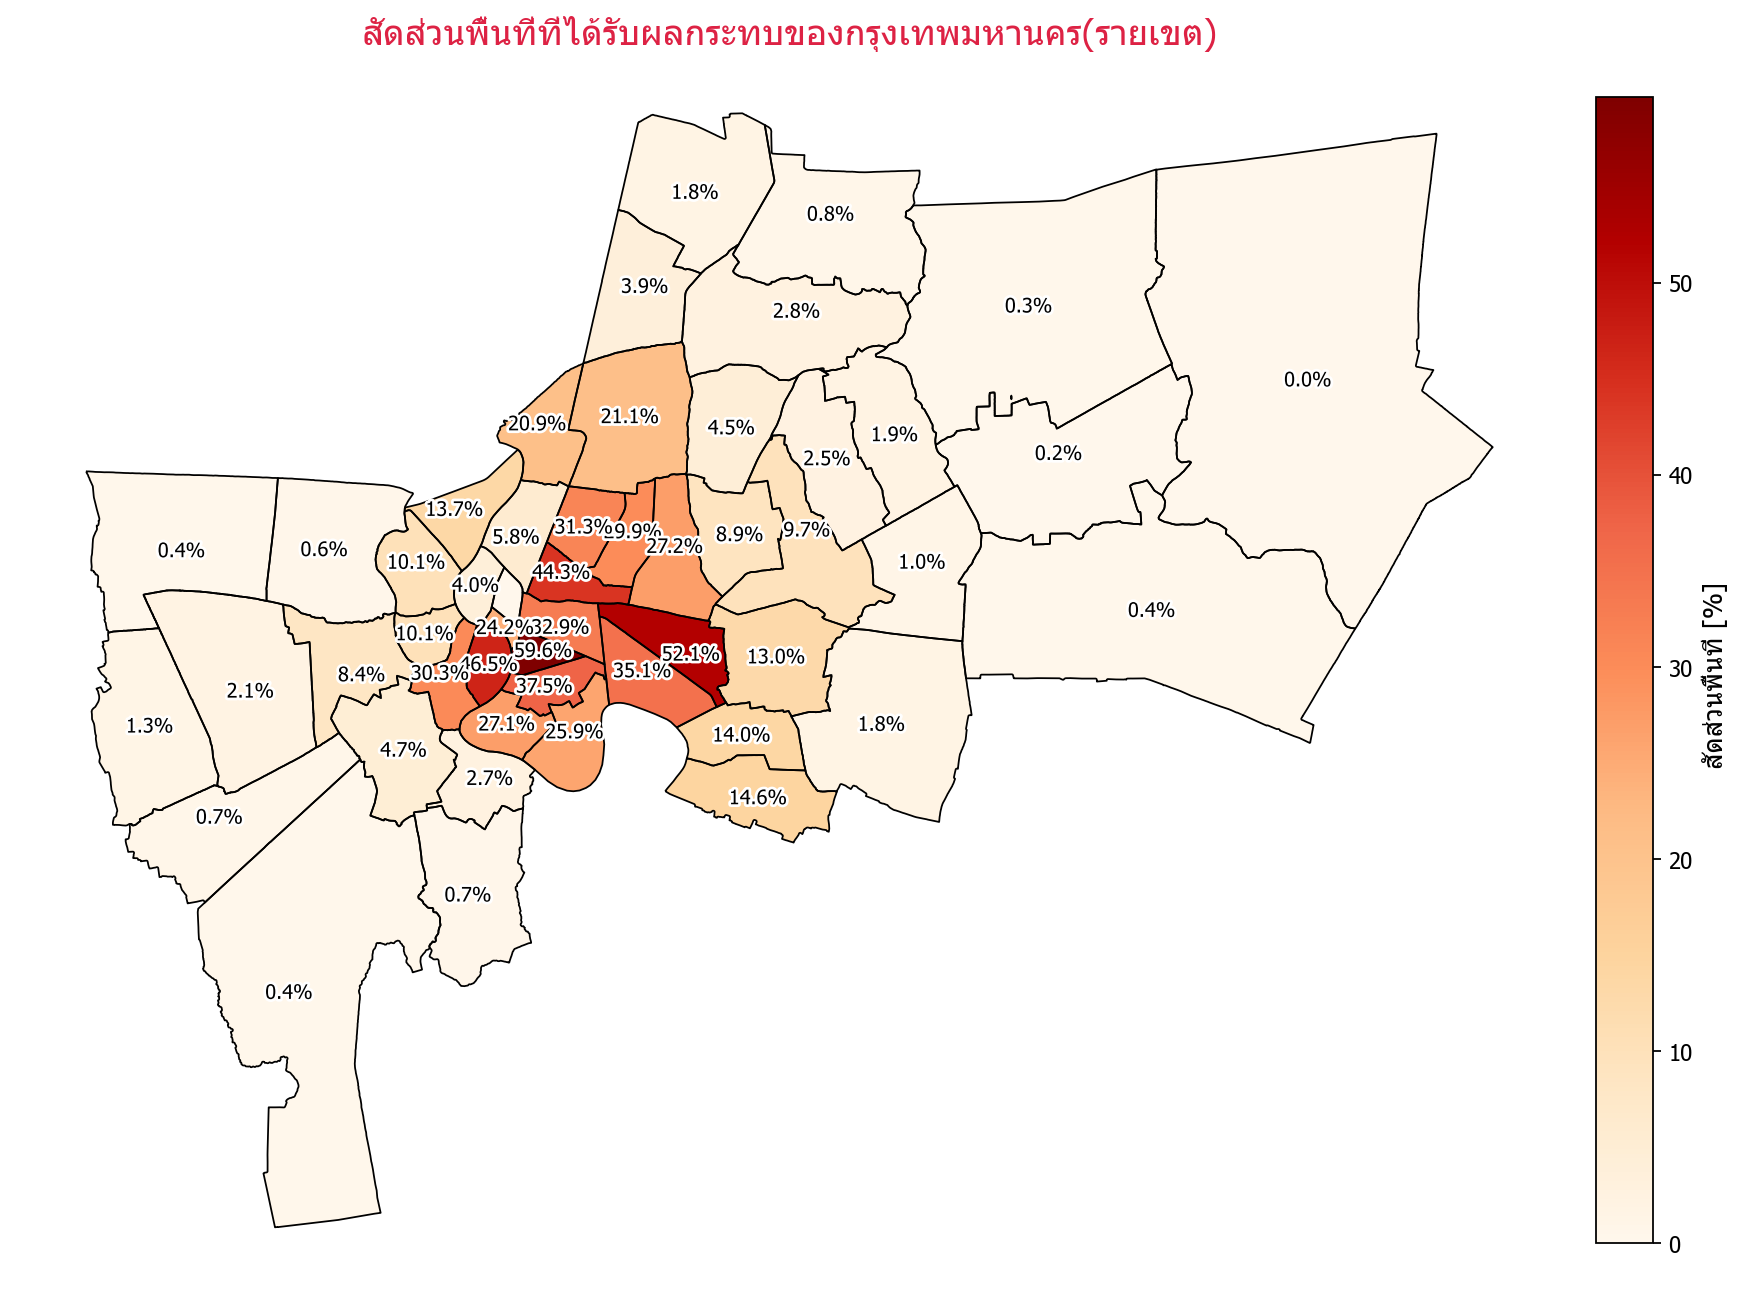

In [327]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import re
from shapely.geometry import Polygon, MultiPolygon, LineString

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: ล้างชื่อเขต =====
def normname(s):
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)
    return s

# ===== 1) อ่าน shapefile =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = gdf["DISTRICT_N"].map(normname)

# ===== 2) dissolve รวมแขวง → เขต และทำความสะอาด =====
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M).buffer(0)

def clean_polygon(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    elif isinstance(geom, MultiPolygon):
        polys = [Polygon(p.exterior) for p in geom.geoms if not p.is_empty]
        if not polys: return None
        largest = max(polys, key=lambda x: x.area)
        return Polygon(largest.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(clean_polygon)
dist = dist[dist.geometry.notna()].copy()
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge ค่าจาก area_join แล้วใช้ total_pct เป็นค่าที่จะเทสี =====
aj = area_join.copy()
aj["DISTRICT_N"] = aj["DISTRICT_N"].map(normname)

# --- ถ้า total_pct ยังไม่มี ให้คำนวณให้ ---
if "total_pct" not in aj.columns:
    if {"total_m2","district_area_m2"}.issubset(aj.columns):
        aj["total_pct"] = (aj["total_m2"] / aj["district_area_m2"]) * 100
    else:
        # สำรอง: รวมจาก p1..p5_pct
        pcs = [c for c in aj.columns if re.fullmatch(r"p[1-5]_pct", c)]
        aj["total_pct"] = aj[pcs].sum(axis=1)

gmap = dist_wgs.merge(aj[["DISTRICT_N","total_pct"]], on="DISTRICT_N", how="left")
gmap["total_pct"] = gmap["total_pct"].fillna(0)

# ===== 4) สร้างเส้นขอบ (เฉพาะขอบนอก) =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls); line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot (ใช้ OrRd) =====
vmin, vmax = gmap["total_pct"].min(), gmap["total_pct"].max()
cmap = plt.cm.OrRd
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="total_pct", cmap=cmap, linewidth=0, edgecolor="none", ax=ax)
boundaries.plot(ax=ax, color="black", linewidth=0.8)

# labels: โชว์เฉพาะ > 0
gmap["label_point"] = gmap.representative_point()
for _, r in gmap.iterrows():
    if r["total_pct"] > 0:
        ax.text(
            r["label_point"].x, r["label_point"].y,
            f'{r["total_pct"]:.1f}%',
            fontsize=9, ha="center", va="center", color="black",
            path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]
        )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("สัดส่วนพื้นที่ [%] ", fontsize=12)

ax.set_title("สัดส่วนพื้นที่ที่ได้รับผลกระทบของกรุงเทพมหานคร(รายเขต)", fontsize=16, color="#d24")
ax.set_axis_off()
plt.tight_layout()
# ===== Export เป็น JPG =====
output_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\covered_pct_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")
plt.show()


✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\district_total_pct_dual_fixed.jpg


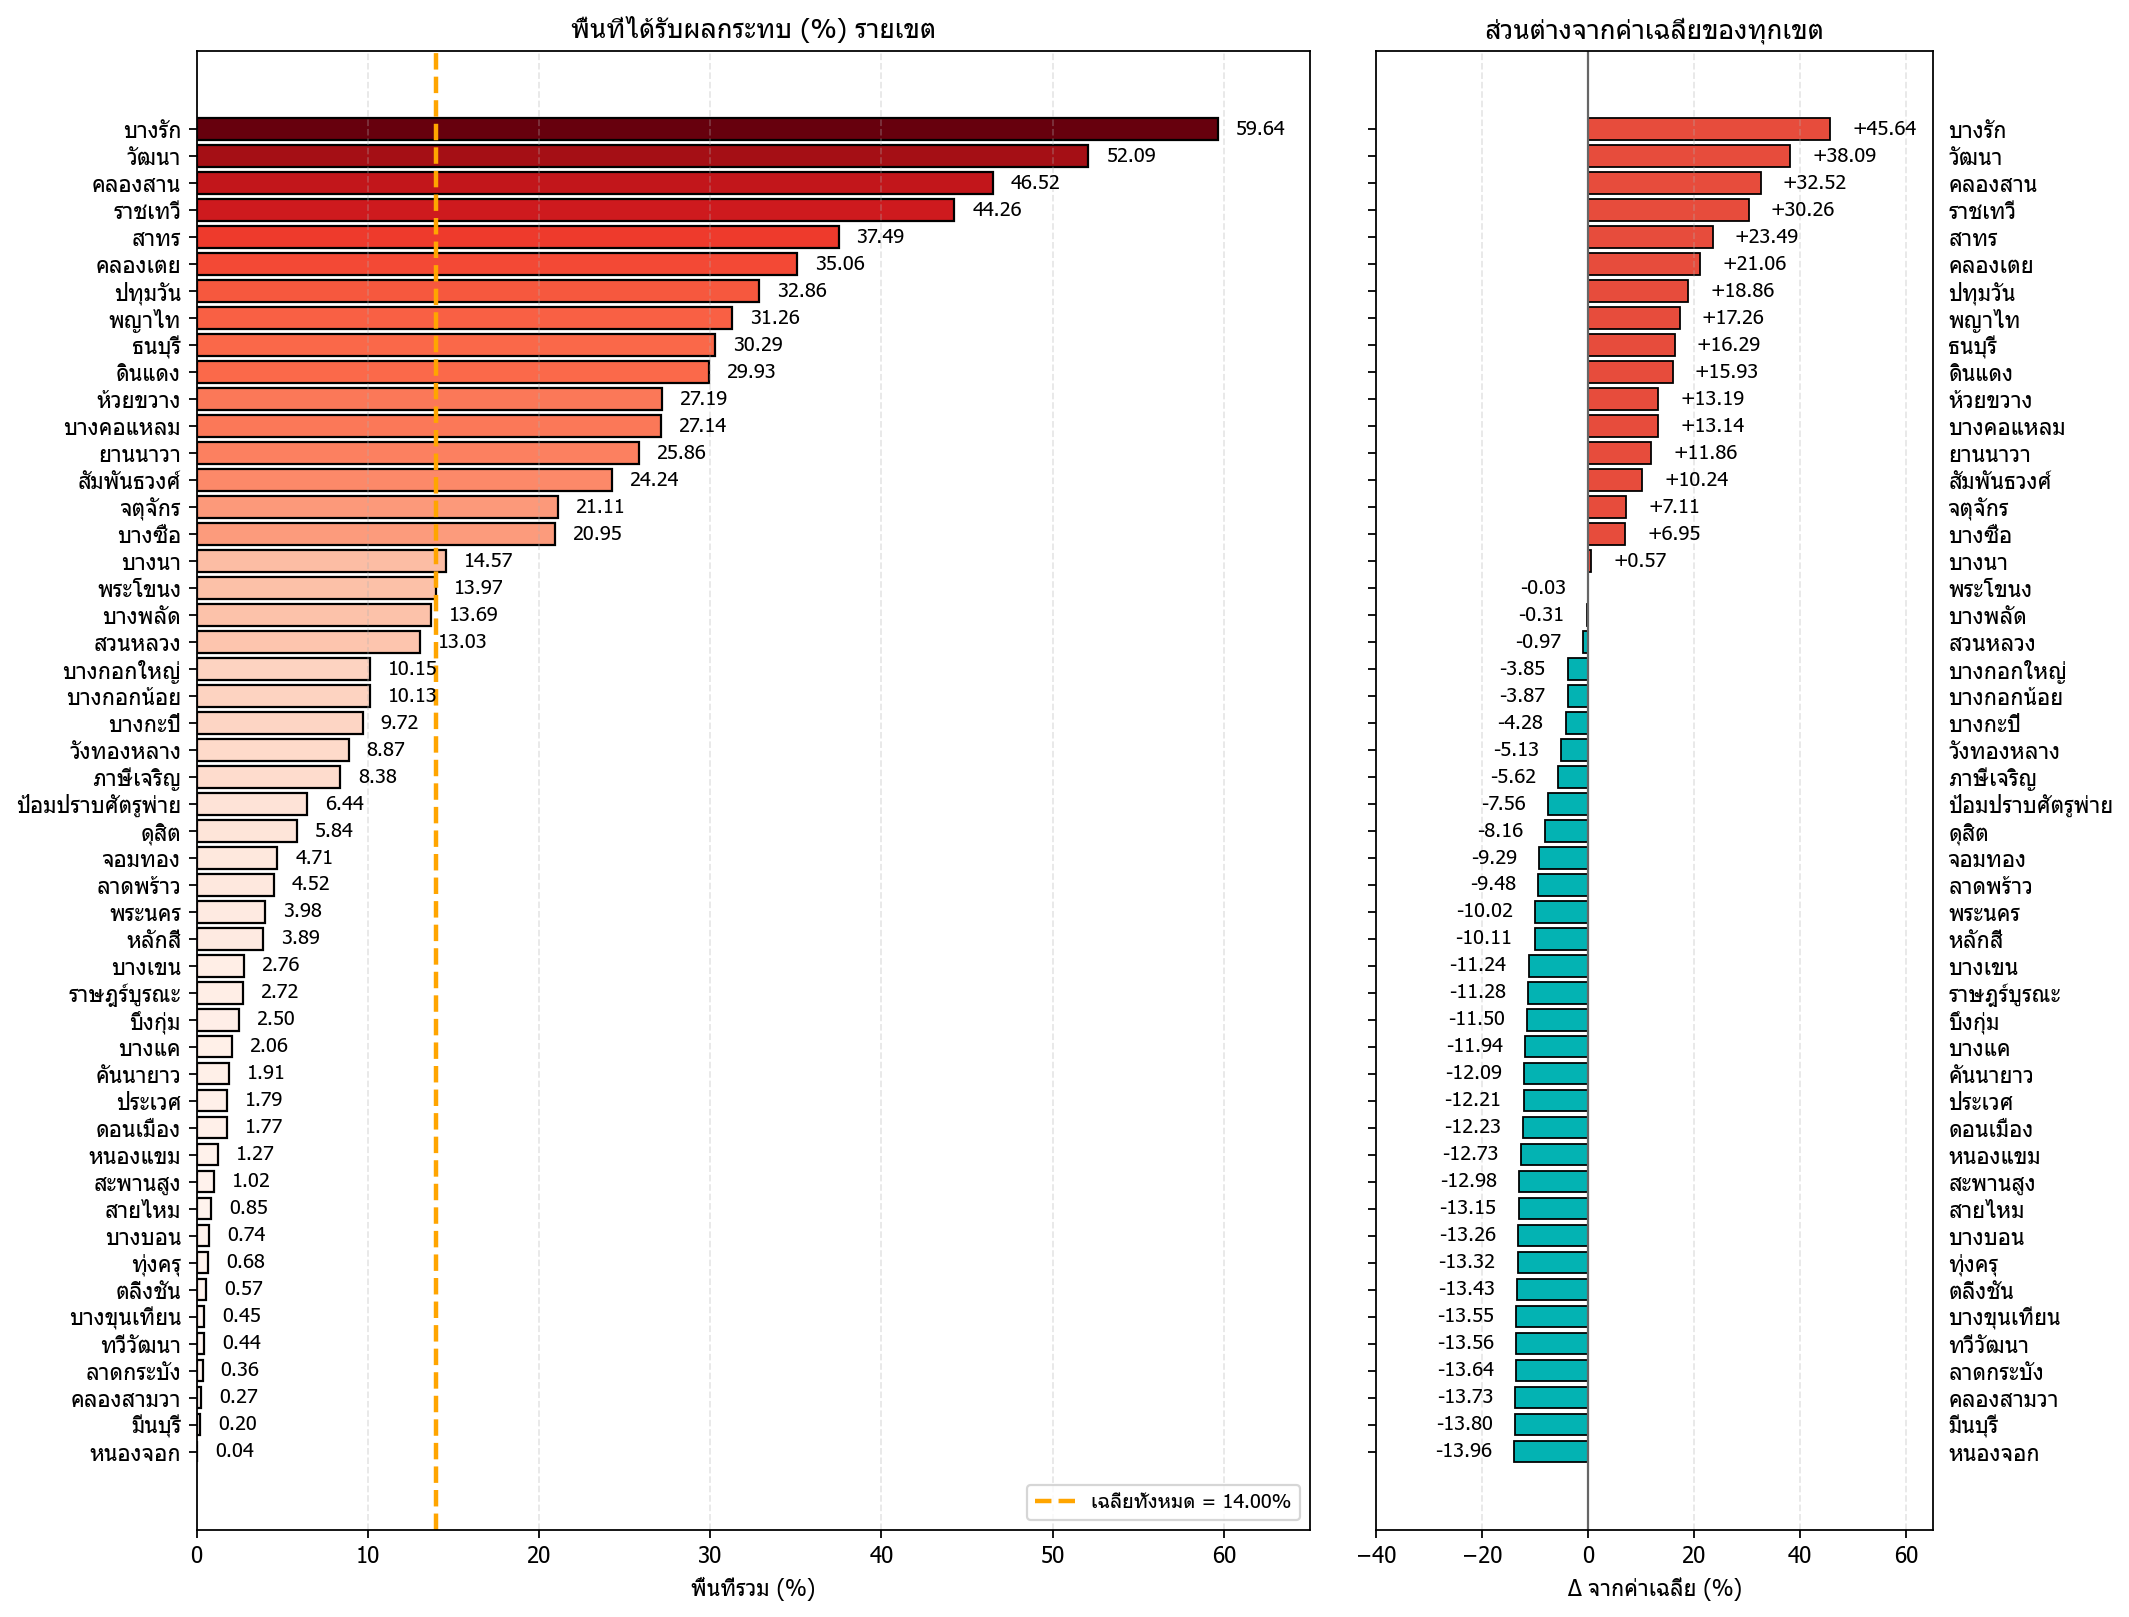

In [417]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ===== ฟอนต์และหน้ากระดาษ =====
rcParams['font.family'] = 'Tahoma'
rcParams['figure.dpi'] = 160

# ===== เตรียมข้อมูลจาก total_pct_df =====
if not {"DISTRICT_N", "total_pct"}.issubset(total_pct_df.columns):
    raise KeyError("total_pct_df ต้องมีคอลัมน์ DISTRICT_N และ total_pct")

df = pd.DataFrame({
    "เขต": total_pct_df["DISTRICT_N"].astype(str),
    "total_pct": total_pct_df["total_pct"].fillna(0).astype(float)
})

# ✅ เรียงจากน้อย → มาก
df = df.sort_values("total_pct", ascending=True).reset_index(drop=True)

# ค่าเฉลี่ย และ Δ
avg_val = df["total_pct"].mean()
df["diff_from_avg"] = df["total_pct"] - avg_val

# ===== วาดกราฟ =====
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[2, 1], wspace=0.08)

ax_left  = fig.add_subplot(gs[0, 0])
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_left)

ypos = np.arange(len(df))

# ---------- ซ้าย: พื้นที่รวม (%) ----------
vals_left = df["total_pct"].values

norm = mcolors.Normalize(vmin=vals_left.min(), vmax=vals_left.max() if vals_left.max() > 0 else 1)
cmap = cm.get_cmap("Reds")

ax_left.barh(
    ypos, vals_left,
    color=cmap(norm(vals_left)),
    edgecolor="black", linewidth=1.0
)

ax_left.set_yticks(ypos, labels=df["เขต"])
ax_left.set_xlabel("พื้นที่รวม (%)")
ax_left.set_title("พื้นที่ได้รับผลกระทบ (%) รายเขต", fontsize=12)
ax_left.grid(axis="x", linestyle="--", alpha=0.3)

# ✅ Fix scale 0–65
ax_left.set_xlim(0, 65)

# เส้นค่าเฉลี่ย
ax_left.axvline(avg_val, color="orange", linestyle="--", linewidth=2,
                label=f"เฉลี่ยทั้งหมด = {avg_val:.2f}%")
ax_left.legend(loc="lower right", fontsize=9, frameon=True)

# ตัวเลขบนแท่ง
for i, v in enumerate(vals_left):
    if v > 63:
        ax_left.text(v - 0.6, i, f"{v:.2f}", va="center", ha="right", fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.75))
    else:
        ax_left.annotate(f"{v:.2f}", xy=(v, i), xytext=(8, 0),
                         textcoords="offset points", va="center", ha="left",
                         fontsize=9, clip_on=False)

# ---------- ขวา: Δ จากค่าเฉลี่ย ----------
diff = df["diff_from_avg"].values
colors = np.where(diff >= 0, "#e74c3c", "#03b3b3")

ax_right.barh(ypos, diff, color=colors, edgecolor="black", linewidth=0.8)
ax_right.axvline(0, color="#666", linewidth=1)

# ชื่อเขตด้านขวา
ax_right.set_yticks(ypos, labels=df["เขต"])
ax_right.tick_params(axis='y', which='both', labelleft=False, labelright=True)

ax_right.set_xlabel("Δ จากค่าเฉลี่ย (%)")
ax_right.set_title("ส่วนต่างจากค่าเฉลี่ยของทุกเขต", fontsize=12)
ax_right.grid(axis="x", linestyle="--", alpha=0.3)

# ✅ Fix scale: -20 ถึง 55
ax_right.set_xlim(-40, 65)

# ตัวเลขฝั่งขวา
for i, v in enumerate(diff):
    txt = f"{v:+.2f}"
    dx = 10 if v >= 0 else -10
    ha = "left" if v >= 0 else "right"
    ax_right.annotate(txt, xy=(v, i), xytext=(dx, 0),
                      textcoords="offset points", ha=ha, va="center",
                      fontsize=9, clip_on=False)

plt.tight_layout()

# ===== Export =====
output_path = r"C:\Users\piriy\Desktop\district_total_pct_dual_fixed.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight", pad_inches=0.15)
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")

plt.show()


✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\covered_pct_by_district.jpg


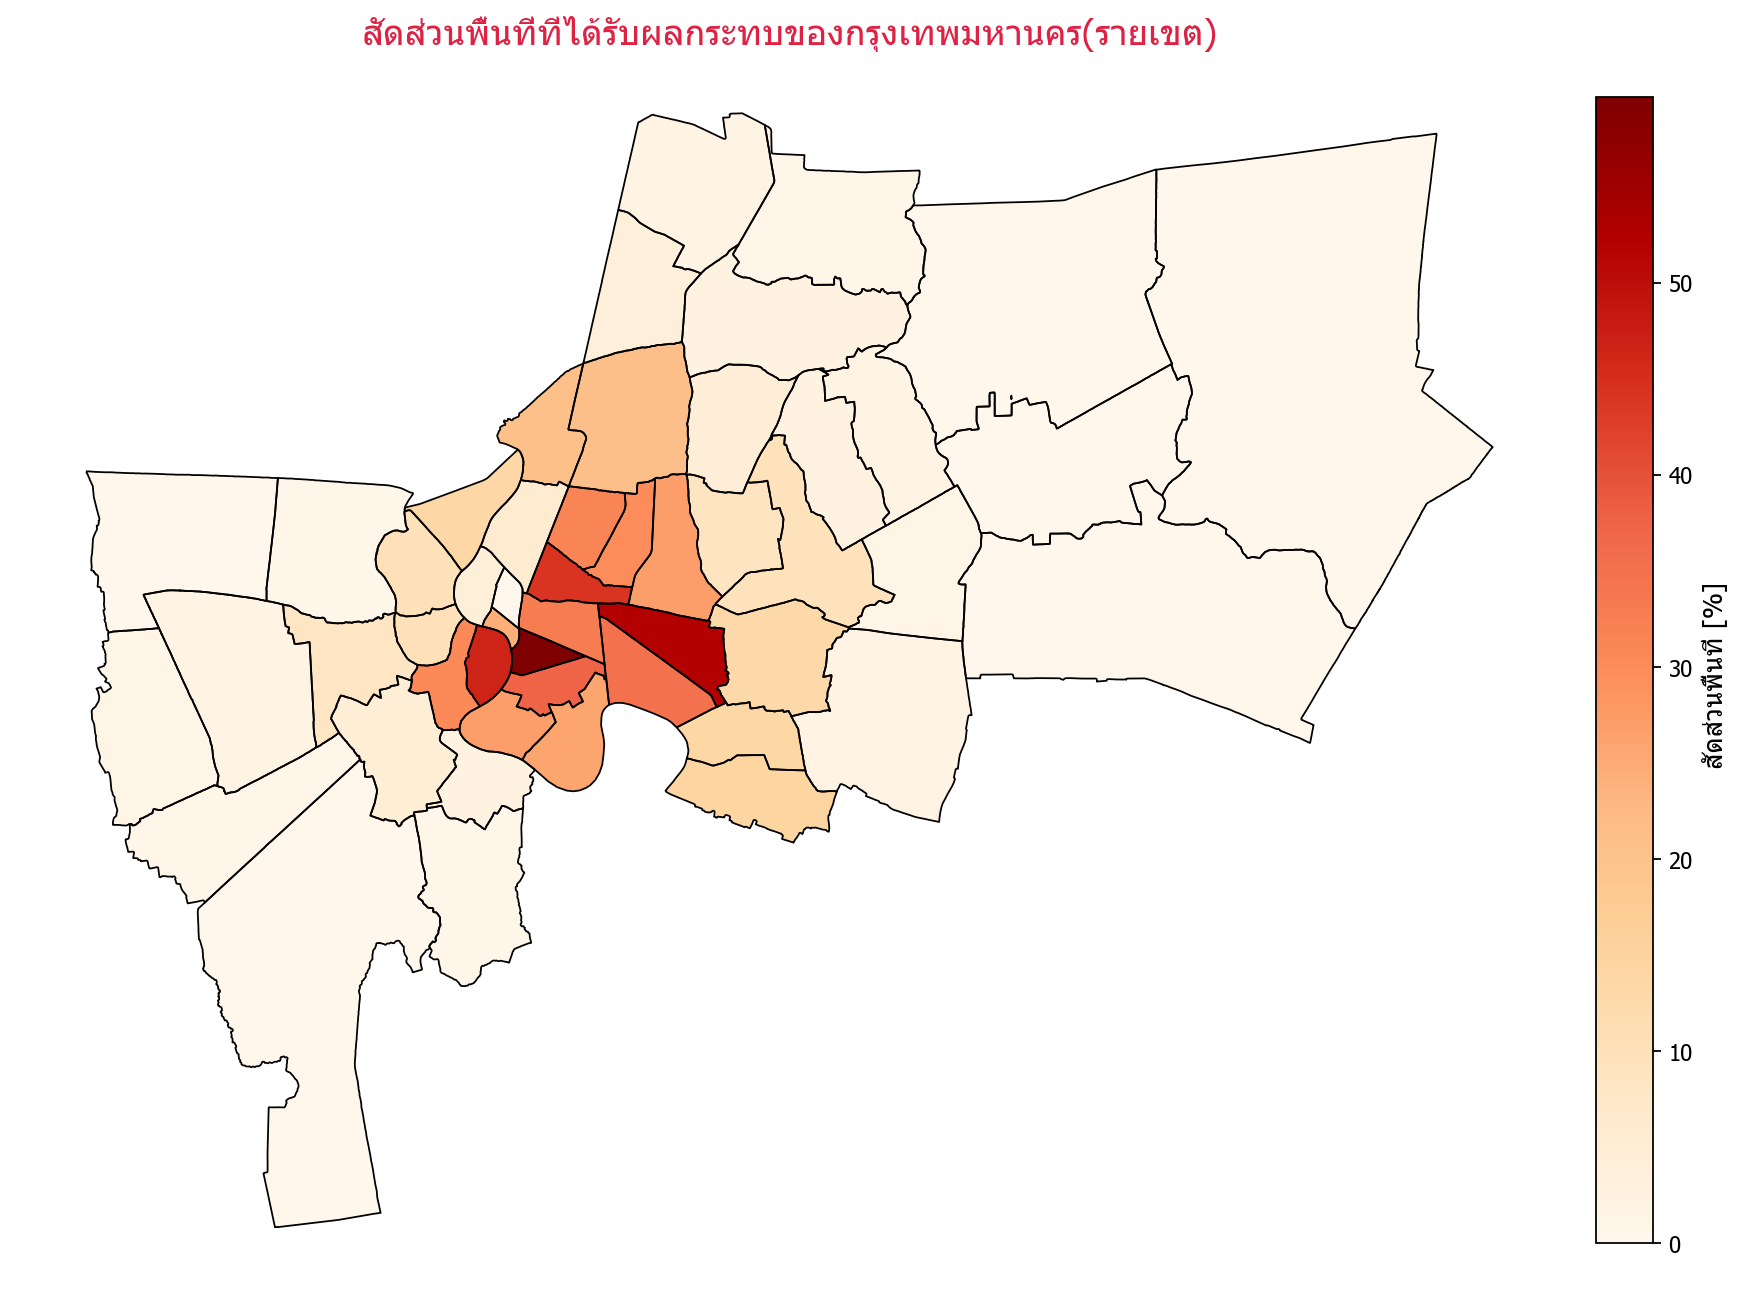

In [351]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import re
from shapely.geometry import Polygon, MultiPolygon, LineString

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: ล้างชื่อเขต =====
def normname(s):
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)
    return s

# ===== 1) อ่าน shapefile =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = gdf["DISTRICT_N"].map(normname)

# ===== 2) dissolve รวมแขวง → เขต และทำความสะอาด =====
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")
CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M).buffer(0)

def clean_polygon(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    elif isinstance(geom, MultiPolygon):
        polys = [Polygon(p.exterior) for p in geom.geoms if not p.is_empty]
        if not polys: return None
        largest = max(polys, key=lambda x: x.area)
        return Polygon(largest.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(clean_polygon)
dist = dist[dist.geometry.notna()].copy()
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge ค่าจาก area_join แล้วใช้ total_pct เป็นค่าที่จะเทสี =====
aj = area_join.copy()
aj["DISTRICT_N"] = aj["DISTRICT_N"].map(normname)

# --- ถ้า total_pct ยังไม่มี ให้คำนวณให้ ---
if "total_pct" not in aj.columns:
    if {"total_m2","district_area_m2"}.issubset(aj.columns):
        aj["total_pct"] = (aj["total_m2"] / aj["district_area_m2"]) * 100
    else:
        # สำรอง: รวมจาก p1..p5_pct
        pcs = [c for c in aj.columns if re.fullmatch(r"p[1-5]_pct", c)]
        aj["total_pct"] = aj[pcs].sum(axis=1)

gmap = dist_wgs.merge(aj[["DISTRICT_N","total_pct"]], on="DISTRICT_N", how="left")
gmap["total_pct"] = gmap["total_pct"].fillna(0)

# ===== 4) สร้างเส้นขอบ (เฉพาะขอบนอก) =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls); line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot (ใช้ OrRd) =====
vmin, vmax = gmap["total_pct"].min(), gmap["total_pct"].max()
cmap = plt.cm.OrRd
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="total_pct", cmap=cmap, linewidth=0, edgecolor="none", ax=ax)
boundaries.plot(ax=ax, color="black", linewidth=0.8)

# --- เอาตัวเลขออก: ตัดส่วน label_point + ax.text ออก ---

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("สัดส่วนพื้นที่ [%] ", fontsize=12)

ax.set_title("สัดส่วนพื้นที่ที่ได้รับผลกระทบของกรุงเทพมหานคร(รายเขต)", fontsize=16, color="#d24")
ax.set_axis_off()
plt.tight_layout()

# ===== Export เป็น JPG =====
output_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\covered_pct_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")
plt.show()


✅ บันทึกไฟล์แล้ว: C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\uncovered_pct_by_district.jpg


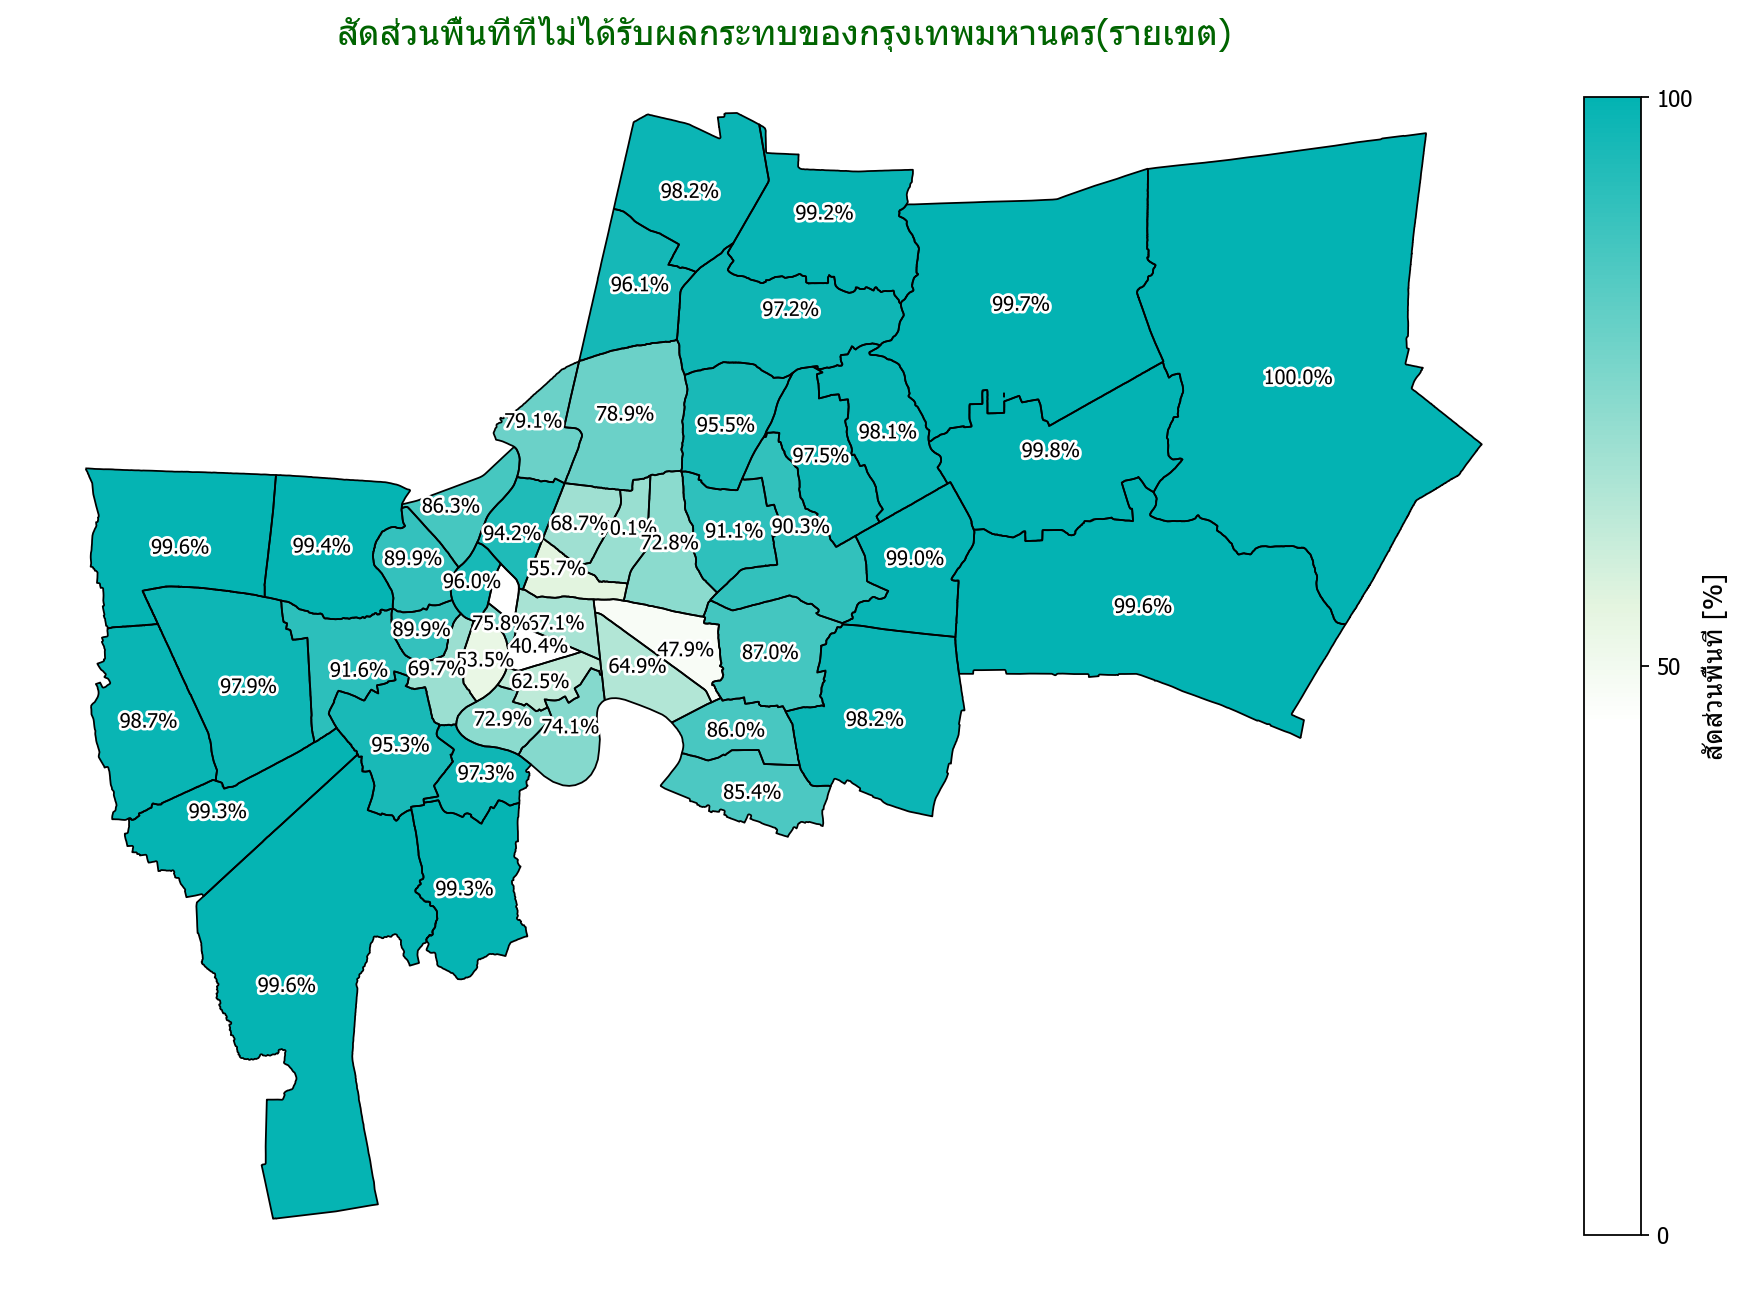

In [429]:
# -*- coding: utf-8 -*-
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe
import re
from shapely.geometry import Polygon, MultiPolygon, LineString
import numpy as np

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper =====
def normname(s):
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)
    return s

# ===== 1) อ่าน shapefile =====
gdf = gpd.read_file(shp_path, encoding="utf-8")
if gdf.crs is None:
    gdf = gdf.set_crs(epsg=4326)
gdf["DISTRICT_N"] = gdf["DISTRICT_N"].map(normname)

# ===== 2) dissolve รวมแขวง → เขต =====
gproj = gdf.to_crs(epsg=32647)
dist = gproj.dissolve(by="DISTRICT_N")

CLOSE_GAP_M = 60
dist["geometry"] = dist.buffer(CLOSE_GAP_M).buffer(-CLOSE_GAP_M).buffer(0)

def clean_polygon(geom):
    if isinstance(geom, Polygon):
        return Polygon(geom.exterior)
    elif isinstance(geom, MultiPolygon):
        polys = [Polygon(p.exterior) for p in geom.geoms if not p.is_empty]
        if not polys: return None
        largest = max(polys, key=lambda x: x.area)
        return Polygon(largest.exterior)
    return geom

dist["geometry"] = dist.geometry.apply(clean_polygon)
dist = dist[dist.geometry.notna()].copy()
dist_wgs = dist.to_crs(epsg=4326).reset_index()

# ===== 3) merge uncovered_pct =====
aj = area_join.copy()
aj["DISTRICT_N"] = aj["DISTRICT_N"].map(normname)

if "uncovered_pct" not in aj.columns:
    aj["uncovered_pct"] = (
        (aj["district_area_m2"] - aj["total_m2"]) / aj["district_area_m2"]
    ) * 100

gmap = dist_wgs.merge(aj[["DISTRICT_N","uncovered_pct"]], on="DISTRICT_N", how="left")
gmap["uncovered_pct"] = gmap["uncovered_pct"].fillna(0)

# ===== 4) เส้นขอบ =====
def exterior_lines(geom):
    if isinstance(geom, Polygon):
        return [LineString(geom.exterior.coords)]
    elif isinstance(geom, MultiPolygon):
        return [LineString(p.exterior.coords) for p in geom.geoms]
    return []

line_geoms, line_ids = [], []
for i, geom in enumerate(gmap.geometry):
    for ls in exterior_lines(geom):
        line_geoms.append(ls); line_ids.append(i)
boundaries = gpd.GeoDataFrame({"id": line_ids}, geometry=line_geoms, crs=gmap.crs)

# ===== 5) plot =====
import numpy as np

# ให้ 0–<45% = ขาว, และตั้งแต่ 45% ขึ้นไปไล่จากขาว -> เขียวเข้ม
vmin, vmax = 0, float(gmap["uncovered_pct"].max())

# สร้างคอลลอร์แมปแบบมี “ช่วงแบน” ถึง 45% (ขาว) แล้วจึงค่อยไล่เฉดเขียว
cmap = mcolors.LinearSegmentedColormap.from_list(
    "white_to_green_from_45",
    [
        (0.00, "#FFFFFF"),   # 0%
        (0.4499, "#FFFFFF"), # <45% = ขาวเหมือนเดิม
        (0.55, "#E5F5E0"),   # เริ่มเขียวอ่อนที่ 45%
        (1.00, "#03b3b3"),   # เขียวเข้มสุดที่ค่าสูงสุด
    ],
)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(11, 10))
gmap.plot(column="uncovered_pct", cmap=cmap, norm=norm,
          linewidth=0, edgecolor="none", ax=ax)

# เส้นขอบเขตสีดำ
boundaries.plot(ax=ax, color="black", linewidth=0.8)

# labels (เฉพาะ > 0)
gmap["label_point"] = gmap.representative_point()
for _, r in gmap.iterrows():
    if r["uncovered_pct"] > 0:
        ax.text(
            r["label_point"].x, r["label_point"].y,
            f'{r["uncovered_pct"]:.1f}%',
            fontsize=9, ha="center", va="center", color="black",
            path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]
        )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label("สัดส่วนพื้นที่ [%]", fontsize=12)
cbar.set_ticks([0, 50, vmax])
cbar.set_ticklabels(["0", "50", f"{vmax:.0f}"])

ax.set_title("สัดส่วนพื้นที่ที่ไม่ได้รับผลกระทบของกรุงเทพมหานคร(รายเขต)",
             fontsize=16, color="#006400")
ax.set_axis_off()
plt.tight_layout()

# ===== Export เป็น JPG =====
output_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\uncovered_pct_by_district.jpg"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
print(f"✅ บันทึกไฟล์แล้ว: {output_path}")

plt.show()



In [347]:
# -*- coding: utf-8 -*-
import warnings; warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import numpy as np
import re
from shapely.ops import unary_union

# ===== PATH =====
shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\buildings_all_stats_mapped_joined_GEOM_ONLY.shp"
dist_shp_path = r"C:\Users\piriy\Desktop\drive-download-20250916T062636Z-1-001\ข้อมูลเขตแขวง\district.shp"

# ===== Helper: อ่าน shapefile ภาษาไทย =====
def read_thai_shp(path, encodings=("utf-8","utf-8-sig","tis-620","cp874")):
    last = None
    for enc in encodings:
        try:
            return gpd.read_file(path, encoding=enc)
        except Exception as e:
            last = e
    raise last

# ===== ฟังก์ชันล้าง/แก้ชื่อเขต =====
def clean_district_name(s: str) -> str:
    s = str(s).strip()
    s = re.sub(r"^\s*เขต", "", s)  # ตัดคำว่า "เขต" นำหน้า
    fixes = {
        "ป้อมปราบศัต": "ป้อมปราบศัตรูพ่าย",
        "ป้อมปราบศัตรูพา": "ป้อมปราบศัตรูพ่าย",
        "ป้อมปราบศัตรูพา่ย": "ป้อมปราบศัตรูพ่าย",
    }
    return fixes.get(s, s)

# ===== Load data =====
gdf = read_thai_shp(shp_path)
gdf = gdf.to_crs(epsg=4326) if gdf.crs else gdf.set_crs(epsg=4326)

# ===== Damage column =====
COL_DMG = "total_dm_2"
if COL_DMG not in gdf.columns:
    raise KeyError(f"ไม่พบคอลัมน์ '{COL_DMG}'")

# ===== Default floors / multipliers =====
DEFAULT_FLOORS = {
    "apartment": 8, "bank": 2, "bridge": 1, "building": 3, "condo": 20,
    "factory": 2, "government office": 5, "hospital": 8, "hotel": 10,
    "house": 2, "office building": 12, "other": 1, "school": 3,
    "supermarket": 1, "temple": 3,
}
FLOORS_FALLBACK = 3
METERS_PER_FLOOR = 3.2

BASE_MULTIPLIER = 2.0
TYPE_MULTIPLIER = {
    "condo": 2.5, "apartment": 2.3, "office building": 2.3,
    "hospital": 2.5, "school": 2.3, "hotel": 2.3,
    "temple": 2.2, "government office": 2.2,
}

if "BLDG_T" not in gdf.columns:
    raise KeyError("ไม่พบคอลัมน์ 'BLDG_T'")

bldg_lower = gdf["BLDG_T"].astype(str).str.strip().str.lower()
floors_col = "floors" if "floors" in gdf.columns else None

def _coalesce_floors(row):
    bt = str(row["__bldg_lower__"])
    default_f = DEFAULT_FLOORS.get(bt, FLOORS_FALLBACK)
    if floors_col and pd.notna(row[floors_col]):
        try:
            v = float(row[floors_col])
            if v > 0: return int(round(v))
        except:
            pass
    return default_f

gdf = gdf.copy()
gdf["__bldg_lower__"] = bldg_lower
gdf["floors_used"] = gdf.apply(_coalesce_floors, axis=1).astype(int)
gdf["est_height_m"] = gdf["floors_used"] * METERS_PER_FLOOR
gdf["safety_k"] = gdf["__bldg_lower__"].map(TYPE_MULTIPLIER).fillna(BASE_MULTIPLIER)
gdf["buffer_m"] = gdf["est_height_m"] * gdf["safety_k"]

# ===== Buffer =====
gdf_utm = gdf.to_crs(epsg=32647)
gdf_utm["buffer_geom"] = gdf_utm.geometry.buffer(gdf_utm["buffer_m"])

buffers = (
    gdf_utm[["buffer_geom","BLDG_T","floors_used","est_height_m","safety_k","buffer_m",COL_DMG]]
      .set_geometry("buffer_geom")
      .to_crs(epsg=4326)
)
buffers = buffers.rename(columns={"buffer_geom": "geometry"}).set_geometry("geometry")

# ===== Priority dissolve =====
priority_map_label = {"วิกฤต":5, "รุนแรง":4, "ปานกลาง":3, "น้อย":2, "น้อยมาก":1}
def to_priority(v):
    s = str(v).strip()
    if s in priority_map_label:
        return priority_map_label[s]
    try:
        iv = int(float(s))
        if 1 <= iv <= 5: return iv
    except:
        pass
    return np.nan

buffers_pri = buffers.copy()
buffers_pri["priority"] = buffers_pri[COL_DMG].apply(to_priority)
buffers_pri = buffers_pri.dropna(subset=["priority"]).copy()
buffers_pri["priority"] = buffers_pri["priority"].astype(int)

dissolved = (
    buffers_pri
    .dissolve(by="priority", as_index=False, aggfunc="first")
    [["priority","geometry"]]
)
dissolved = dissolved.sort_values("priority", ascending=False).reset_index(drop=True)

taken = None
out_rows = []
for _, row in dissolved.iterrows():
    geom = row["geometry"]
    if geom is None or geom.is_empty: continue
    if taken is not None and not taken.is_empty:
        try:
            geom = geom.difference(taken)
        except Exception:
            pass
    if geom is None or geom.is_empty: continue
    out_rows.append({"priority": int(row["priority"]), "geometry": geom})
    taken = geom if taken is None else unary_union([taken, geom])

merged_gdf = gpd.GeoDataFrame(out_rows, geometry="geometry", crs="EPSG:4326")

# ===== District overlay =====
dist = read_thai_shp(dist_shp_path)
dist = dist.to_crs(epsg=4326) if dist.crs else dist.set_crs(epsg=4326)

if "DISTRICT_N" in dist.columns:
    dist["DISTRICT_N"] = dist["DISTRICT_N"].astype(str).map(clean_district_name)

dist_utm   = dist.to_crs(epsg=32647)[["DISTRICT_N","geometry"]].copy()
merged_utm = merged_gdf.to_crs(epsg=32647)[["priority","geometry"]].copy()

dist_utm["geometry"]   = dist_utm.buffer(0)
merged_utm["geometry"] = merged_utm.buffer(0)

try:
    inter = gpd.overlay(dist_utm, merged_utm, how="intersection", keep_geom_type=True)
except Exception:
    inter = gpd.overlay(dist_utm, merged_utm, how="intersection")

if inter.empty:
    area_pivot = pd.DataFrame(columns=["DISTRICT_N","p5_m2","p4_m2","p3_m2","p2_m2","p1_m2","total_m2"])
else:
    inter["area_m2"] = inter.geometry.area
    area_tbl = inter.groupby(["DISTRICT_N","priority"], as_index=False)["area_m2"].sum()
    pr_cols = [5,4,3,2,1]
    area_pivot = (
        area_tbl.pivot_table(index="DISTRICT_N", columns="priority", values="area_m2",
                             aggfunc="sum", fill_value=0)
                 .reindex(columns=pr_cols, fill_value=0)
                 .rename(columns={5:"p5_m2",4:"p4_m2",3:"p3_m2",2:"p2_m2",1:"p1_m2"})
                 .reset_index()
    )
    area_pivot["total_m2"] = area_pivot[["p5_m2","p4_m2","p3_m2","p2_m2","p1_m2"]].sum(axis=1)

# ===== Add Shape_Area and % =====
district_area_m2 = {
    "คลองสาน": 5967813.35,"ธนบุรี":8129089.74,"ห้วยขวาง":16282278.40,"บางซื่อ":12926994.85,
    "ยานนาวา":12458840.30,"ภาษีเจริญ":19038997.80,"ราชเทวี":7176491.48,"บางพลัด":11818996.08,
    "วัฒนา":12951358.45,"พญาไท":9256707.26,"คลองเตย":13395850.11,"ดินแดง":8447460.18,
    "ปทุมวัน":8046091.20,"บางรัก":4006288.92,"บางบอน":34125349.08,"จตุจักร":32543975.49,
    "สัมพันธวงศ์":1420221.35,"สวนหลวง":24354050.34,"บางแค":47848535.39,"สายไหม":43476984.87,
    "ดอนเมือง":36956389.63,"จอมทอง":22147127.08,"บางกะปิ":27575782.83,"พระโขนง":13175609.28,
    "ลาดกระบัง":128358416.93,"บางกอกใหญ่":6289603.77,"บางกอกน้อย":12347899.42,"สาทร":7225261.69,
    "บางคอแหลม":8597190.28,"บางนา":19031254.87,"หลักสี่":22761904.77,"วังทองหลาง":17079674.32,
    "พระนคร":5377063.36,"ตลิ่งชัน":35631286.19,"หนองจอก":238394891.39,"คลองสามวา":115002594.52,
    "ทวีวัฒนา":50110520.26,"ประเวศ":53886702.71,"ราษฎร์บูรณะ":12583940.67,"บางเขน":40791981.63,
    "ป้อมปราบศัตรูพ่าย":2497818.10,"ดุสิต":11344212.37,"บางขุนเทียน":129682959.56,"ลาดพร้าว":21337338.18,
    "บึงกุ่ม":23400020.21,"คันนายาว":25514583.40,"สะพานสูง":27979997.24,"ทุ่งครุ":32208149.33,
    "มีนบุรี":59962935.87,"หนองแขม":36416084.28,
}
area_full_df = pd.DataFrame(list(district_area_m2.items()), columns=["DISTRICT_N","district_area_m2"])

# ล้างชื่อเขตให้ตรงกันก่อน merge
area_pivot["DISTRICT_N"]  = area_pivot["DISTRICT_N"].astype(str).map(clean_district_name)
area_full_df["DISTRICT_N"] = area_full_df["DISTRICT_N"].astype(str).map(clean_district_name)

area_join = area_pivot.merge(area_full_df, on="DISTRICT_N", how="left")

# คำนวณ % ต่อพื้นที่เขต
for col in ["p5_m2","p4_m2","p3_m2","p2_m2","p1_m2","total_m2"]:
    pct_col = col.replace("_m2","_pct")
    area_join[pct_col] = (area_join[col] / area_join["district_area_m2"]) * 100

# พื้นที่ไม่ครอบคลุม + %
area_join["uncovered_m2"]  = (area_join["district_area_m2"] - area_join["total_m2"]).clip(lower=0)
area_join["uncovered_pct"] = (area_join["uncovered_m2"] / area_join["district_area_m2"]) * 100

# รวม % ของพื้นที่เสี่ยงทั้งหมด
area_join["total_pct"] = (area_join["total_m2"] / area_join["district_area_m2"]) * 100

# แจ้งเตือนเขตที่ยังจับคู่พื้นที่เต็มไม่ได้ (ถ้ามี)
missing = sorted(area_join.loc[area_join["district_area_m2"].isna(), "DISTRICT_N"].unique())
if missing:
    print("⚠️ เขตที่ยังไม่มีค่า Shape_Area (ตรวจสะกด/ชื่อ):", ", ".join(missing))

# ===== Mapping คอลัมน์เป็นภาษาไทย =====
col_mapping = {
    "DISTRICT_N": "เขต",
    "district_area_m2": "พื้นที่เขต (ตร.ม.)",
    "p5_m2": "พื้นที่วิกฤต (ตร.ม.)",
    "p4_m2": "พื้นที่รุนแรง (ตร.ม.)",
    "p3_m2": "พื้นที่ปานกลาง (ตร.ม.)",
    "p2_m2": "พื้นที่น้อย (ตร.ม.)",
    "p1_m2": "พื้นที่น้อยมาก (ตร.ม.)",
    "total_m2": "พื้นที่เสี่ยงรวม (ตร.ม.)",
    "p5_pct": "พื้นที่วิกฤต (%)",
    "p4_pct": "พื้นที่รุนแรง (%)",
    "p3_pct": "พื้นที่ปานกลาง (%)",
    "p2_pct": "พื้นที่น้อย (%)",
    "p1_pct": "พื้นที่น้อยมาก (%)",
    "total_pct": "พื้นที่เสี่ยงรวม (%)",
    "uncovered_m2": "พื้นที่ไม่ครอบคลุม (ตร.ม.)",
    "uncovered_pct": "พื้นที่ไม่ครอบคลุม (%)",
}

# ===== เปลี่ยนชื่อคอลัมน์ + จัดลำดับที่แสดงผล =====
area_join_renamed = area_join.rename(columns=col_mapping)

ordered_cols = [
    "เขต", "พื้นที่เขต (ตร.ม.)",
    "พื้นที่วิกฤต (ตร.ม.)","พื้นที่รุนแรง (ตร.ม.)","พื้นที่ปานกลาง (ตร.ม.)","พื้นที่น้อย (ตร.ม.)","พื้นที่น้อยมาก (ตร.ม.)",
    "พื้นที่เสี่ยงรวม (ตร.ม.)",
    "พื้นที่วิกฤต (%)","พื้นที่รุนแรง (%)","พื้นที่ปานกลาง (%)","พื้นที่น้อย (%)","พื้นที่น้อยมาก (%)",
    "พื้นที่เสี่ยงรวม (%)",
    "พื้นที่ไม่ครอบคลุม (ตร.ม.)","พื้นที่ไม่ครอบคลุม (%)",
]
# เก็บเฉพาะคอลัมน์ที่มีอยู่จริง
ordered_cols = [c for c in ordered_cols if c in area_join_renamed.columns]
area_join_renamed = area_join_renamed.reindex(columns=ordered_cols)

# ปัดทศนิยมเฉพาะคอลัมน์เปอร์เซ็นต์ (อ่านง่าย)
pct_cols_th = [c for c in area_join_renamed.columns if c.endswith("(%)")]
area_join_renamed[pct_cols_th] = area_join_renamed[pct_cols_th].round(2)

# ===== Show table (ภาษาไทย) =====
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("\n📊 ตารางพื้นที่รวมรายเขต (คอลัมน์ภาษาไทย)")
display(area_join_renamed.head(50))

# ===== Export Excel (ภาษาไทย) =====
# out_path = r"C:\Users\piriy\Desktop\district_priority_area_with_pct_th.xlsx"
# area_join_renamed.to_excel(out_path, index=False)
# print(f"✅ บันทึกไฟล์แล้ว: {out_path}")



📊 ตารางพื้นที่รวมรายเขต (คอลัมน์ภาษาไทย)


เขต  พื้นที่เขต (ตร.ม.)  พื้นที่วิกฤต (ตร.ม.)  \
0             คลองสาน        5,967,813.35            615,244.99   
1           คลองสามวา      115,002,594.52              1,125.89   
2             คลองเตย       13,395,850.11            852,727.02   
3            คันนายาว       25,514,583.40                  0.00   
4             จตุจักร       32,543,975.49          2,078,310.05   
5              จอมทอง       22,147,127.08             71,263.08   
6            ดอนเมือง       36,956,389.63                  0.00   
7              ดินแดง        8,447,460.18            542,535.94   
8               ดุสิต       11,344,212.37                  0.00   
9            ตลิ่งชัน       35,631,286.19                  0.00   
10           ทวีวัฒนา       50,110,520.26              1,125.89   
11            ทุ่งครุ       32,208,149.33                  0.00   
12             ธนบุรี        8,129,089.74          1,172,505.97   
13         บางกอกน้อย       12,347,899.42            101,458.45   
14         บางกอกใหญ่        6,289,603.77                  0.00   
15            บางกะปิ       27,575,782.83              1,125.89   
16        บางขุนเทียน      129,682,959.56                  0.00   
17          บางคอแหลม        8,597,190.28              2,870.57   
18            บางซื่อ       12,926,994.85            548,178.29   
19              บางนา       19,031,254.87                  0.00   
20             บางบอน       34,125,349.08              2,024.26   
21            บางพลัด       11,818,996.08            272,719.86   
22             บางรัก        4,006,288.92            259,522.86   
23             บางเขน       40,791,981.63                  0.00   
24              บางแค       47,848,535.39            123,646.84   
25            บึงกุ่ม       23,400,020.21                  0.00   
26            ปทุมวัน        8,046,091.20            521,967.43   
27             ประเวศ       53,886,702.71                  0.00   
28  ป้อมปราบศัตรูพ่าย        2,497,818.10                  0.00   
29              พญาไท        9,256,707.26            168,478.15   
30             พระนคร        5,377,063.36                  0.00   
31            พระโขนง       13,175,609.28            165,627.28   
32          ภาษีเจริญ       19,038,997.80            429,758.17   
33            มีนบุรี       59,962,935.87                  0.00   
34            ยานนาวา       12,458,840.30          1,185,399.41   
35            ราชเทวี        7,176,491.48            717,529.62   
36        ราษฎร์บูรณะ       12,583,940.67                  0.00   
37          ลาดกระบัง      128,358,416.93                  0.00   
38           ลาดพร้าว       21,337,338.18                  0.00   
39         วังทองหลาง       17,079,674.32                362.45   
40              วัฒนา       12,951,358.45          1,581,908.48   
41            สวนหลวง       24,354,050.34            235,302.63   
42           สะพานสูง       27,979,997.24                  0.00   
43        สัมพันธวงศ์        1,420,221.35             51,698.69   
44               สาทร        7,225,261.69            131,790.60   
45             สายไหม       43,476,984.87             87,921.53   
46            หนองจอก      238,394,891.39                  0.00   
47            หนองแขม       36,416,084.28                  0.00   
48            หลักสี่       22,761,904.77                  0.00   
49           ห้วยขวาง       16,282,278.40          1,238,469.77   

    พื้นที่รุนแรง (ตร.ม.)  พื้นที่ปานกลาง (ตร.ม.)  พื้นที่น้อย (ตร.ม.)  \
0            1,447,648.13               34,022.25           222,561.93   
1                2,251.78                7,230.90           191,446.83   
2            1,027,911.76              563,093.02           913,334.48   
3                    0.00              113,266.32           137,049.61   
4              358,865.79              787,359.20         1,455,816.94   
5              135,181.60              169,754.99           446,175.89   
6              131,774.56                7,190.21            64,747.45   
7       